In [1]:

#pip install numpy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [3]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

In [4]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Data display customization

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_colwidth', -1)

In [6]:
data=pd.read_csv('crime_data.csv')

In [7]:
data.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

In [8]:
data.rename({'Unnamed: 0': 'States'},axis=1,inplace=True)

In [9]:
data.head()

States  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

# 2. Data Exploration 

In [10]:
data.describe()

Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [12]:
# null count for columns
null_col_count=data.isnull().sum().value_counts()
null_col_count

0    5
dtype: int64

In [13]:
#null count for row

data.isnull().sum(axis=1).value_counts()

0    50
dtype: int64

In [14]:
data.duplicated().sum()

0

In [15]:
data[data.duplicated()]

Empty DataFrame
Columns: [States, Murder, Assault, UrbanPop, Rape]
Index: []

# There are no missing / Null and Duplicated values either in columns or rows, so we can move on to the next step, which is Exploratory Data Analysis.

# 3. Exploratory Data Analysis¶

# lets analyze the features by creating histogram to understand the distribution

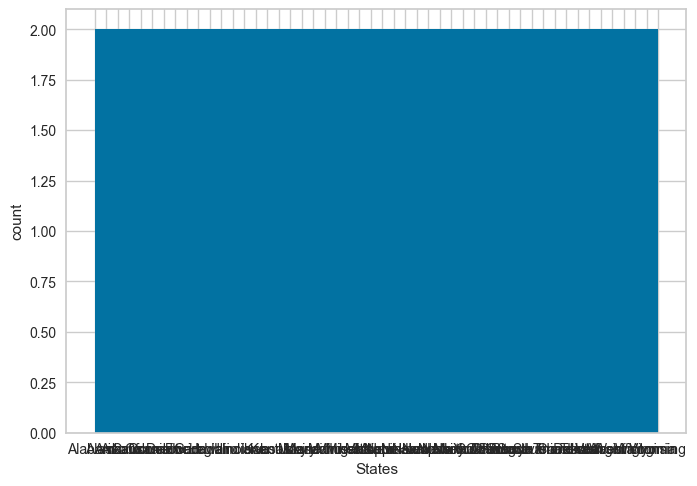

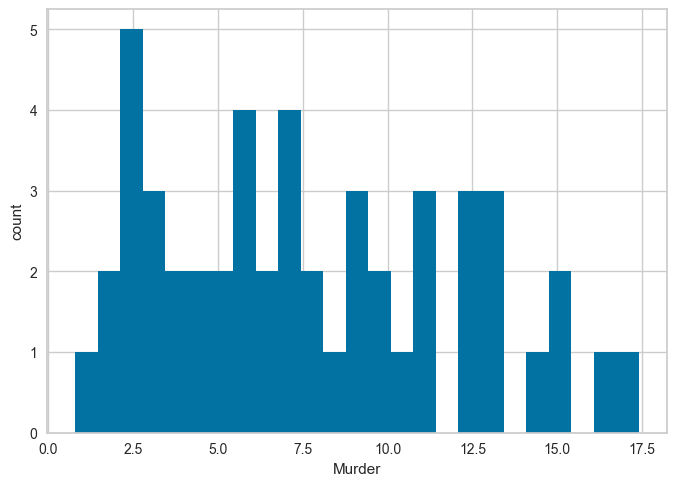

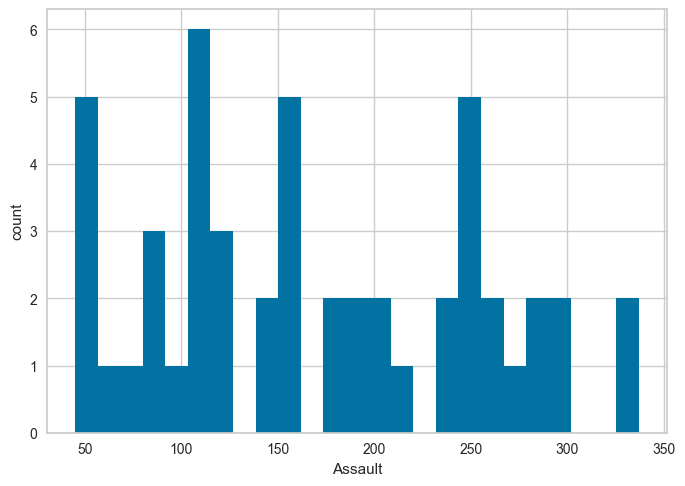

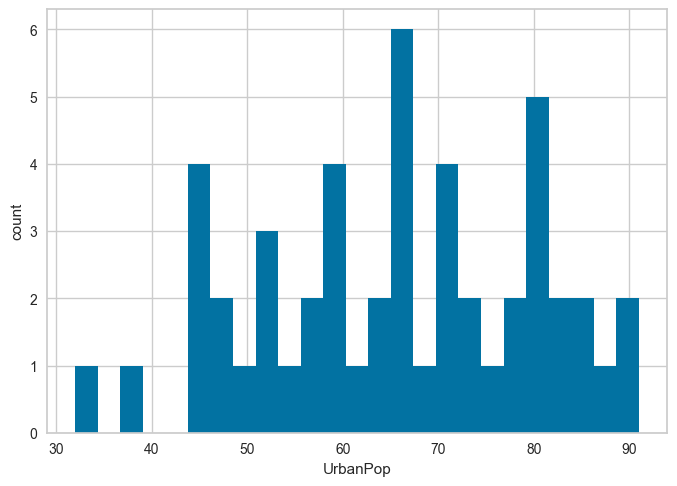

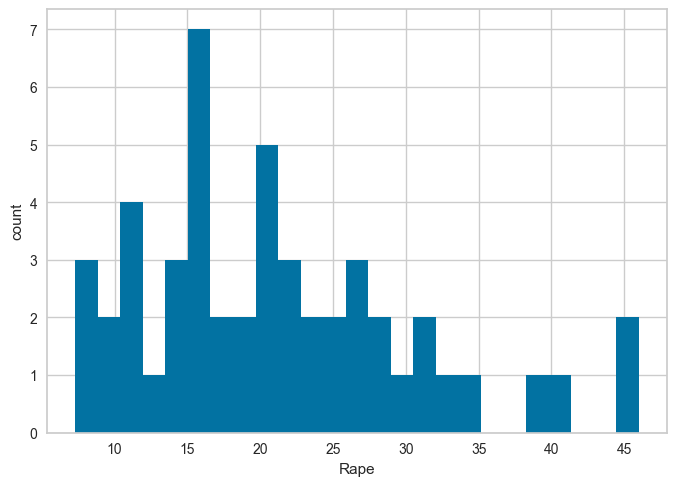

In [16]:
for feature in data.columns:
    data=data.copy()
    data[feature].hist(bins=25)
    plt.ylabel('count')
    plt.xlabel(feature)
    plt.show()
    

# 3.1 Outliers Detection


In [17]:
data.columns

Index(['States', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

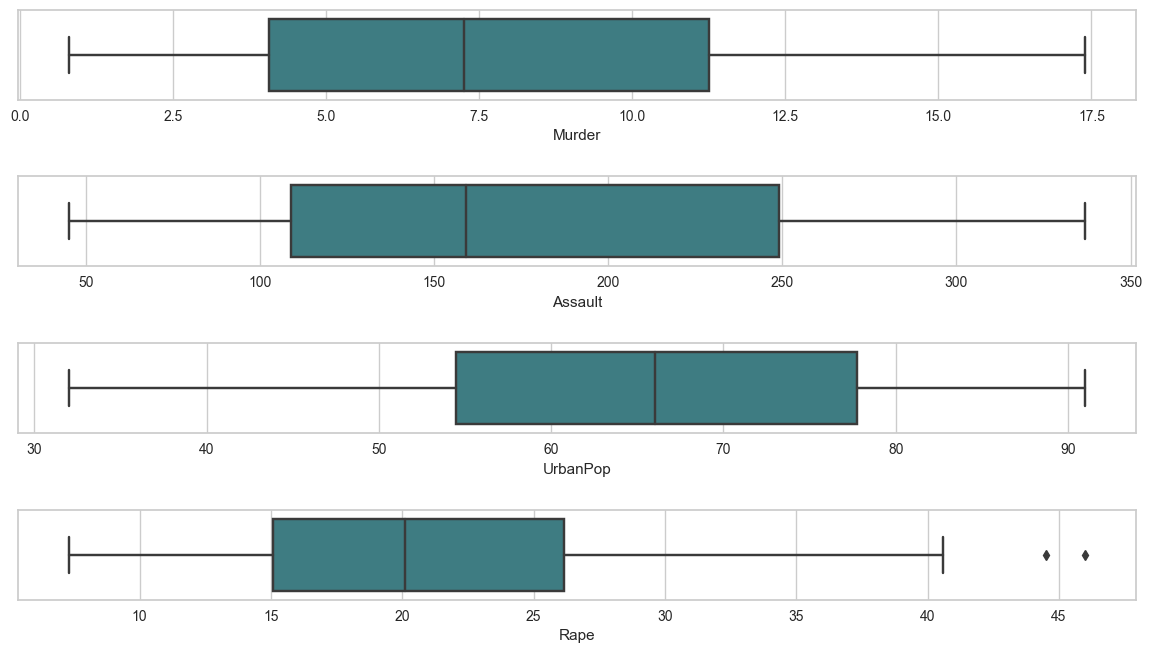

In [18]:
ot=data.copy()
fig,axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Assault',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='UrbanPop',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Rape',data=ot,palette='crest',ax=axes[3])
plt.tight_layout(pad=2)

<Axes: >

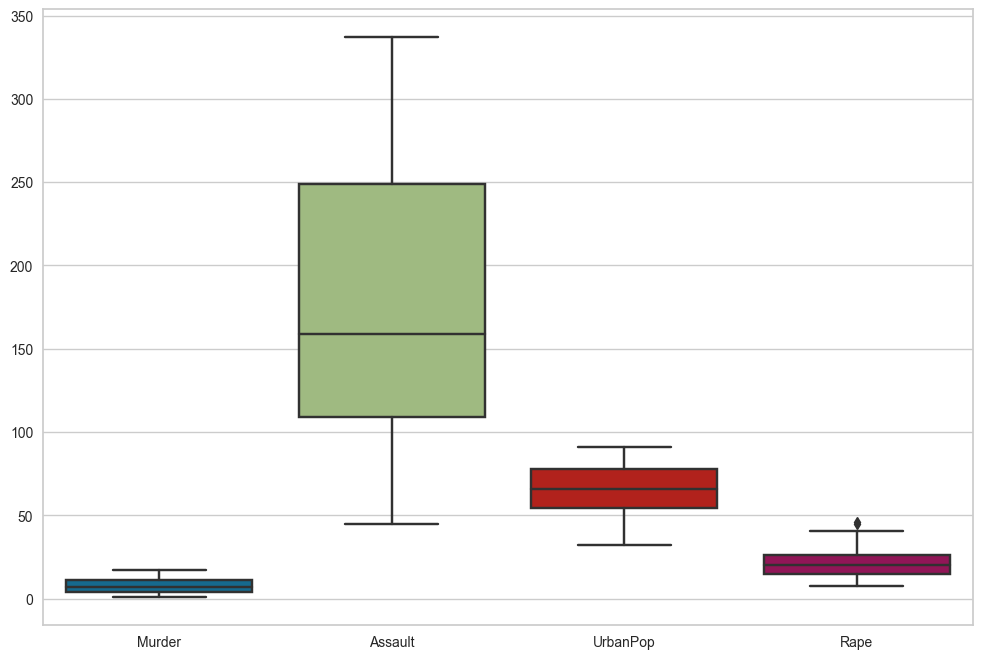

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data)

# Data visualization

<Axes: >

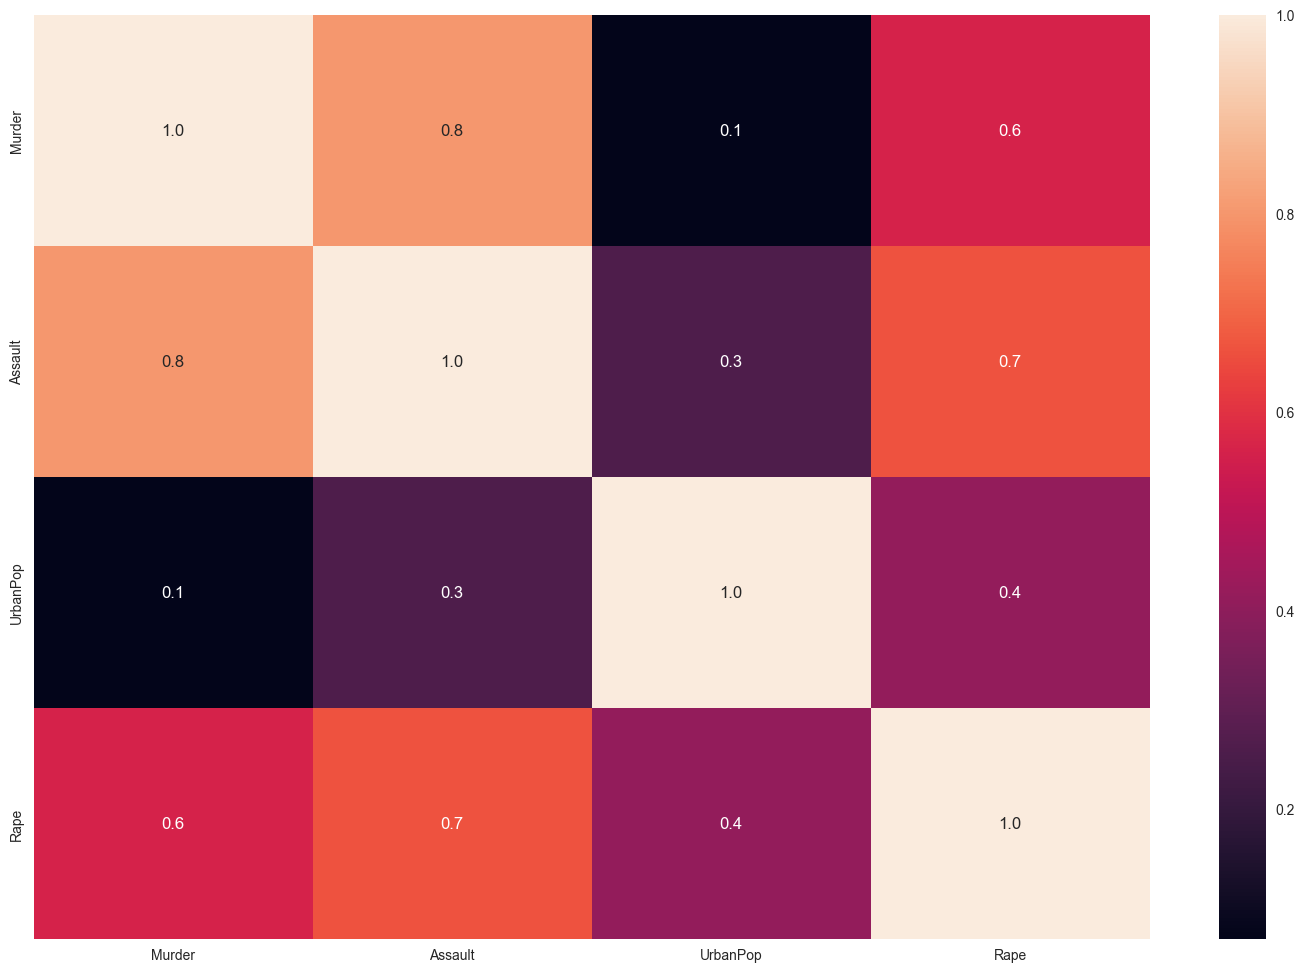

In [20]:
f,ax=plt.subplots(figsize=(18,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.1f',ax=ax)

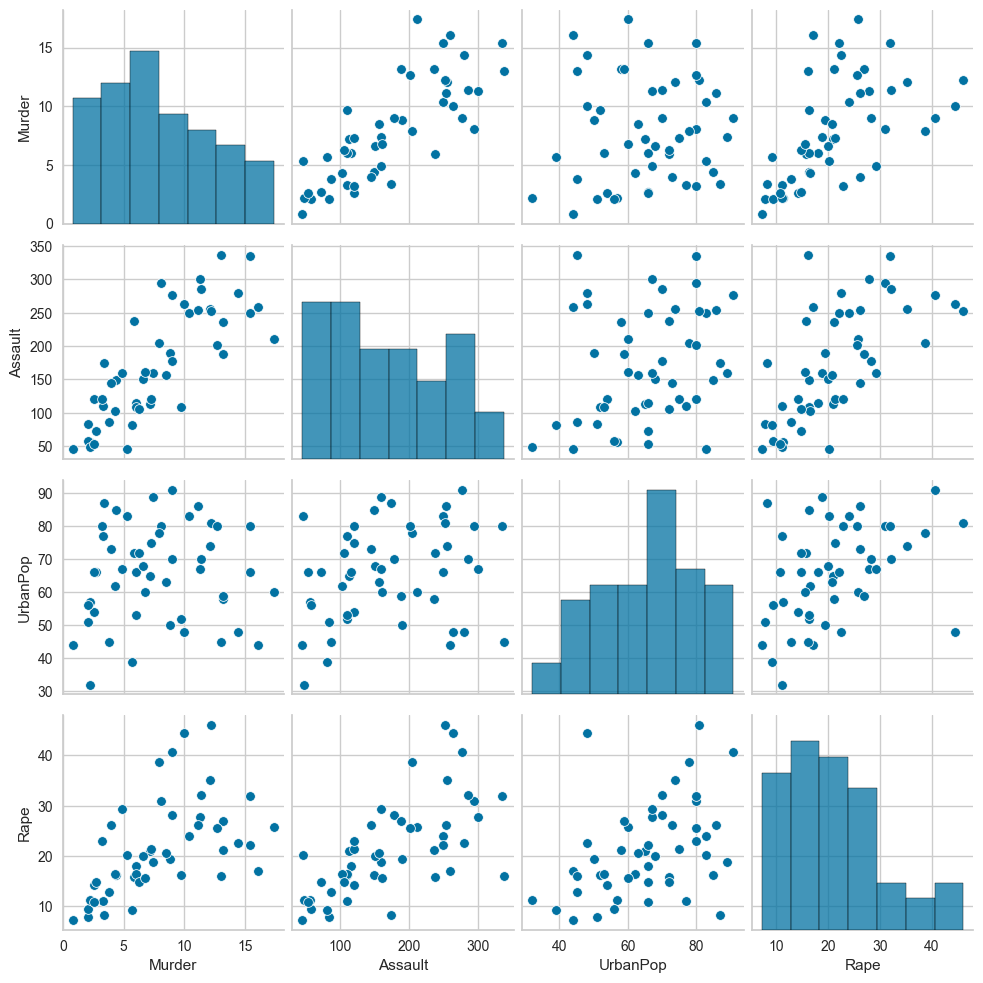

In [21]:
sns.pairplot(data)

In [22]:
data.corr()

Murder   Assault  UrbanPop      Rape
Murder    1.000000  0.801873  0.069573  0.563579
Assault   0.801873  1.000000  0.258872  0.665241
UrbanPop  0.069573  0.258872  1.000000  0.411341
Rape      0.563579  0.665241  0.411341  1.000000

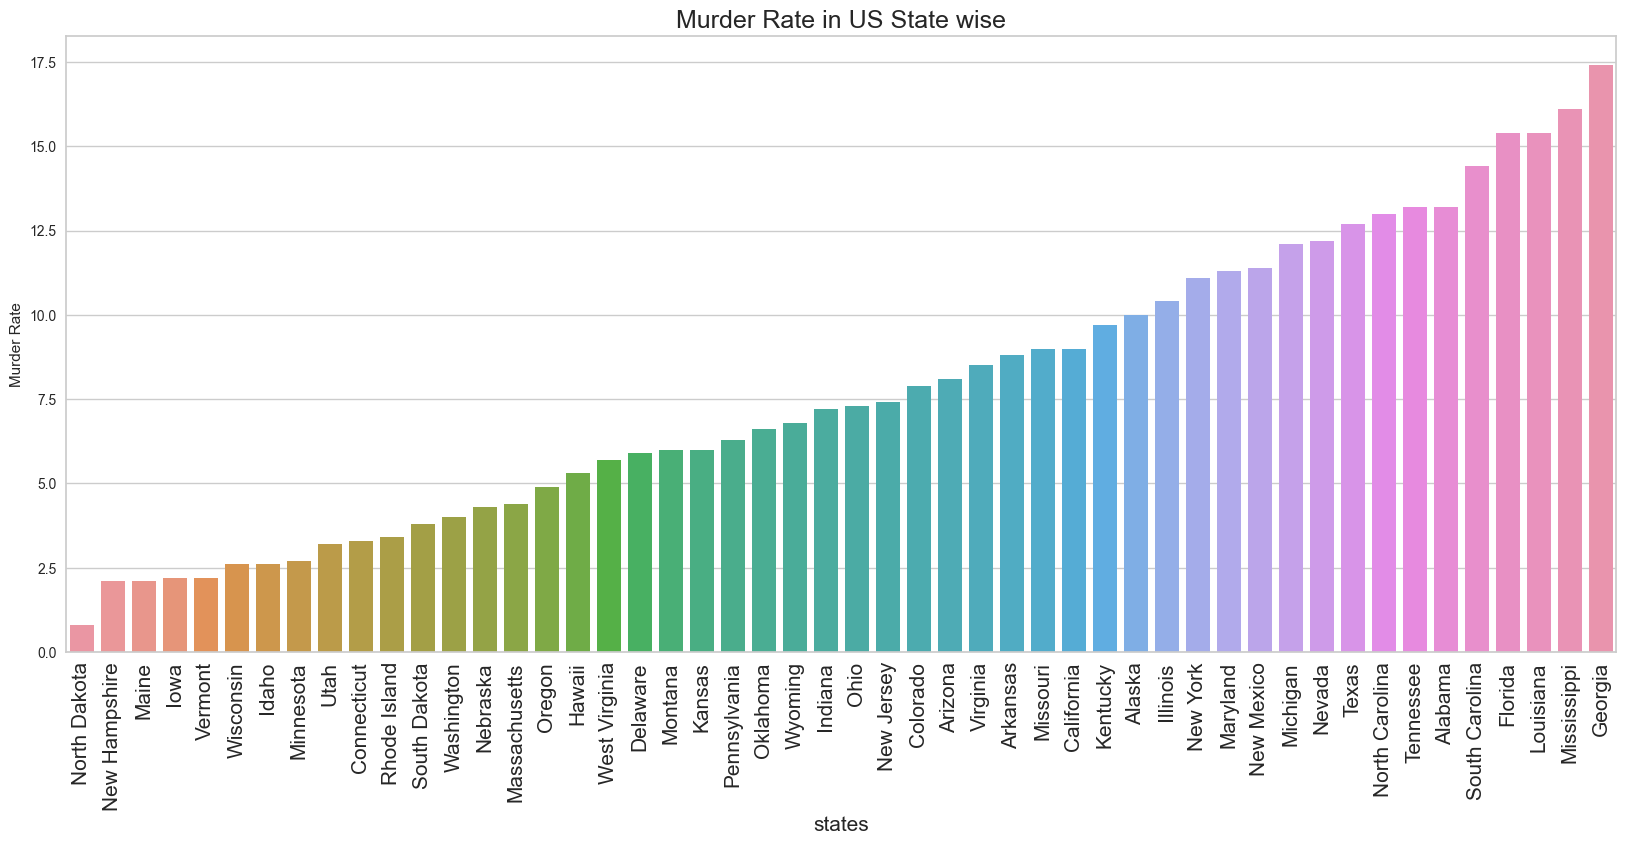

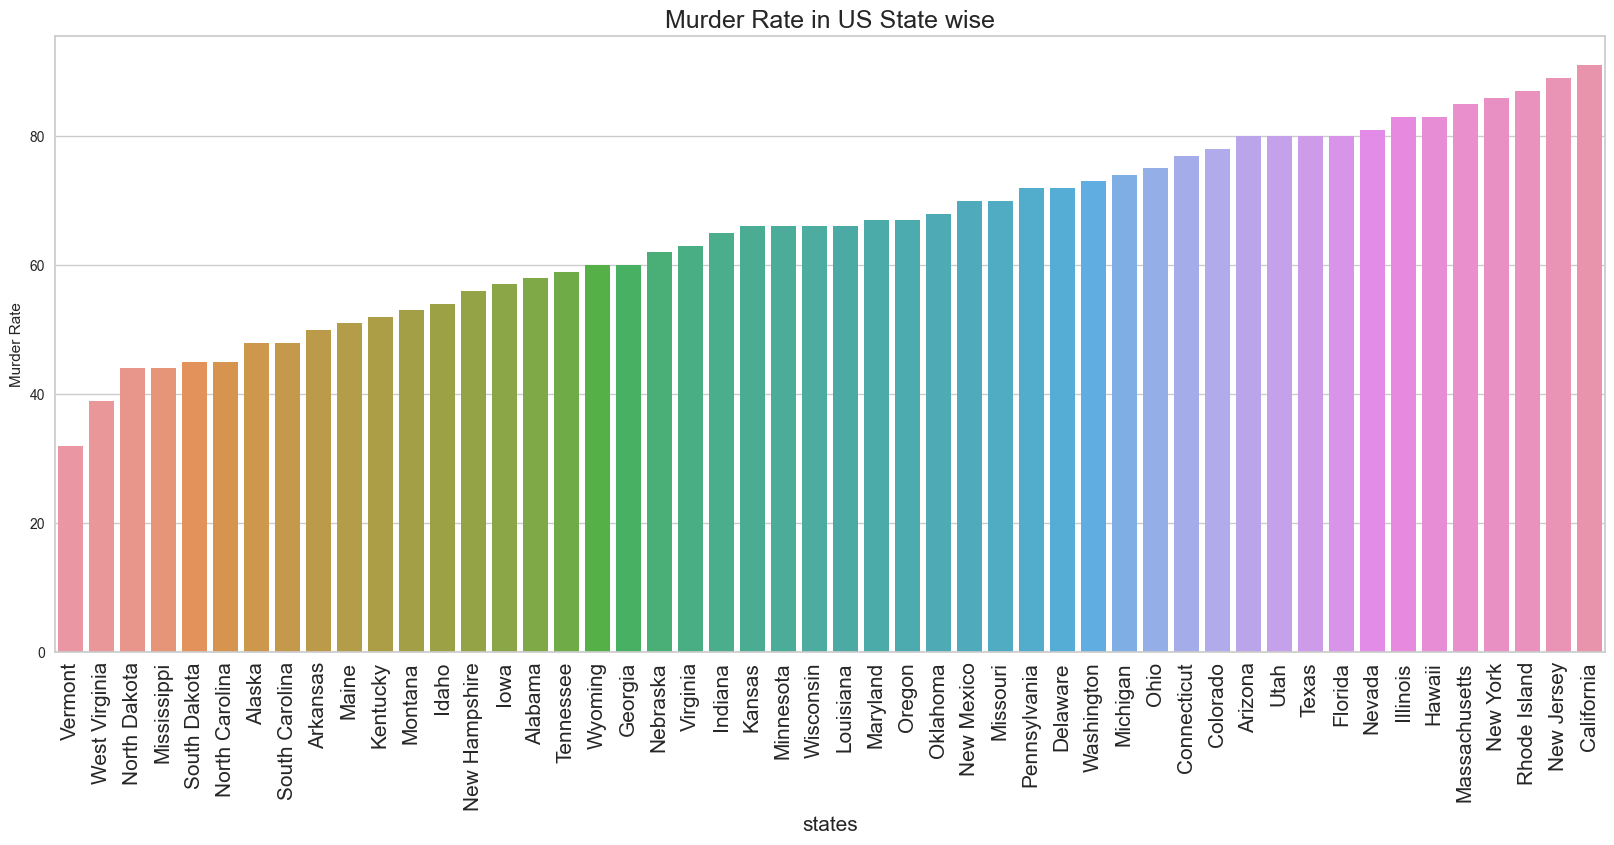

In [23]:
plt.figure(figsize=(20,8))
sns.barplot(x='States',y='Murder',data=data,order=data.sort_values('Murder').States)
plt.xlabel('states',size=15)
plt.ylabel('Murder Rate')
plt.xticks(rotation=90,fontsize=15)
plt.title("Murder Rate in US State wise", size=18)
plt.show()

#bar plot with urbanrate and state

plt.figure(figsize=(20,8))
sns.barplot(x='States',y='UrbanPop',data=data, order=data.sort_values('UrbanPop').States)
plt.xlabel('states',size=15)
plt.ylabel('Murder Rate')
plt.xticks(rotation=90,fontsize=15)
plt.title("Murder Rate in US State wise", size=18)
plt.show()

# Observation: There is no direct relation between Murder Rate and Urban Population but you can see a less number of Murder rate can be seen North Dakota as it Urban population is less compare to Florida and has the opposite effect

In [24]:
print('top 10 states with highest murder rate')
murder=data.sort_values('Murder',ascending=False)
murder.head(10)

top 10 states with highest murder rate


States  Murder  Assault  UrbanPop  Rape
9          Georgia    17.4      211        60  25.8
23     Mississippi    16.1      259        44  17.1
8          Florida    15.4      335        80  31.9
17       Louisiana    15.4      249        66  22.2
39  South Carolina    14.4      279        48  22.5
0          Alabama    13.2      236        58  21.2
41       Tennessee    13.2      188        59  26.9
32  North Carolina    13.0      337        45  16.1
42           Texas    12.7      201        80  25.5
27          Nevada    12.2      252        81  46.0

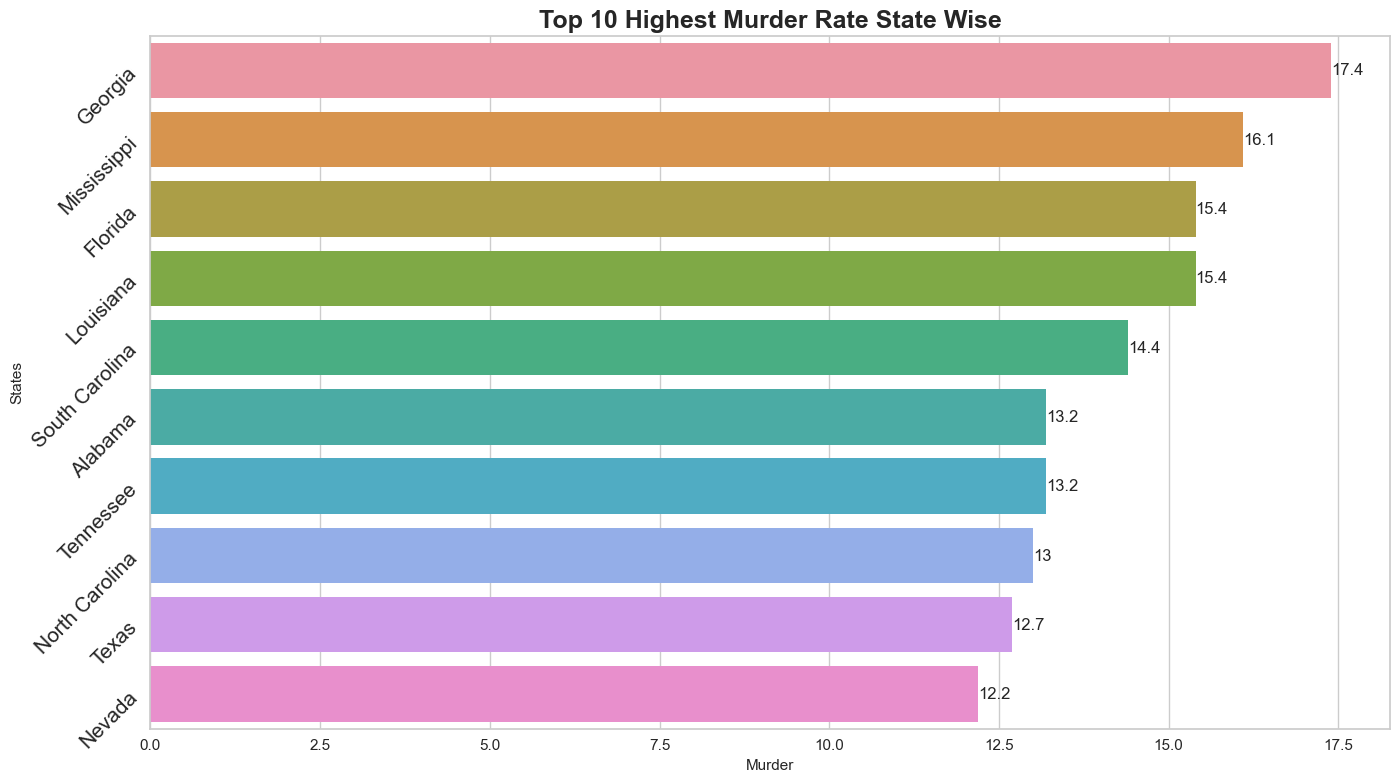

In [25]:
plt.figure(figsize=(16,9))
ax=sns.barplot(x=murder.Murder[:10],y=murder.States[:10])
plt.xticks(rotation=0,fontsize=11)
plt.yticks(rotation=45,fontsize=15)
plt.title('Top 10 Highest Murder Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

In [26]:
print('top 10 state with lowest murder rate')
Murder=data.sort_values('Murder').head(10)
Murder

top 10 state with lowest murder rate


States  Murder  Assault  UrbanPop  Rape
33   North Dakota     0.8       45        44   7.3
28  New Hampshire     2.1       57        56   9.5
18          Maine     2.1       83        51   7.8
14           Iowa     2.2       56        57  11.3
44        Vermont     2.2       48        32  11.2
48      Wisconsin     2.6       53        66  10.8
11          Idaho     2.6      120        54  14.2
22      Minnesota     2.7       72        66  14.9
43           Utah     3.2      120        80  22.9
6     Connecticut     3.3      110        77  11.1

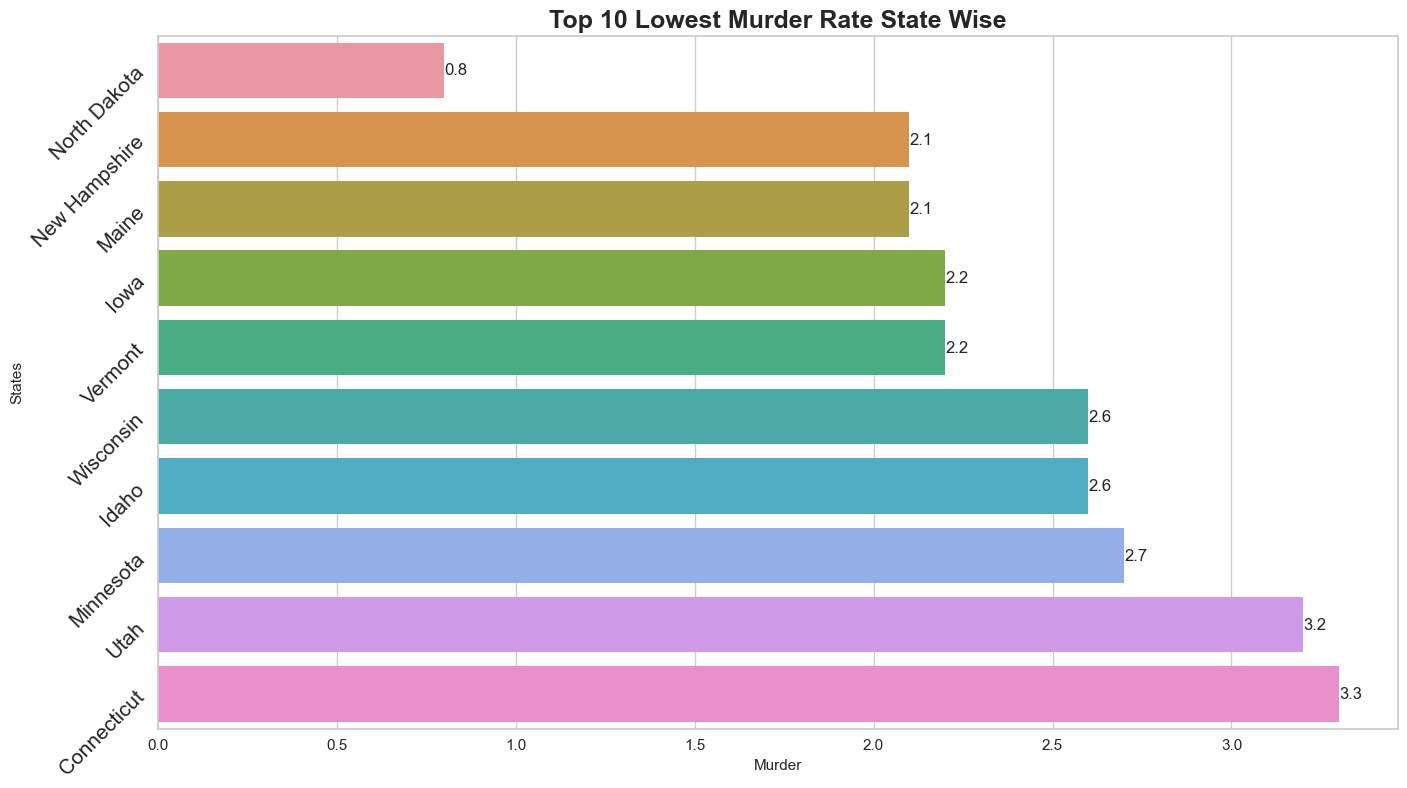

In [27]:

plt.figure(figsize=(16,9))
ax=sns.barplot(x=Murder.Murder[:10],y=Murder.States[:10])
plt.xticks(rotation=0,fontsize=11)
plt.yticks(rotation=45,fontsize=15)
plt.title('Top 10 Lowest Murder Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

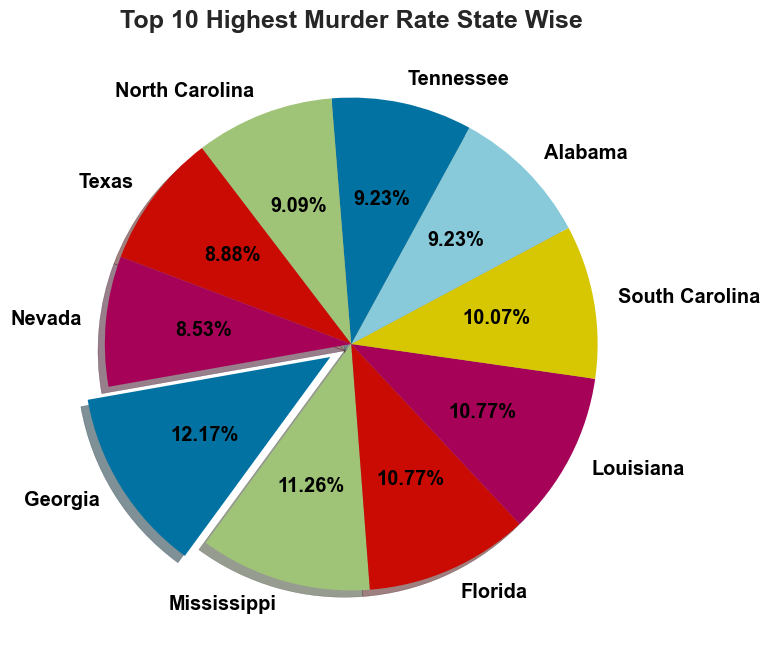

In [28]:
fig,ax=plt.subplots(figsize=(8,8))
ax.pie(murder.Murder[:10],labels=murder.States[:10],shadow=True,startangle=190,autopct= '%.2f%%',
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       textprops={'size':'large',
                  'fontweight':'bold',
                  'rotation':'horizontal',
                  'color':'black'})
plt.title("Top 10 Highest Murder Rate State Wise", fontsize = 18, fontweight = 'bold')
plt.show()

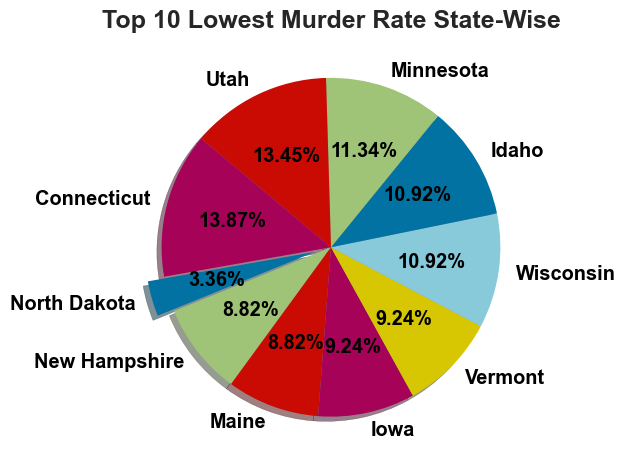

In [29]:
fig,ax=plt.subplots()
ax.pie(Murder.Murder[:10],labels=Murder.States[:10],explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
      shadow=True,startangle=190,textprops={'size':'large','fontweight':'bold','rotation':'horizontal',
                   'color':'black'}, autopct='%.2f%%')
plt.title("Top 10 Lowest Murder Rate State-Wise", fontsize = 18, fontweight = 'bold')
plt.show()

# 4.2 Assault Rate

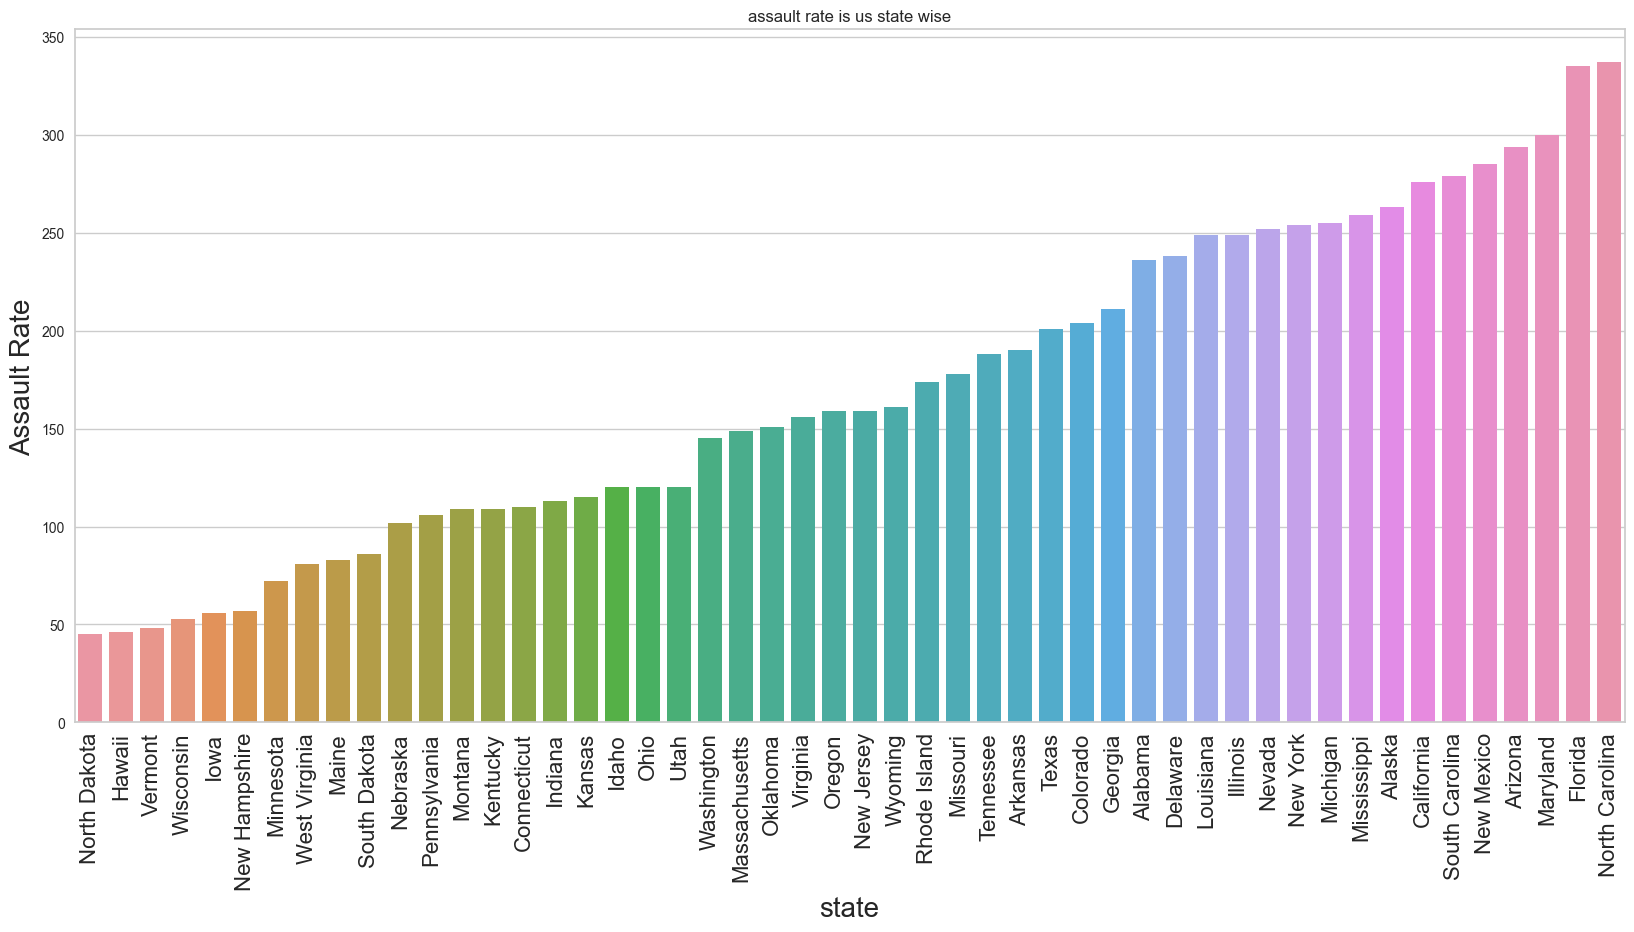

In [30]:
plt.figure(figsize=(20,9))
sns.barplot(x='States',y='Assault',data=data,order=data.sort_values('Assault').States)
plt.xlabel('state',fontsize=20)
plt.ylabel('Assault Rate',fontsize=20)
plt.xticks(rotation=90,fontsize=16)
plt.title("assault rate is us state wise")
plt.show()

In [31]:
print('top 10 state with hight assult')
assault=data.sort_values('Assault',ascending=False,ignore_index=True).head(10)
assault

top 10 state with hight assult


States  Murder  Assault  UrbanPop  Rape
0  North Carolina    13.0      337        45  16.1
1         Florida    15.4      335        80  31.9
2        Maryland    11.3      300        67  27.8
3         Arizona     8.1      294        80  31.0
4      New Mexico    11.4      285        70  32.1
5  South Carolina    14.4      279        48  22.5
6      California     9.0      276        91  40.6
7          Alaska    10.0      263        48  44.5
8     Mississippi    16.1      259        44  17.1
9        Michigan    12.1      255        74  35.1

In [32]:
print('top 10 values with lowest assault rate')
Assault=data.sort_values('Assault',ascending=True,ignore_index=True).head(10)
Assault

top 10 values with lowest assault rate


States  Murder  Assault  UrbanPop  Rape
0   North Dakota     0.8       45        44   7.3
1         Hawaii     5.3       46        83  20.2
2        Vermont     2.2       48        32  11.2
3      Wisconsin     2.6       53        66  10.8
4           Iowa     2.2       56        57  11.3
5  New Hampshire     2.1       57        56   9.5
6      Minnesota     2.7       72        66  14.9
7  West Virginia     5.7       81        39   9.3
8          Maine     2.1       83        51   7.8
9   South Dakota     3.8       86        45  12.8

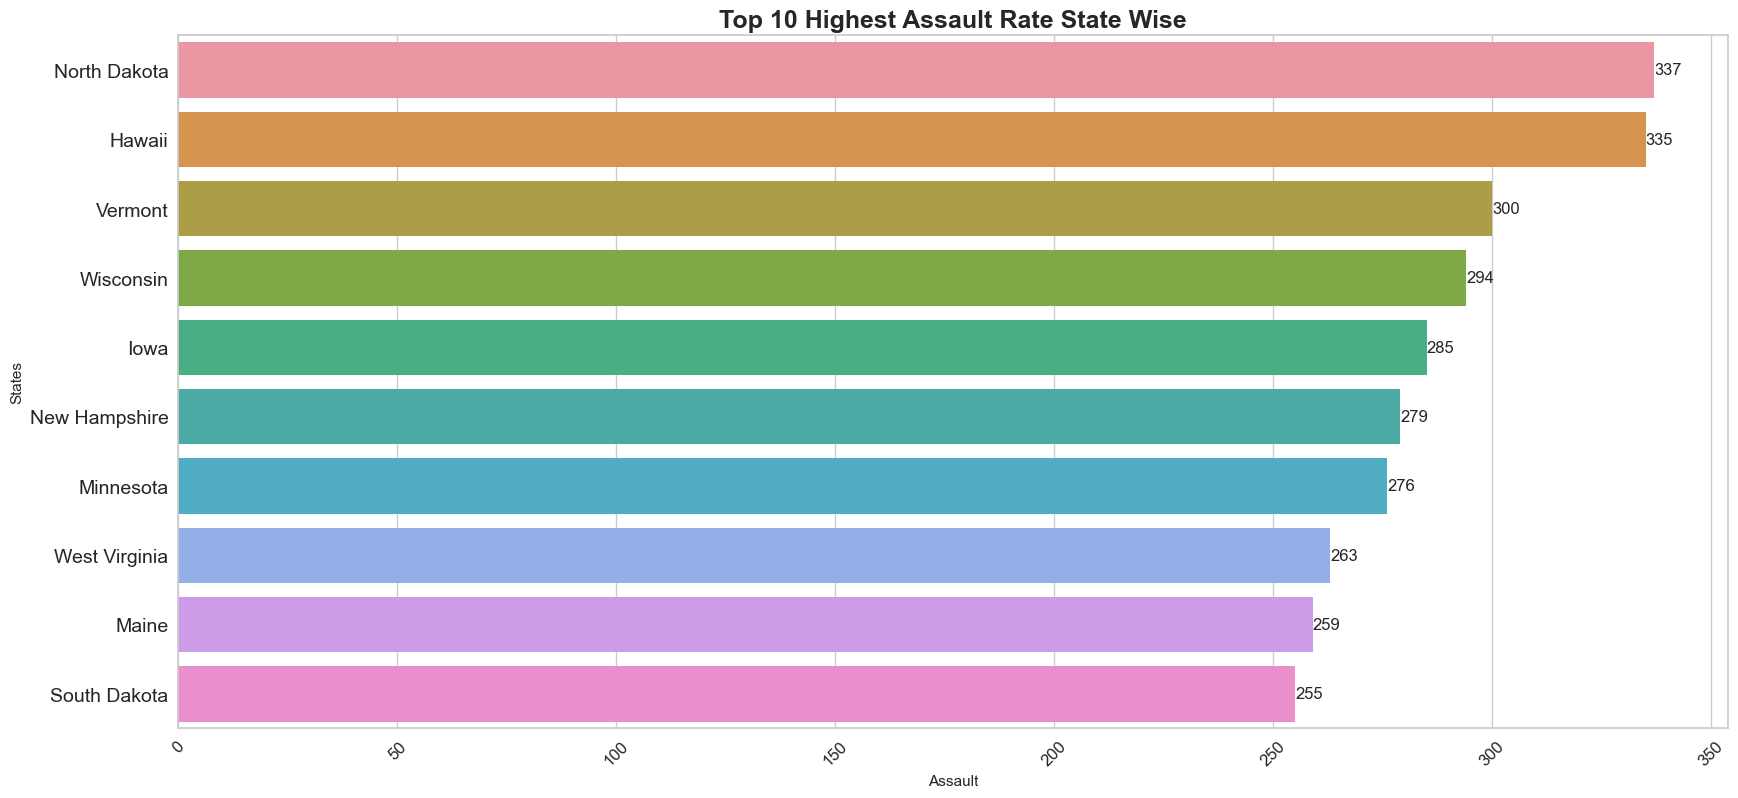

In [33]:
plt.figure(figsize=(20,9))
ax=sns.barplot(x=assault.Assault[:10],y=Assault.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Assault Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

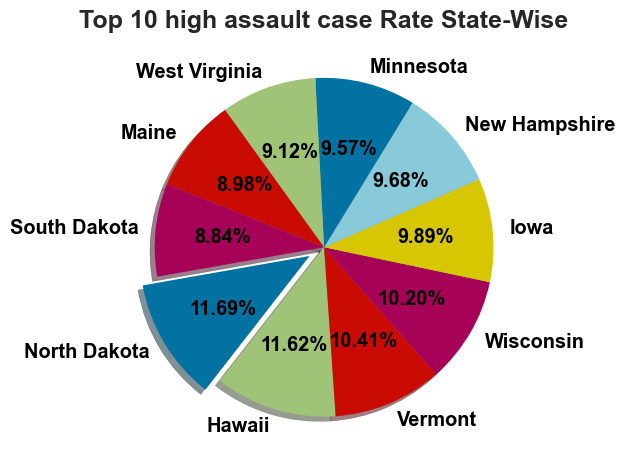

In [34]:
fig,ax=plt.subplots()
ax.pie(assault.Assault[:10],
       labels=Assault.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.title("Top 10 high assault case Rate State-Wise", fontsize = 18, fontweight = 'bold')
plt.show()

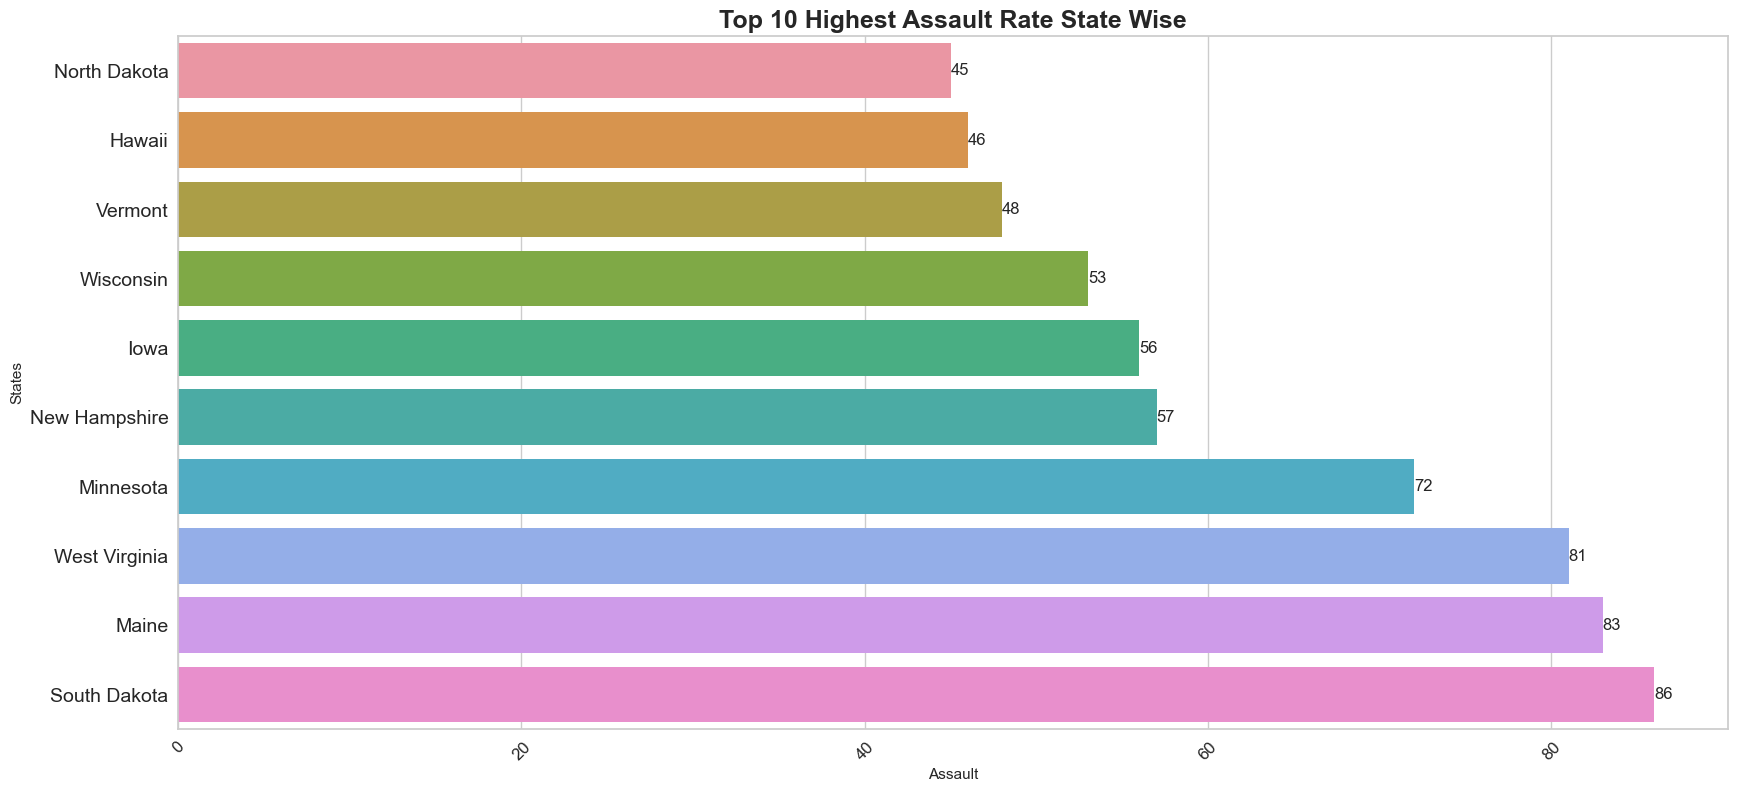

In [35]:
plt.figure(figsize=(20,9))
ax=sns.barplot(x=Assault.Assault[:10],y=Assault.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Assault Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

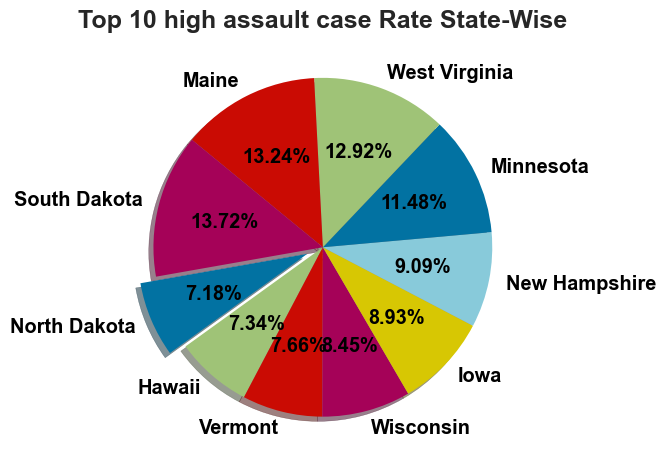

In [36]:
fig,ax=plt.subplots()
ax.pie(Assault.Assault[:10],
       labels=Assault.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.title("Top 10 high assault case Rate State-Wise", fontsize = 18, fontweight = 'bold')
plt.show()

# 4.3 Rape Rate

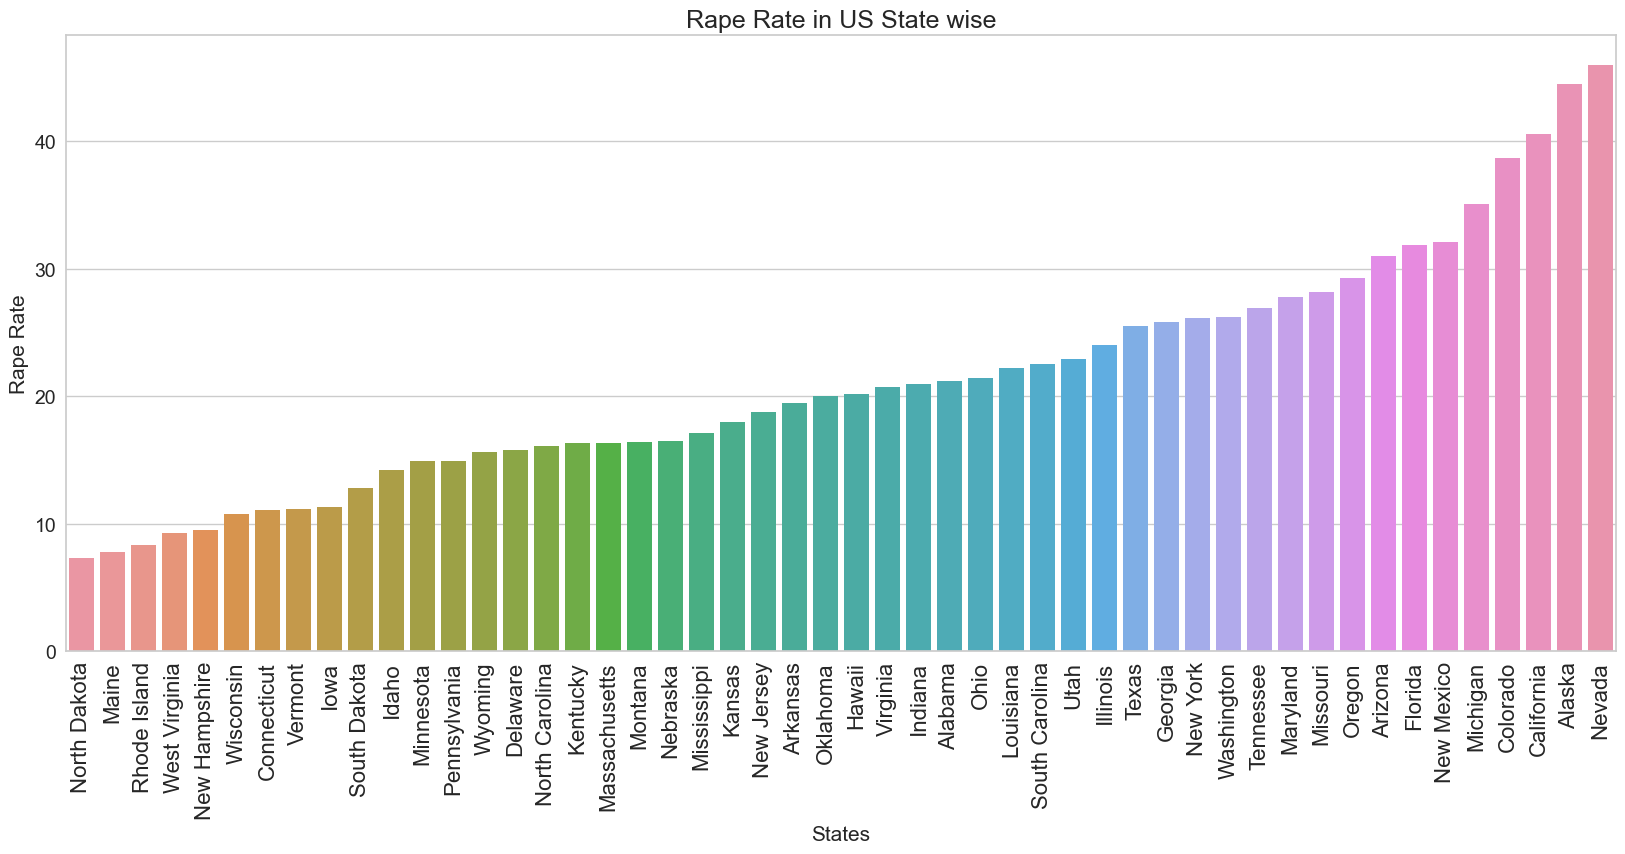

In [37]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="Rape", 
            data=data, 
            order=data.sort_values('Rape').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Rape Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Rape Rate in US State wise", size=18)
plt.show()

In [38]:
print('Top 10 States with Highest Rape Rate')
Rape=data.sort_values('Rape',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Rape Rate


In [39]:
print('Top 10 States with Lowest Rape Rate')
rape=data.sort_values('Rape',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Rape Rate


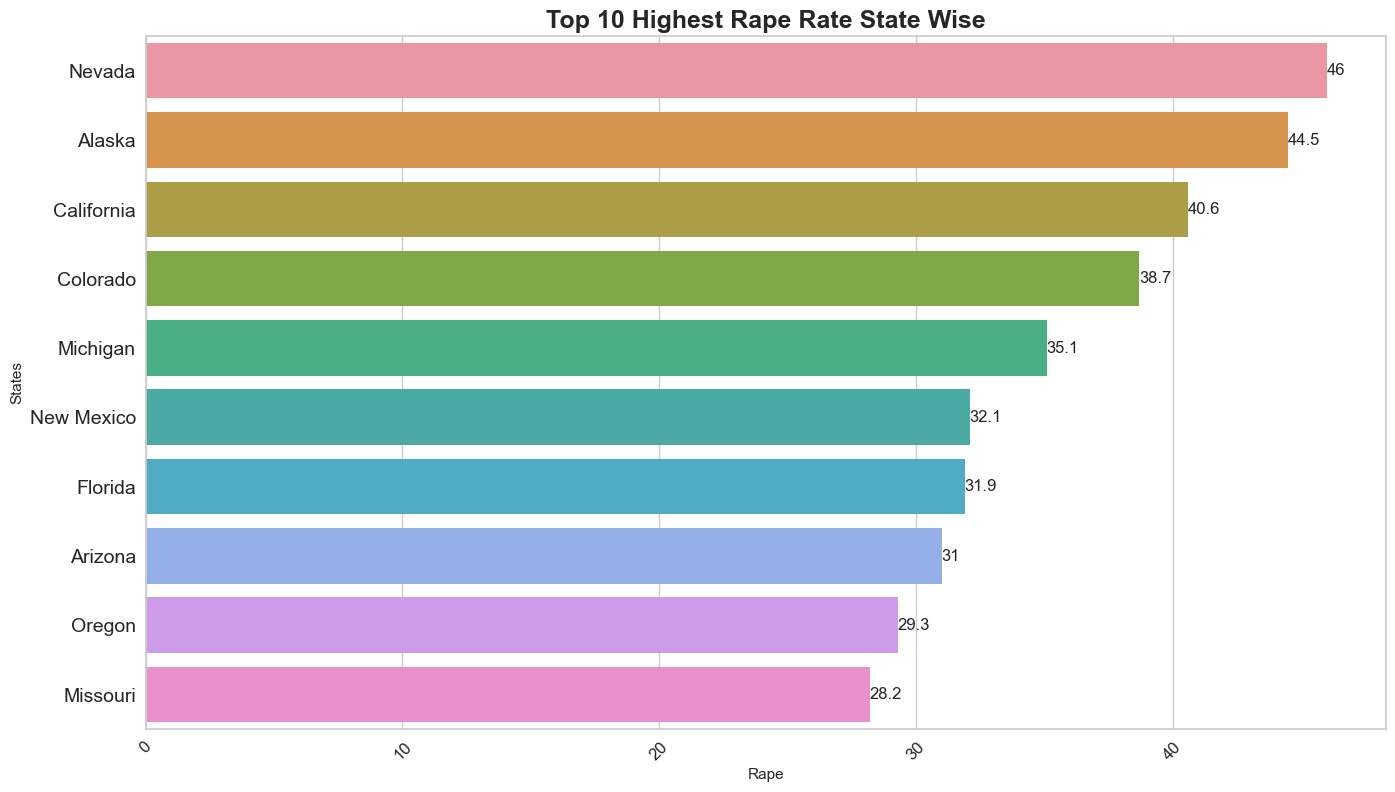

In [40]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = Rape.Rape[:10], y = Rape.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Rape Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

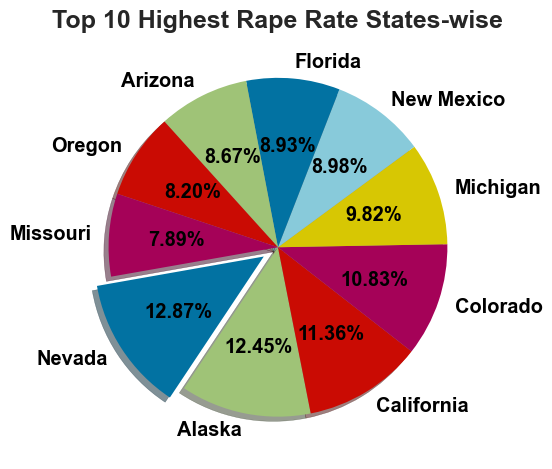

In [41]:
plt.pie(Rape.Rape[:10],
       labels=Rape.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':0,
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Highest Rape Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

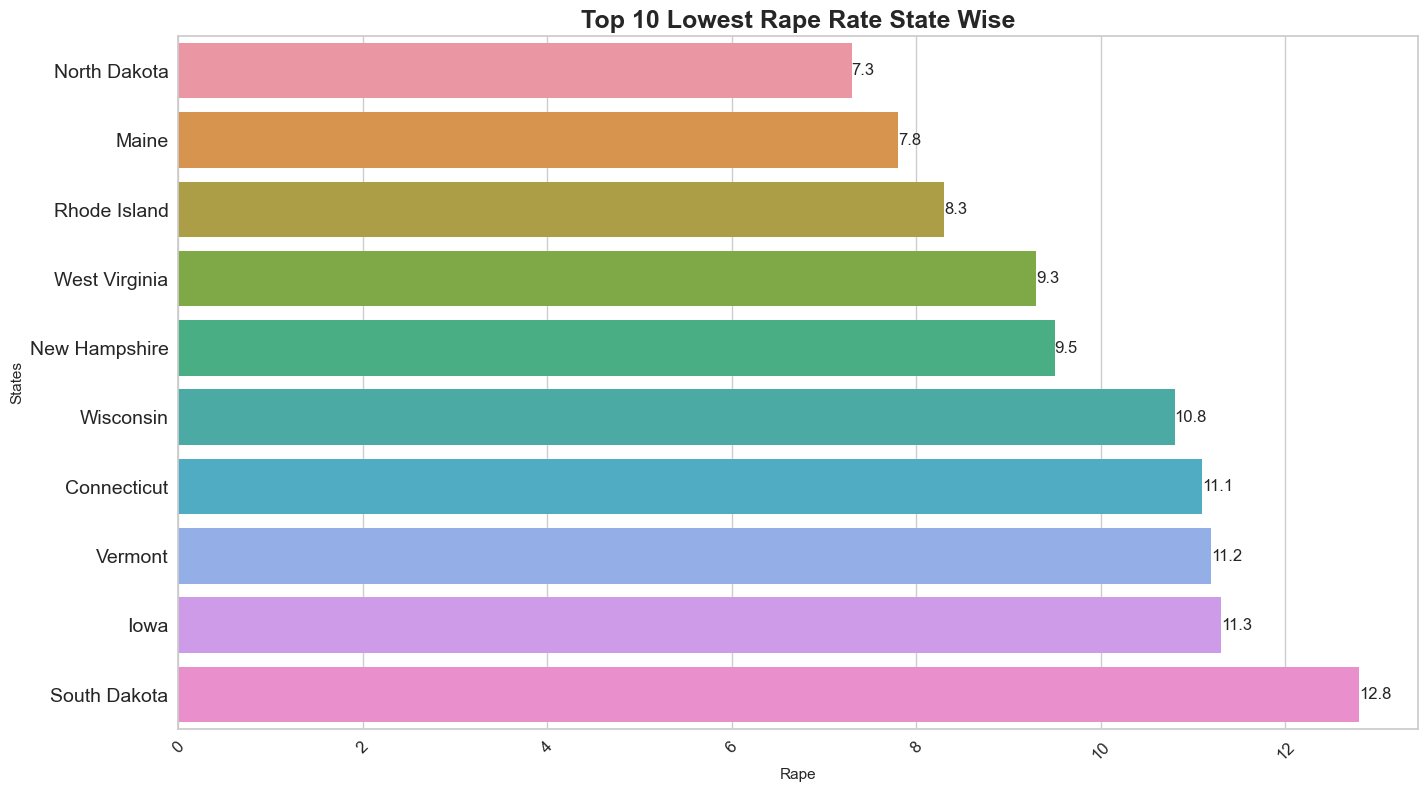

In [42]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = rape.Rape[:10], y = rape.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Rape Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

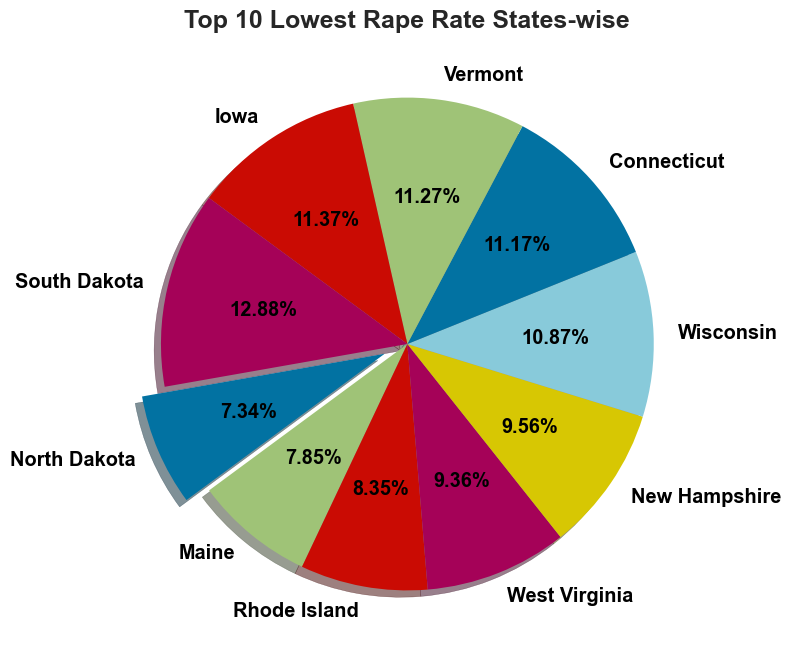

In [43]:
plt.figure(figsize = (8,8))
plt.pie(rape.Rape[:10],
       labels=rape.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':0,
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Rape Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

# 4.4 Urban Population Rate¶

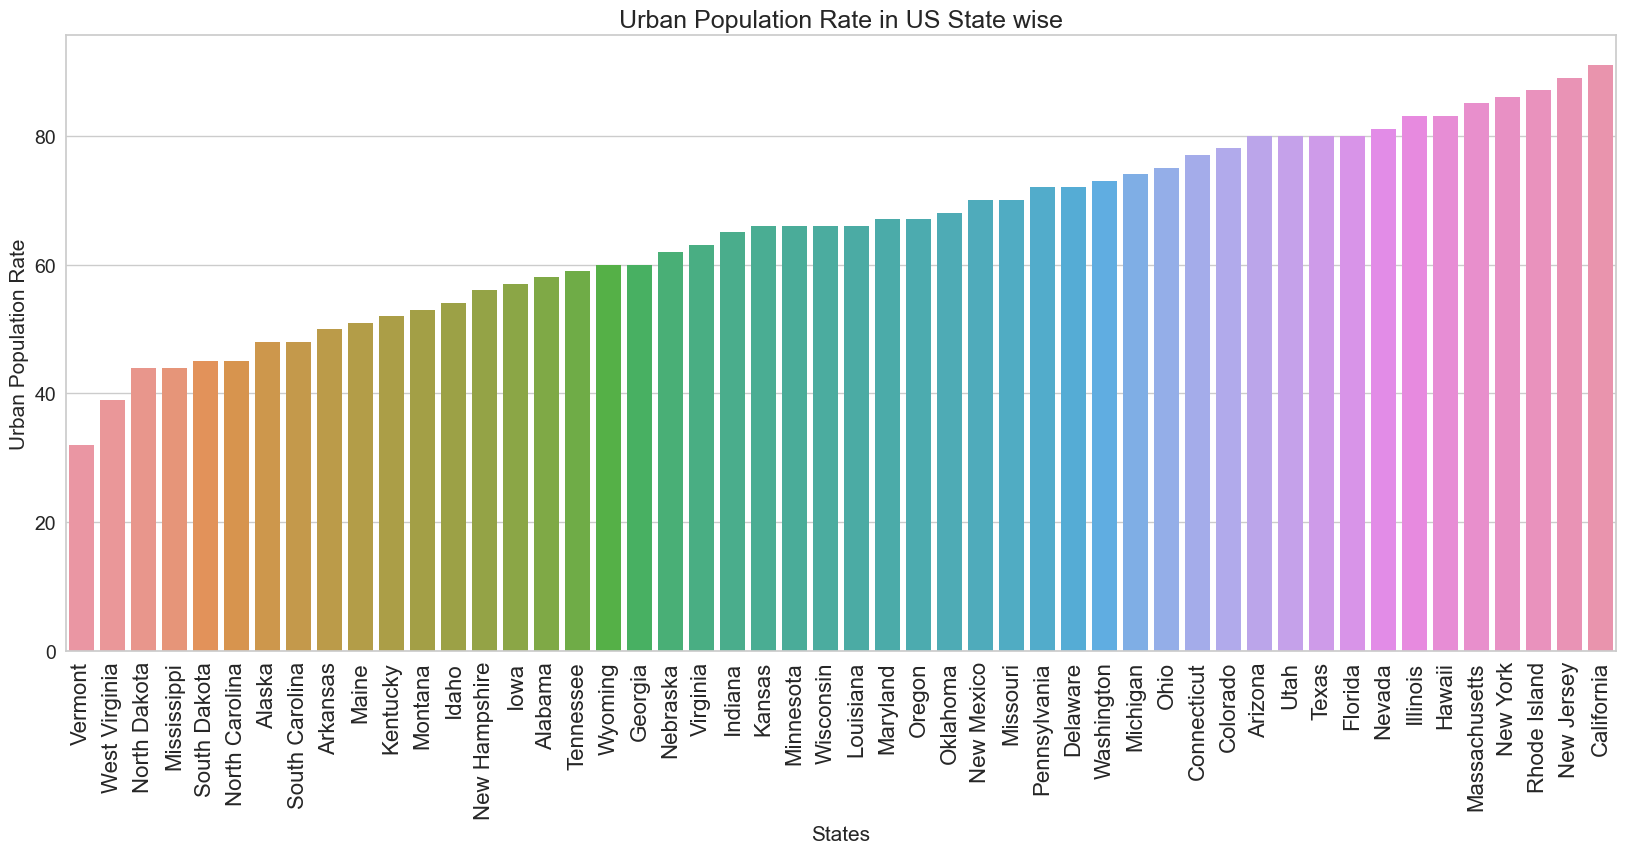

In [44]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="UrbanPop", 
            data=data, 
            order=data.sort_values('UrbanPop').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()

In [45]:
print('Top 10 States with Highest Urban Population Rate')
urbanpop=data.sort_values('UrbanPop',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Urban Population Rate


In [46]:
print('Top 10 States with Lowest Urban Population Rate')
UrbanPop=data.sort_values('UrbanPop',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Urban Population Rate


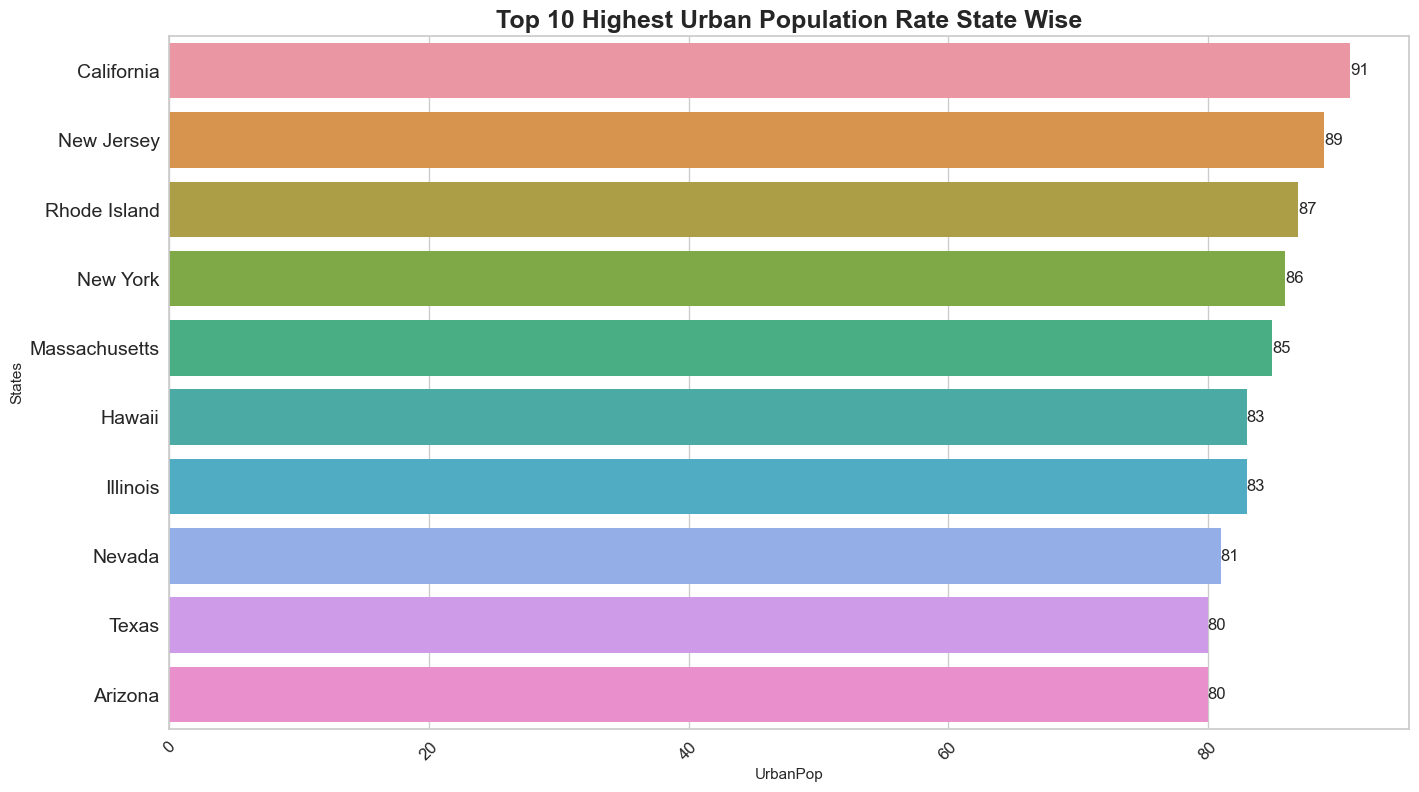

In [47]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = urbanpop.UrbanPop[:10], y = urbanpop.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Urban Population Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

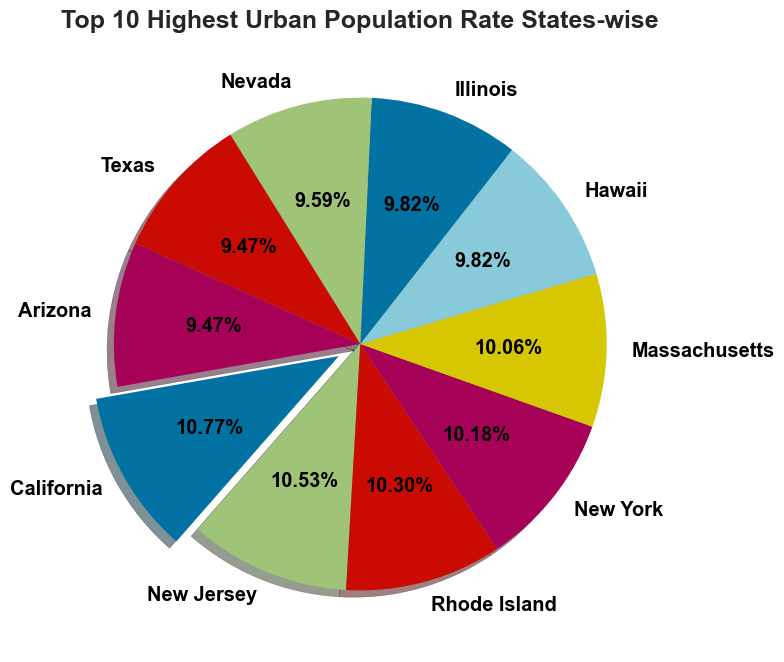

In [48]:
plt.figure(figsize = (8,8))
plt.pie(urbanpop.UrbanPop[:10],
       labels=urbanpop.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':0,
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Highest Urban Population Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

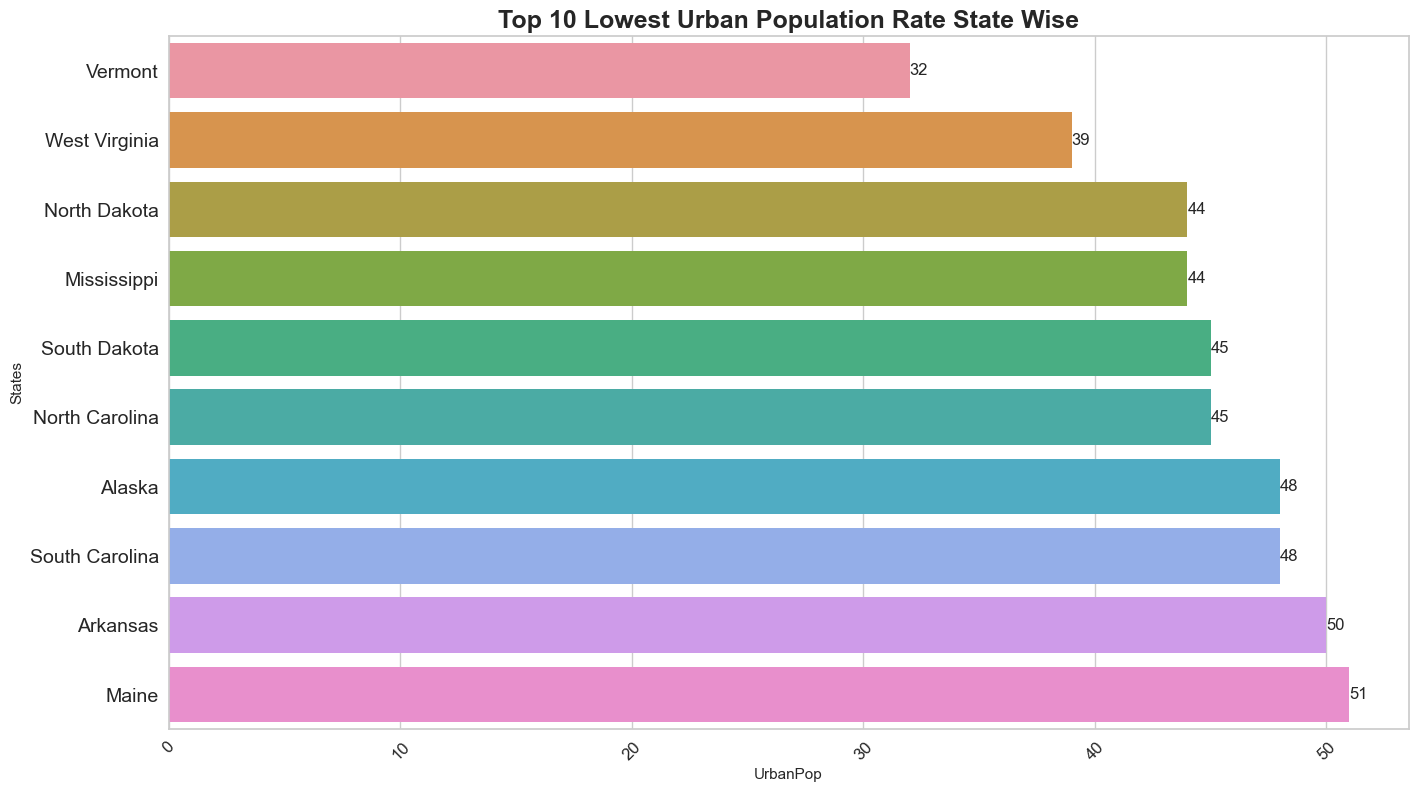

In [49]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = UrbanPop.UrbanPop[:10], y = UrbanPop.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Urban Population Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

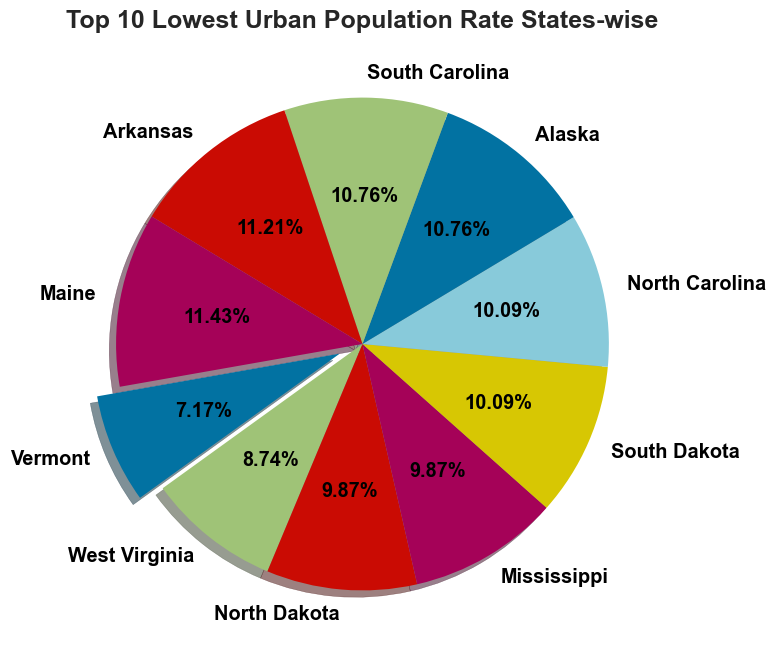

In [50]:
plt.figure(figsize = (8,8))
plt.pie(UrbanPop.UrbanPop[:10],
       labels=UrbanPop.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':0,
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Urban Population Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

# 5. Data Preprocessing

#  Standardizing the Data

In [51]:
df=data.set_index('States')
df.head()

Murder  Assault  UrbanPop  Rape
States                                     
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

In [52]:
standard_scaler=StandardScaler()
std_df=standard_scaler.fit_transform(df)
std_df.shape


(50, 4)

# Normalise the Data

In [53]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()


minmax_df=minmax.fit_transform(df)
minmax_df.shape

(50, 4)

# K-Means Clustering

# elbow method for determining Cluster Amount

In [54]:
cluster_range=range(1,15)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels=clusters.labels_
    centroids=clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df=pd.DataFrame({'num_cluster':cluster_range,'cluster_errors':cluster_errors,})
clusters_df

num_cluster  cluster_errors
0             1      200.000000
1             2      104.961633
2             3       80.065755
3             4       57.554259
4             5       50.333274
5             6       45.899261
6             7       40.992892
7             8       37.083835
8             9       31.090714
9            10       28.633988
10           11       25.165069
11           12       22.771969
12           13       21.364961
13           14       18.451967

In [55]:
labels.shape

(50,)

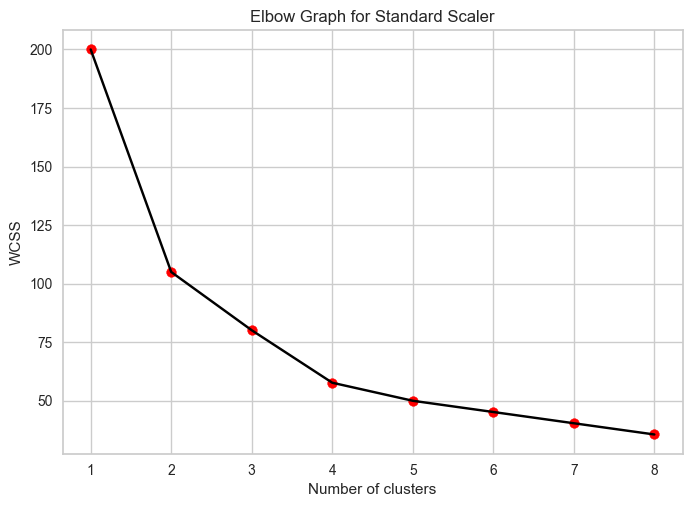

In [56]:
# within-cluster sum-of-squares criterion 
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

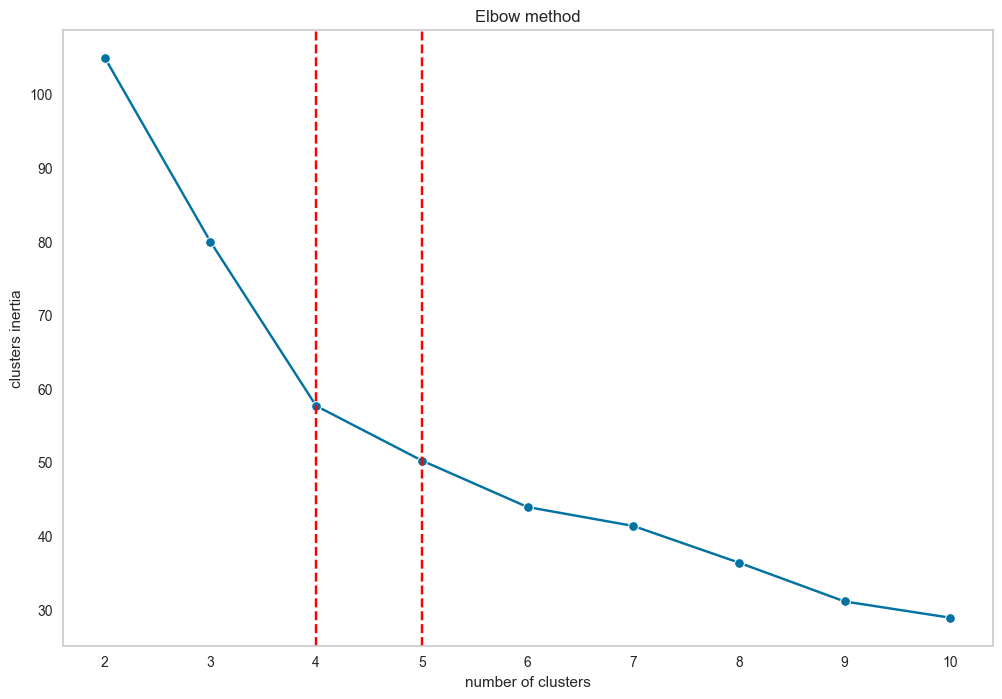

In [57]:
from sklearn.metrics import silhouette_score
n_clusters=range(2,11)
clusters_inertia=[]
s_Scores=[]

for n in n_clusters:
    KM_est=KMeans(n,init='k-means++')
    KM_est.fit(std_df)
    clusters_inertia.append(KM_est.inertia_) #data from elbow method
    silhouette_avg=silhouette_score(std_df,KM_est.labels_)
    s_Scores.append(silhouette_avg)
    
fig,ax=plt.subplots(figsize=(12,8))
ax=sns.lineplot(x=n_clusters,y=clusters_inertia,marker='o',ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(4, ls="--", c="red")
ax.axvline(5, ls="--", c="red")
plt.grid()
plt.show()

elbow plot for standard scaler


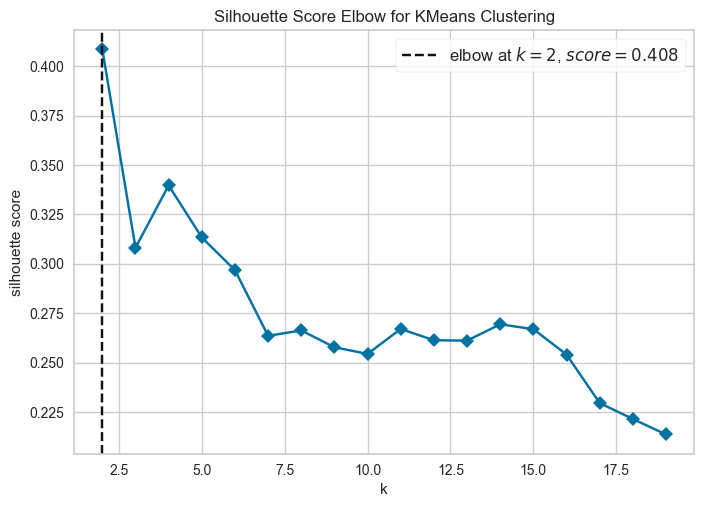

In [58]:
model=KMeans(random_state=10,max_iter=500,init='k-means++')

visualizer=KElbowVisualizer(model,k=(2,20),metric='silhouette',timings=False)
print('elbow plot for standard scaler')
visualizer.fit(std_df)
visualizer.poof()
plt.show()

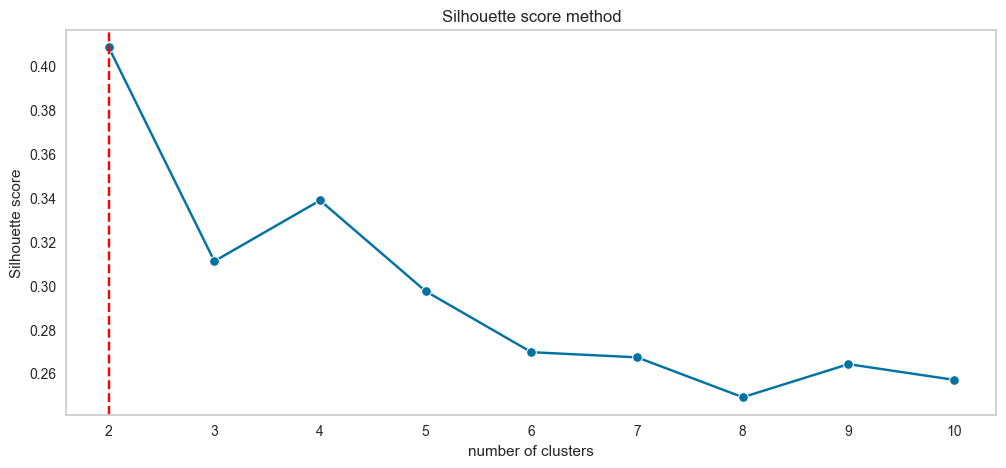

In [59]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=s_Scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

In [60]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list=range(2,10)
for n_clusters in clust_list:
    cluster1=KMeans(n_clusters,random_state=0)
    cluster_labels=cluster1.fit_predict(std_df)
    sil_score1=sil(std_df,cluster_labels)
    print('for no of cluster =', n_clusters,' the average silhouette score is :', sil_score1)

for no of cluster = 2  the average silhouette score is : 0.4084890326217641
for no of cluster = 3  the average silhouette score is : 0.3095091512791688
for no of cluster = 4  the average silhouette score is : 0.33968891433344395
for no of cluster = 5  the average silhouette score is : 0.30612803169146263
for no of cluster = 6  the average silhouette score is : 0.29910456843899946
for no of cluster = 7  the average silhouette score is : 0.23035904501364113
for no of cluster = 8  the average silhouette score is : 0.2732934287338534
for no of cluster = 9  the average silhouette score is : 0.2518939934580804


for n_clusters = 2 the average silhouette_score is: 0.4084890326217641
for n_clusters = 3 the average silhouette_score is: 0.3095091512791688
for n_clusters = 4 the average silhouette_score is: 0.33968891433344395
for n_clusters = 5 the average silhouette_score is: 0.30612803169146263
for n_clusters = 6 the average silhouette_score is: 0.29910456843899946
for n_clusters = 7 the average silhouette_score is: 0.23035904501364113
for n_clusters = 8 the average silhouette_score is: 0.2732934287338534
for n_clusters = 9 the average silhouette_score is: 0.2518939934580804


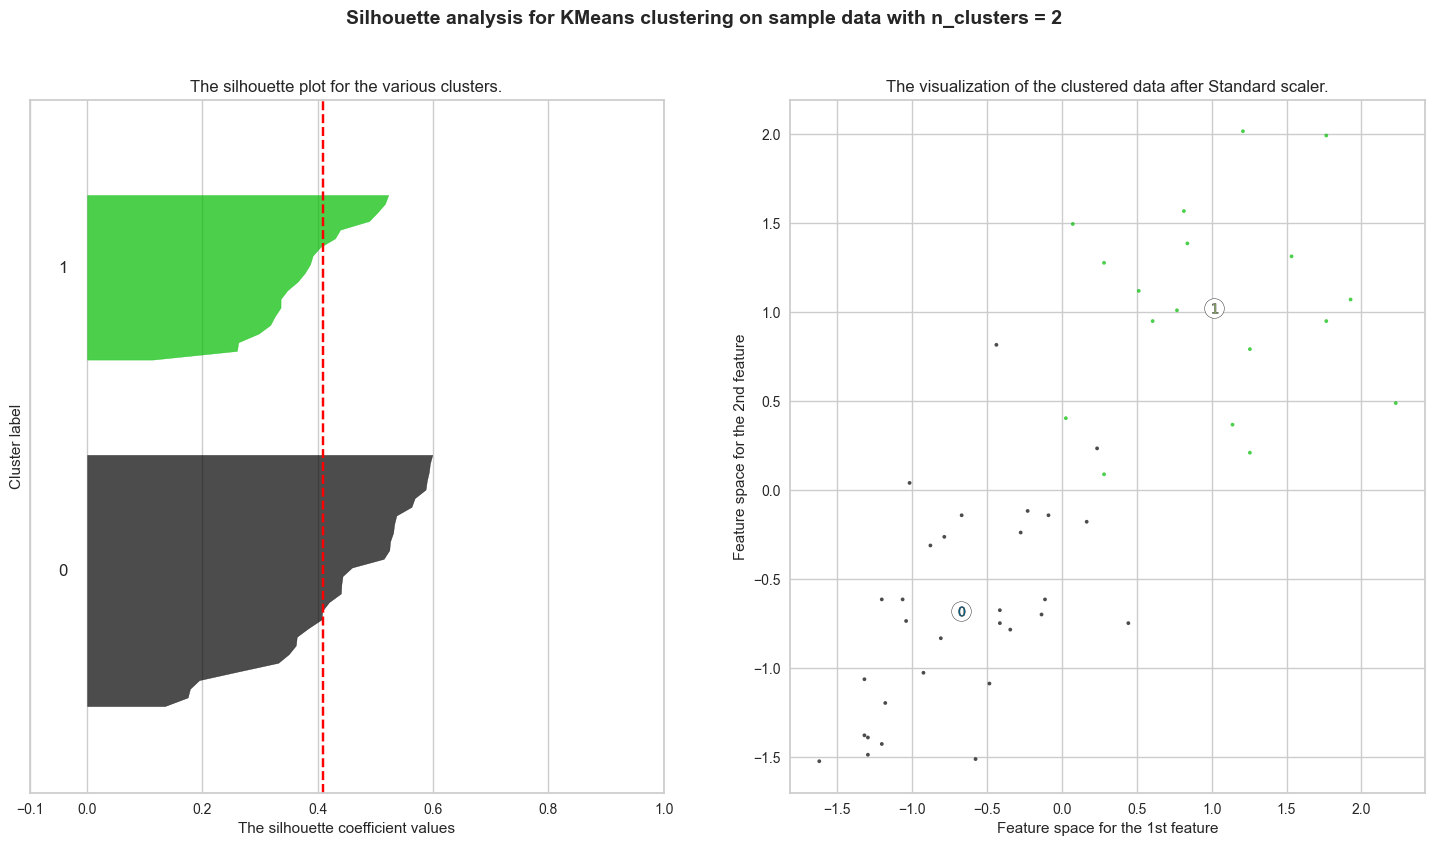

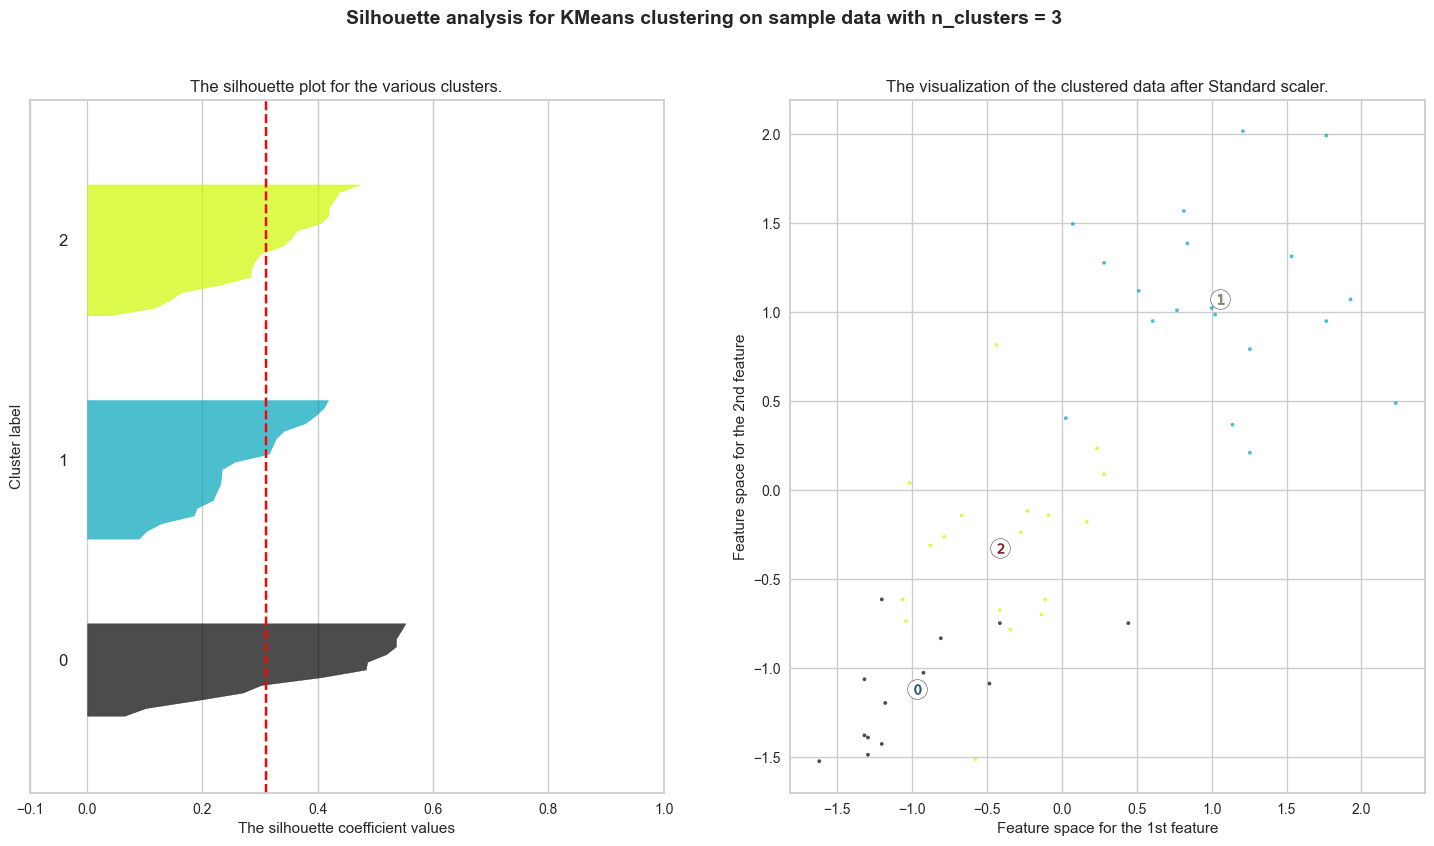

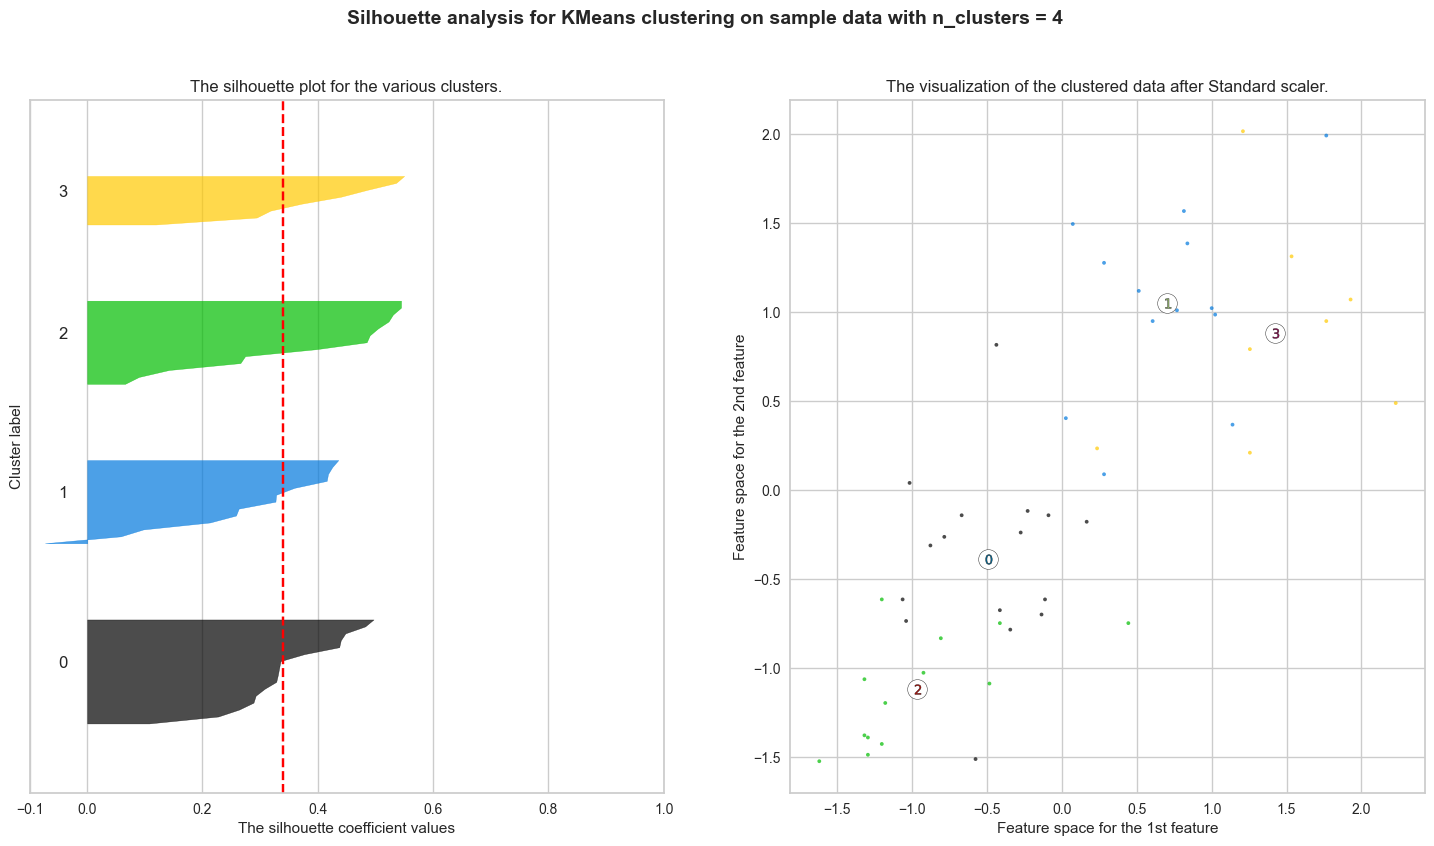

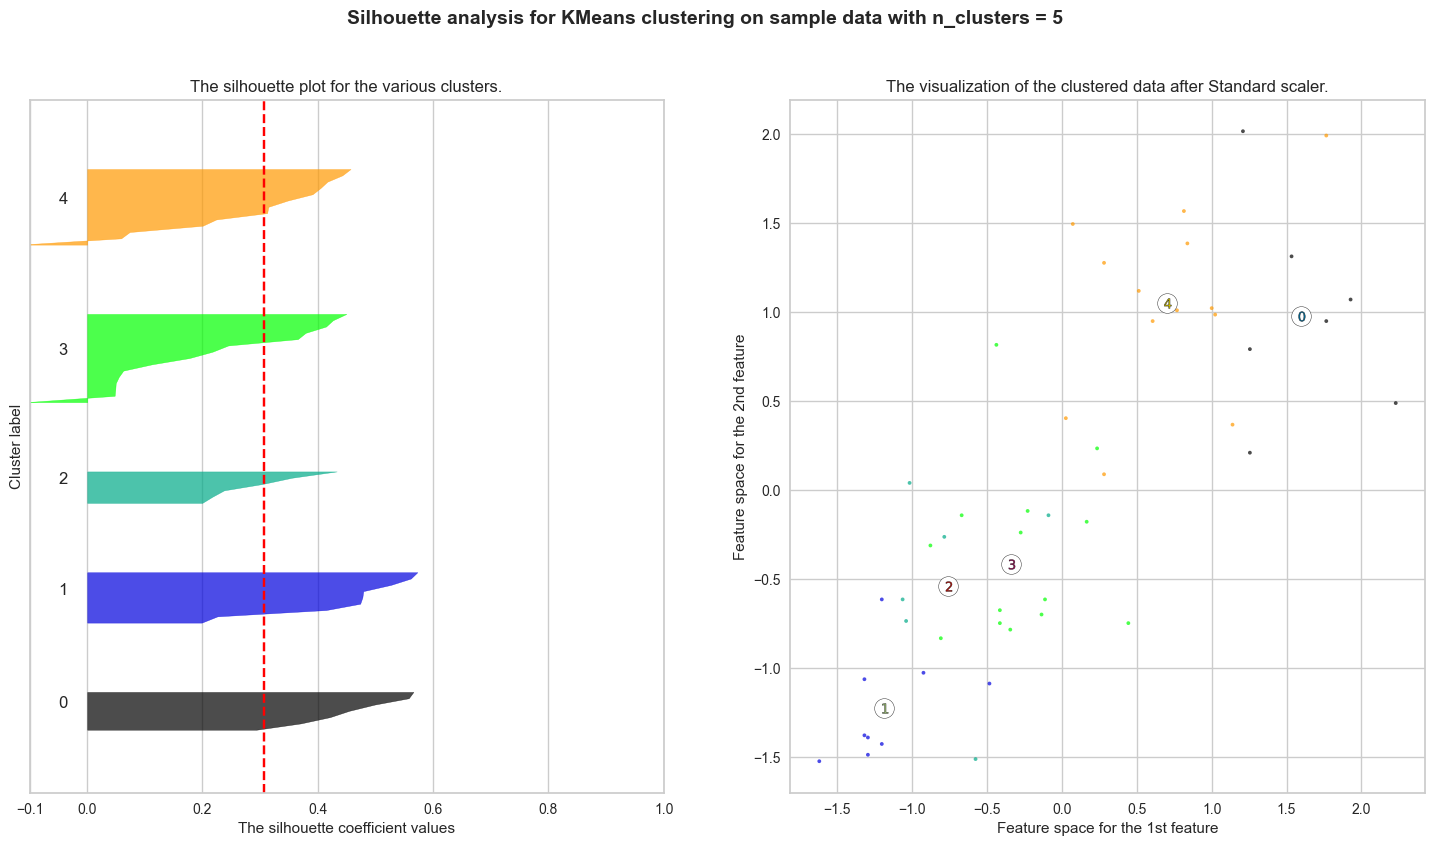

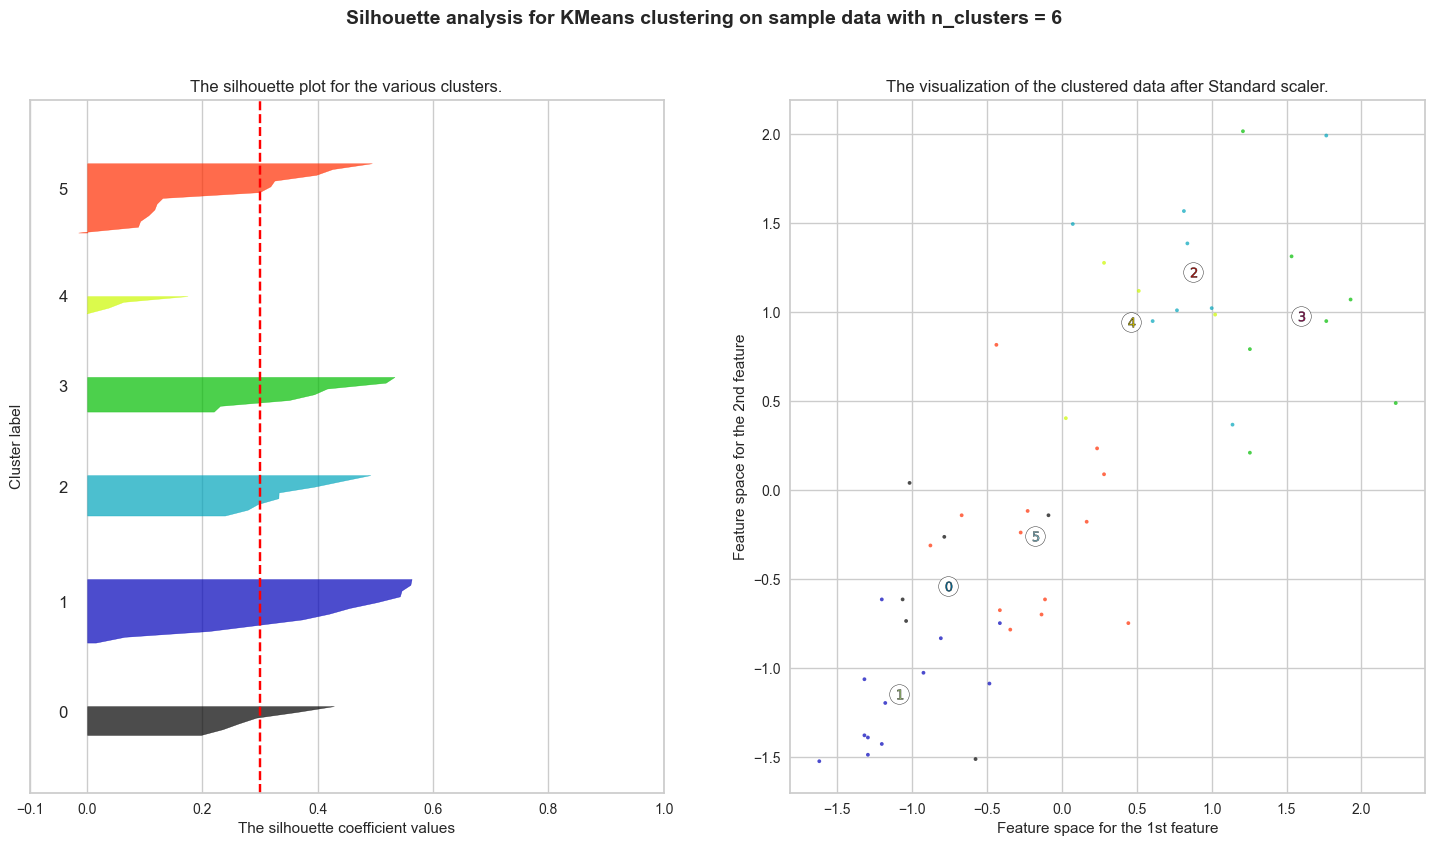

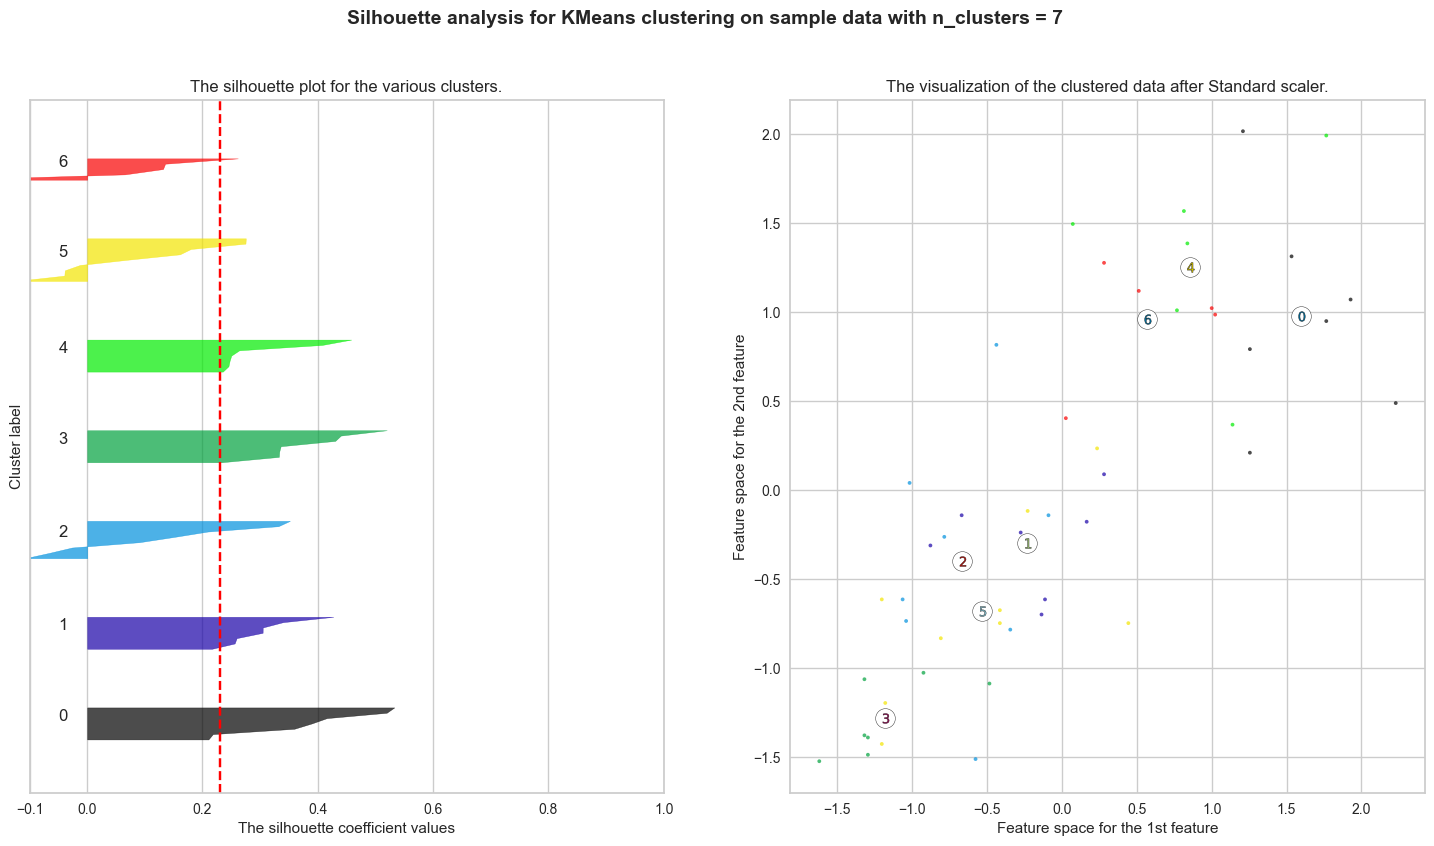

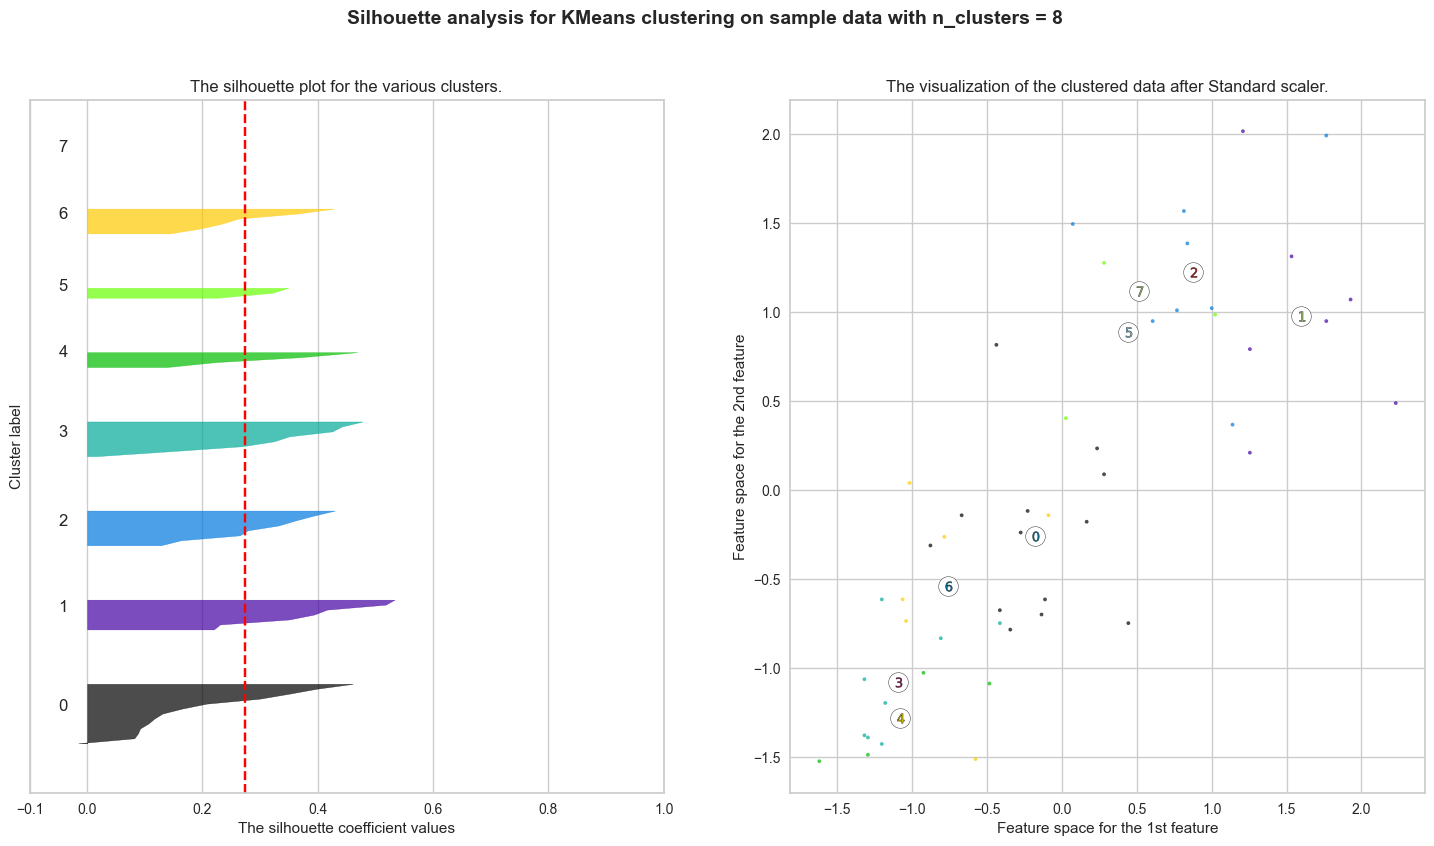

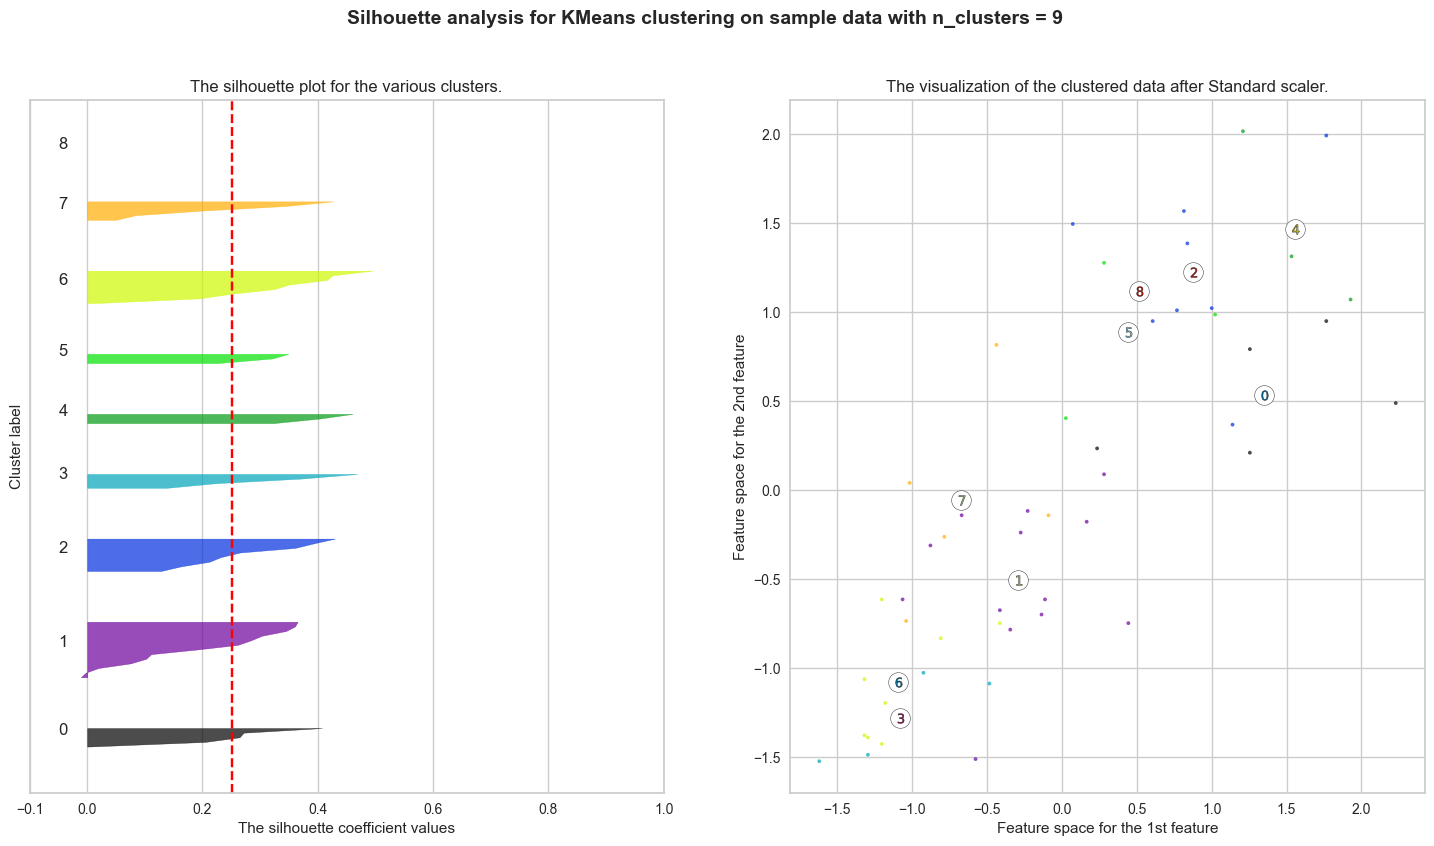

In [61]:
range_n_clusters=range(2,10)
for n_clusters in range_n_clusters:
    fig,(ax1,ax2)=plt.subplots(1,2)
    fig.set_size_inches(18,9)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    
    ax1.set_xlim([-0.1,1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    
    ax1.set_ylim([0,len(std_df)+(n_clusters+1)*10])
    
    clusterer=KMeans(n_clusters,random_state=0)
    cluster_labels=clusterer.fit_predict(std_df)
    silhouette_avg=sil(std_df,cluster_labels)
    print("for n_clusters =", n_clusters, 'the average silhouette_score is:',silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(std_df, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
        ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(std_df[:,0], std_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

     # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Build KMeans Cluster algorithm using K=3 and Standard Scaler Applied Dataset 

In [62]:
model_kmeans=KMeans(n_clusters=3,random_state=0)
y_predict_kmeans=model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(50,)

In [63]:
y_predict_kmeans

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [64]:
model_kmeans.labels_

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [65]:
model_kmeans.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.05377053,  1.07340253,  0.19371445,  0.86104144],
       [-0.41081687, -0.32571014,  0.4740874 , -0.20357044]])

In [66]:
model_kmeans.inertia_

80.0888613219962

In [67]:
df['Kmeans_label']=model_kmeans.labels_

In [68]:
df.groupby('Kmeans_label').agg(['mean'])

Murder     Assault   UrbanPop       Rape
                   mean        mean       mean       mean
Kmeans_label                                             
0              3.600000   78.538462  52.076923  12.176923
1             12.331579  259.315789  68.315789  29.215789
2              6.016667  143.888889  72.333333  19.344444

In [69]:
df[df['Kmeans_label']==0].head()

Murder  Assault  UrbanPop  Rape  Kmeans_label
States                                                  
Idaho         2.6      120        54  14.2             0
Iowa          2.2       56        57  11.3             0
Kentucky      9.7      109        52  16.3             0
Maine         2.1       83        51   7.8             0
Minnesota     2.7       72        66  14.9             0

In [70]:
df[df['Kmeans_label']==1].head()

Murder  Assault  UrbanPop  Rape  Kmeans_label
States                                                   
Alabama       13.2      236        58  21.2             1
Alaska        10.0      263        48  44.5             1
Arizona        8.1      294        80  31.0             1
California     9.0      276        91  40.6             1
Colorado       7.9      204        78  38.7             1

In [71]:
df[df['Kmeans_label']==2].head()

Murder  Assault  UrbanPop  Rape  Kmeans_label
States                                                    
Arkansas        8.8      190        50  19.5             2
Connecticut     3.3      110        77  11.1             2
Delaware        5.9      238        72  15.8             2
Hawaii          5.3       46        83  20.2             2
Indiana         7.2      113        65  21.0             2

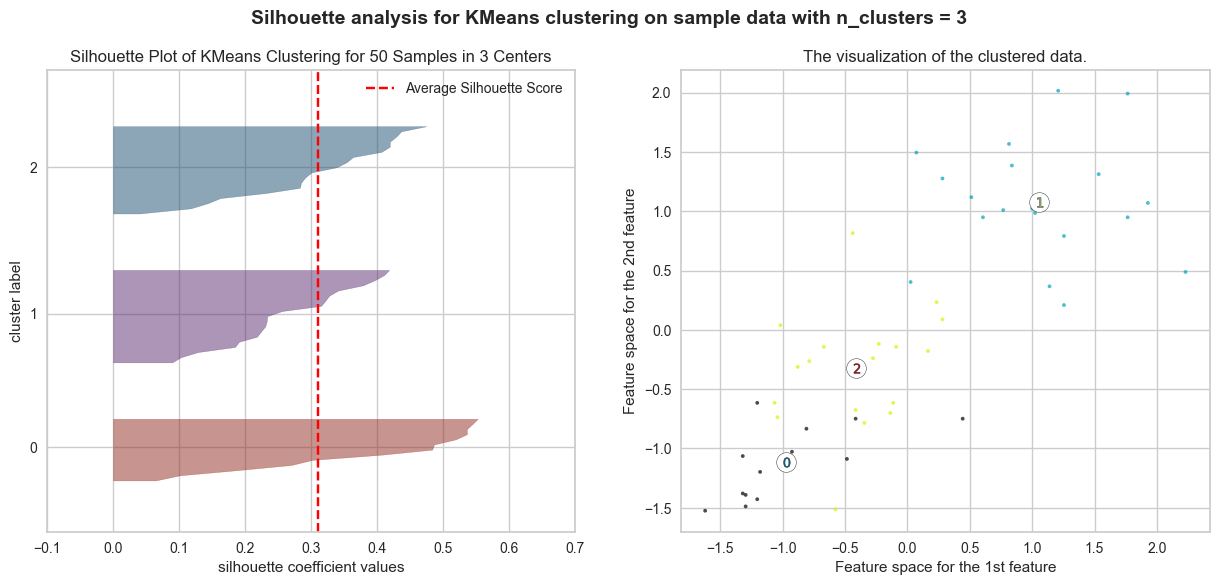

In [72]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(std_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 3) # 6 is number of clusters
ax2.scatter(std_df[:, 0], std_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 3),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

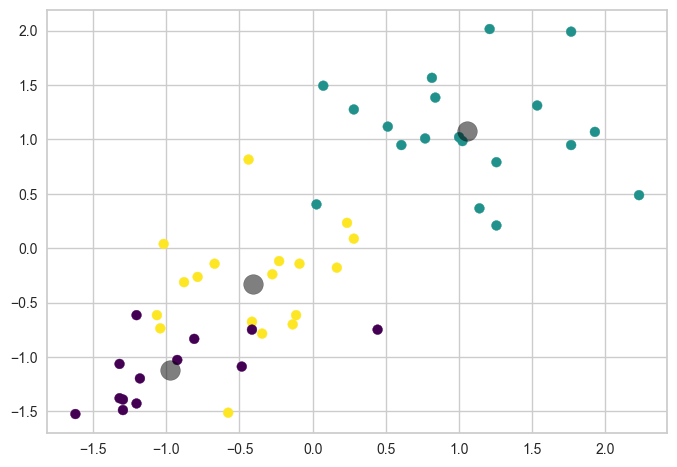

In [73]:
# Let's visualize the data we reduced to 2 sets.

plt.scatter(std_df[:,0],std_df[:,1],c=model_kmeans.labels_,s=50,cmap='viridis')

centers=model_kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)

# Elbow Method and Silhouette Score on MinMaxScaler Applied Data

In [74]:
cluster_range=range(1,15)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,n_init=10)
    clusters.fit(minmax_df)
    labels=clusters.labels_
    centroids=clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
cluster_df=pd.DataFrame({'num_cluster': cluster_range,'cluster_errors':cluster_errors})
cluster_df

num_cluster  cluster_errors
0             1       13.184123
1             2        6.596894
2             3        5.016389
3             4        3.683456
4             5        3.183158
5             6        2.825169
6             7        2.636730
7             8        2.395147
8             9        2.063856
9            10        1.884164
10           11        1.624109
11           12        1.554258
12           13        1.387783
13           14        1.294586

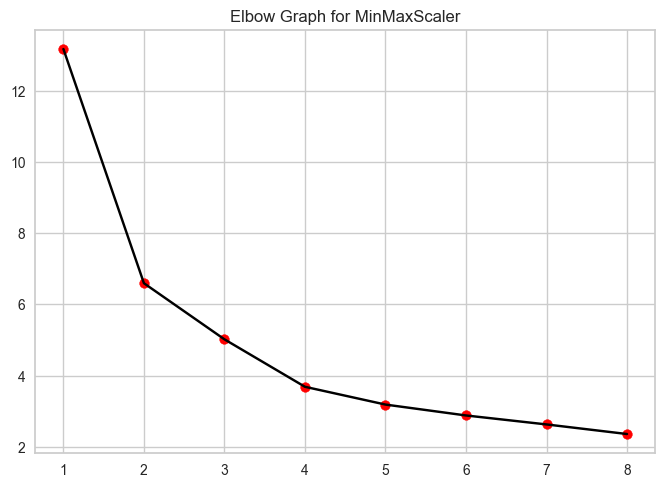

In [75]:
wcss=[]
for i in range(1,9):
    
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel=('Number of clusters')
plt.ylabel=('WCSS')
plt.show()

Elbow plot for minmaxscaler plot


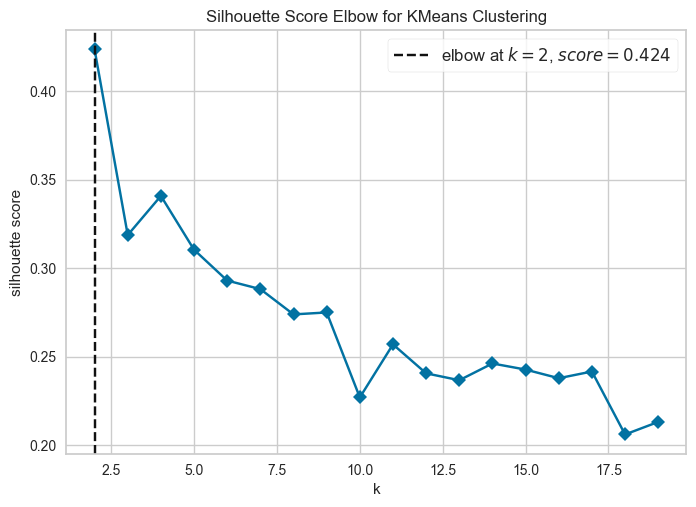

In [76]:
model=KMeans(random_state=10,max_iter=500,init='k-means++')
visualizer=KElbowVisualizer(model,k=(2,20),metric='silhouette',timings=False)
print('Elbow plot for minmaxscaler plot')
visualizer.fit(minmax_df)
visualizer.poof()
plt.show()

In [77]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(minmax_df)
    sil_score1= sil(minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.42364457559625074
For n_clusters = 3 The average silhouette_score is : 0.3187755079997931
For n_clusters = 4 The average silhouette_score is : 0.34089035600743633
For n_clusters = 5 The average silhouette_score is : 0.3062742525752849
For n_clusters = 6 The average silhouette_score is : 0.27035587392051724
For n_clusters = 7 The average silhouette_score is : 0.2371119747926814
For n_clusters = 8 The average silhouette_score is : 0.24422345369104229
For n_clusters = 9 The average silhouette_score is : 0.23181794623773663


For n_clusters = 2 The average silhouette_score is : 0.42364457559625074
For n_clusters = 3 The average silhouette_score is : 0.3187755079997931
For n_clusters = 4 The average silhouette_score is : 0.34089035600743633
For n_clusters = 5 The average silhouette_score is : 0.31047828422452595
For n_clusters = 6 The average silhouette_score is : 0.29304639988963094
For n_clusters = 7 The average silhouette_score is : 0.28821826266004197
For n_clusters = 8 The average silhouette_score is : 0.2739250289741455
For n_clusters = 9 The average silhouette_score is : 0.27503190107418357


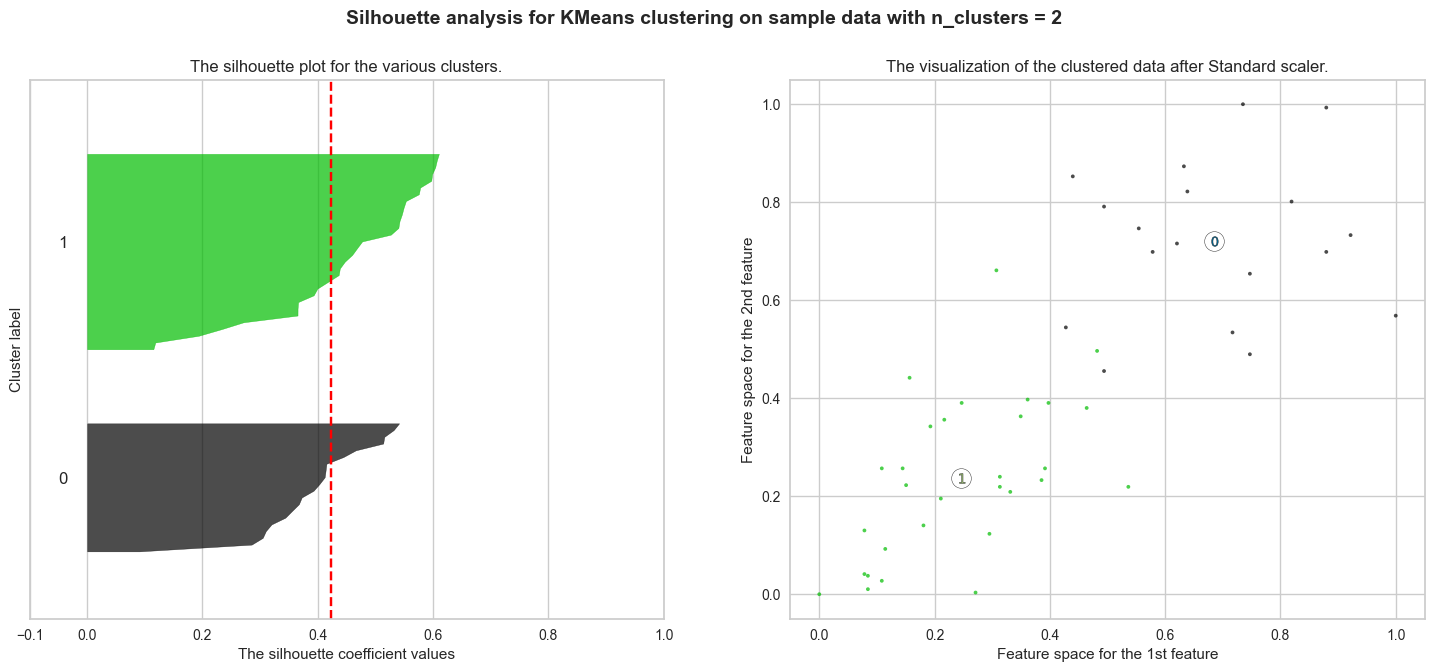

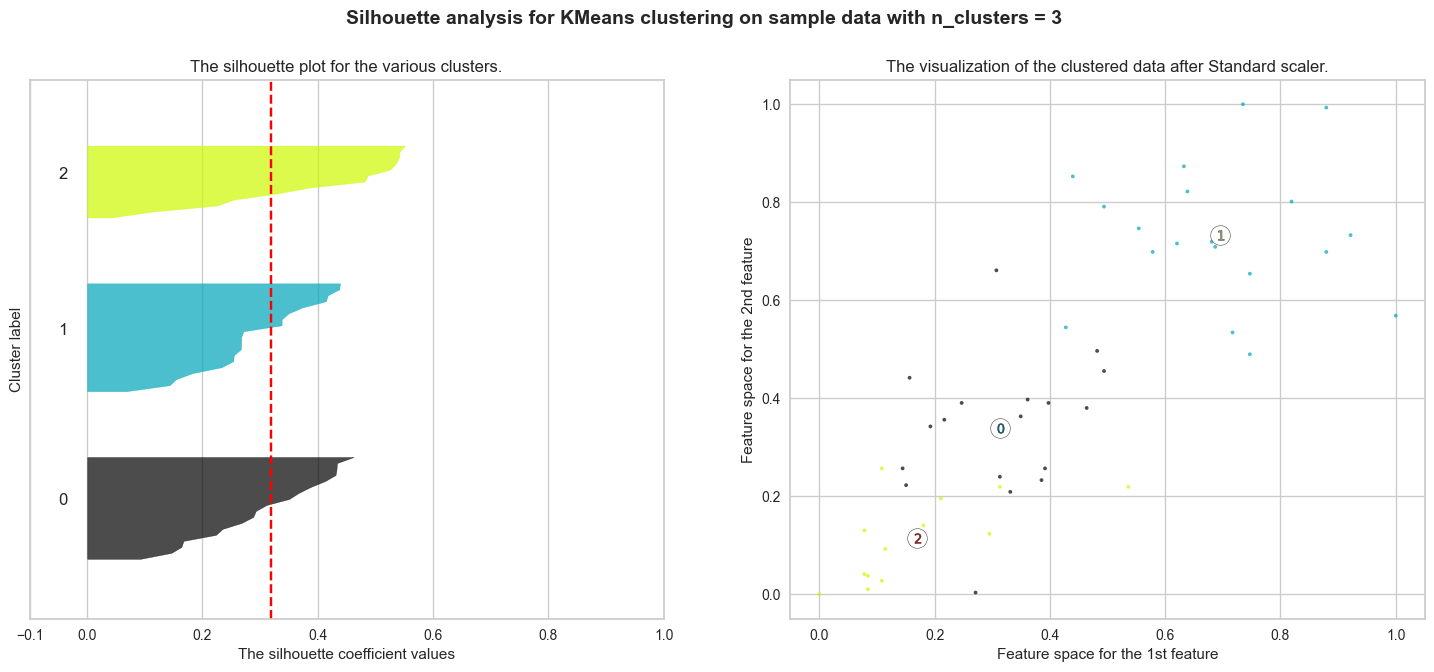

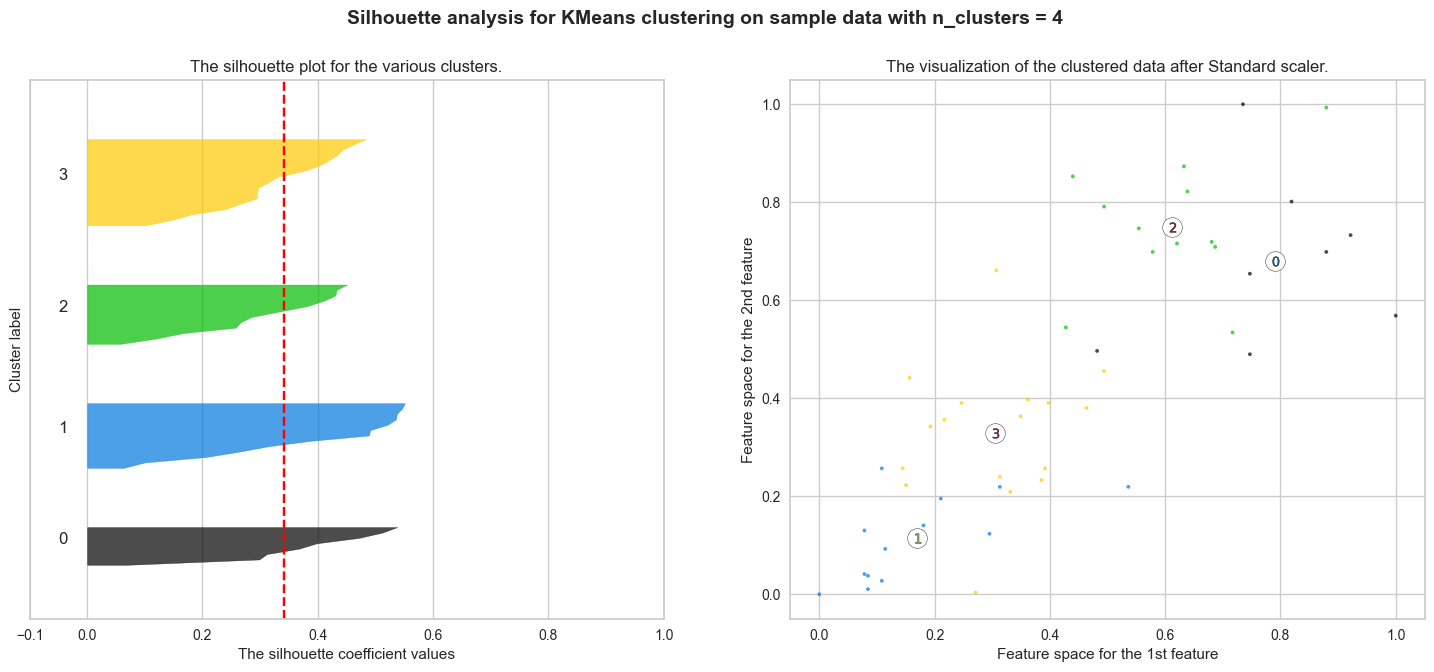

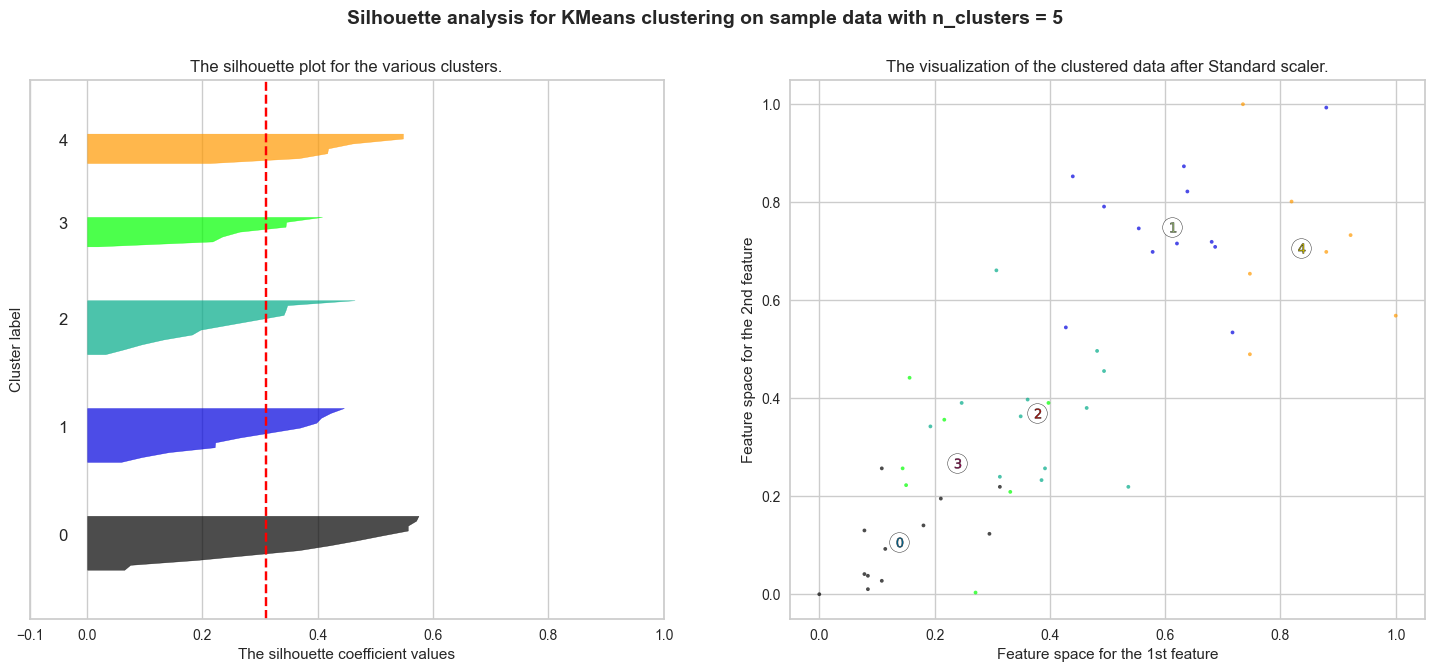

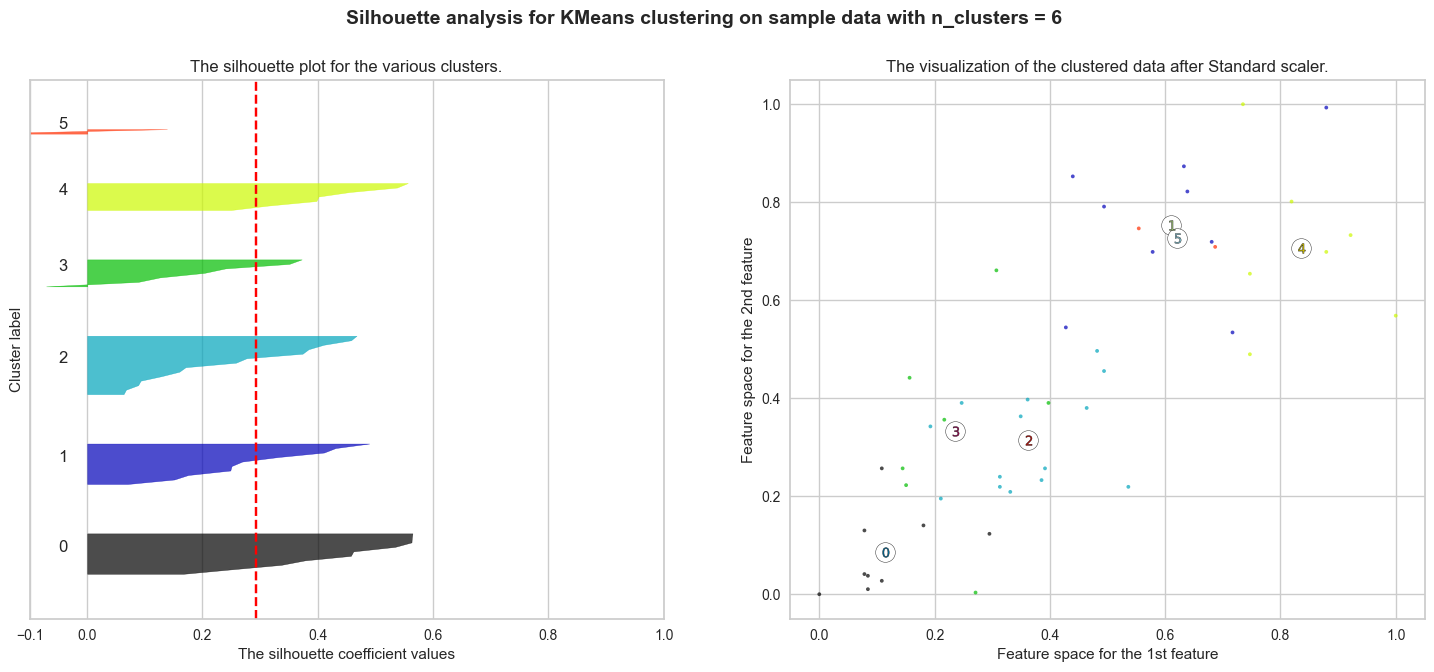

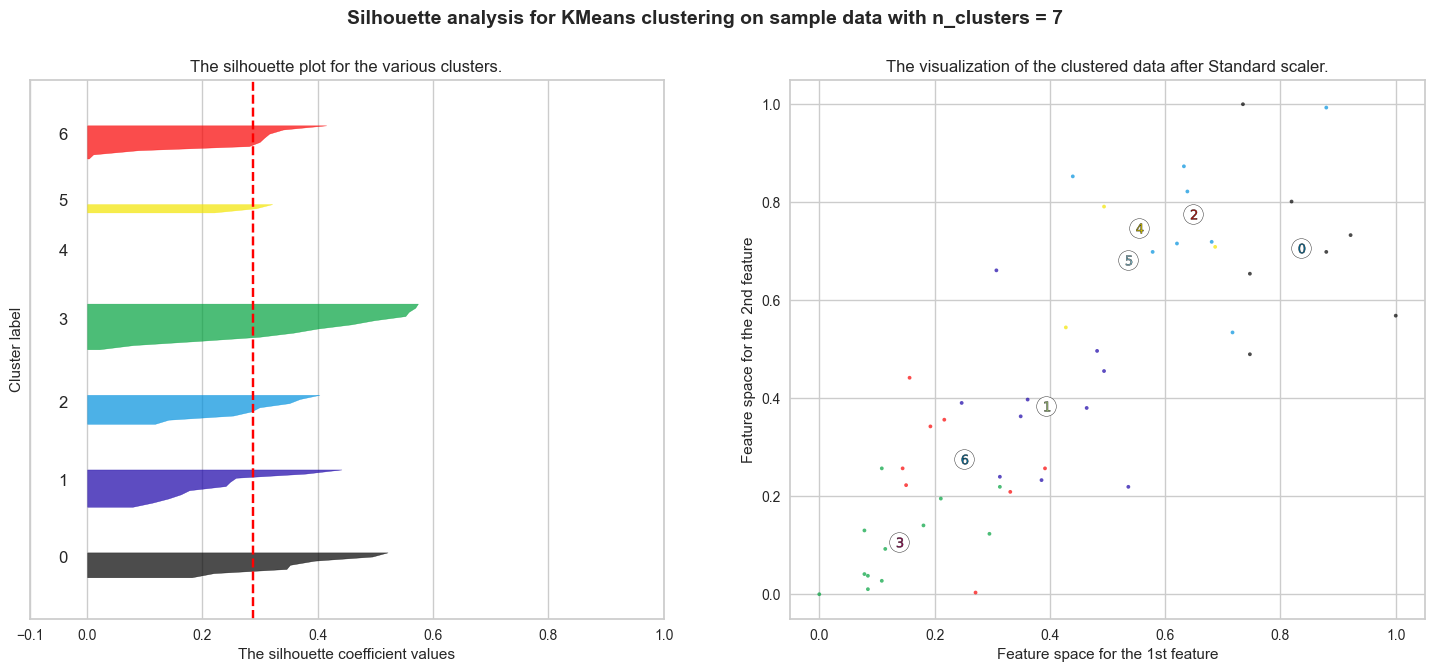

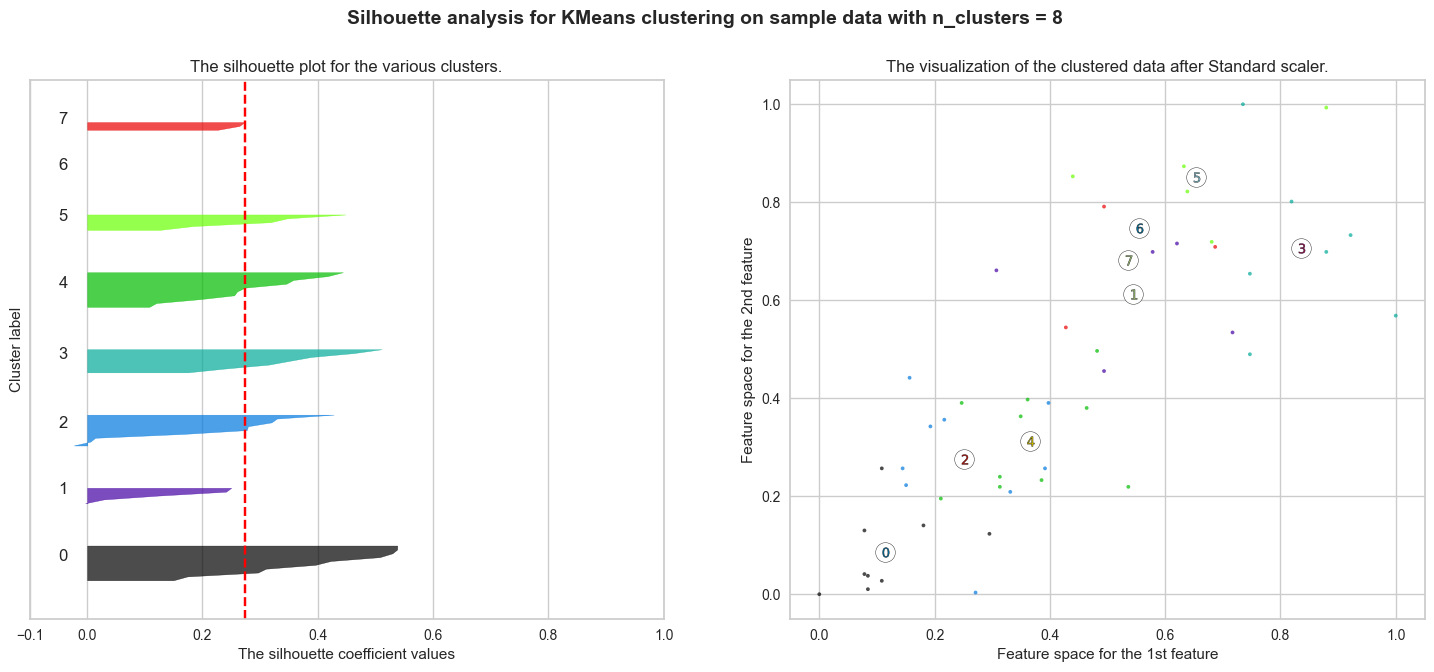

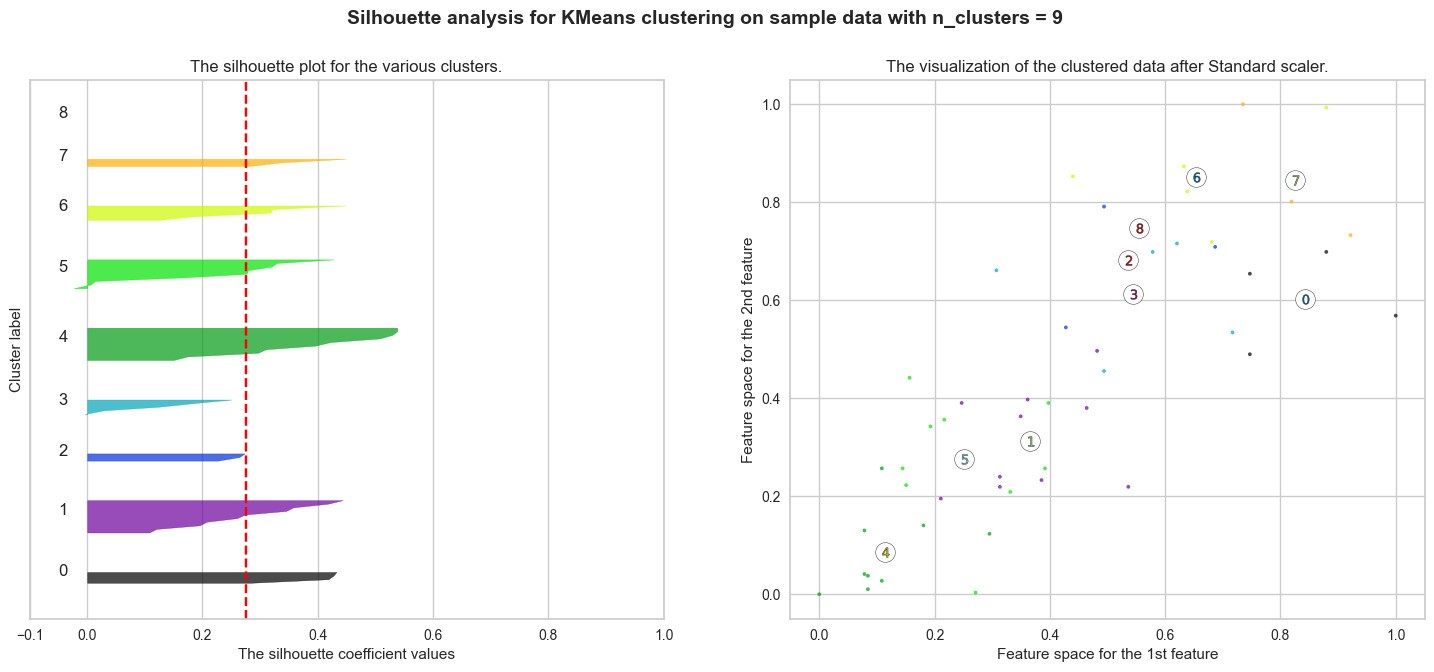

In [78]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(minmax_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(minmax_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(minmax_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(minmax_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(minmax_df[:,0], minmax_df[:,1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#The MinMax Scaler Applied data, the ideal number of clusters is 2, with a score higher than other options, of 0.42, but if you notice the number of cluster 4 has also the best variation within cluster and between cluster with zero to no values going towards -1 and no mismatch in cluster segregation than the consecutive rest. If we check silhouette score with Normalize data kmeans model 0.42>0.40 .Best score always close to +1.

# Build KMeans Cluster algorithm using K=2 and MinMaxScaler Applied Dataset

In [79]:
model_kmeans=KMeans(n_clusters=2,random_state=0,init='k-means++')
y_predict_kmeans=model_kmeans.fit_predict(minmax_df)
y_predict_kmeans.shape

(50,)

In [80]:
model_kmeans.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [81]:
model_kmeans.cluster_centers_

array([[0.24518072, 0.23778539, 0.53615819, 0.22334195],
       [0.68463855, 0.72003425, 0.61694915, 0.56498708]])

In [82]:
model_kmeans.inertia_

6.596893867946196

In [83]:
df['kmeans_label']=model_kmeans.labels_

In [84]:
df[df['kmeans_label']==0].head()



Murder  Assault  UrbanPop  Rape  Kmeans_label  kmeans_label
States                                                                  
Arkansas        8.8      190        50  19.5             2             0
Connecticut     3.3      110        77  11.1             2             0
Delaware        5.9      238        72  15.8             2             0
Hawaii          5.3       46        83  20.2             2             0
Idaho           2.6      120        54  14.2             0             0

In [85]:
df[df['kmeans_label']==1].head()

Murder  Assault  UrbanPop  Rape  Kmeans_label  kmeans_label
States                                                                 
Alabama       13.2      236        58  21.2             1             1
Alaska        10.0      263        48  44.5             1             1
Arizona        8.1      294        80  31.0             1             1
California     9.0      276        91  40.6             1             1
Colorado       7.9      204        78  38.7             1             1

In [86]:
df[df['kmeans_label']==2].head()

Empty DataFrame
Columns: [Murder, Assault, UrbanPop, Rape, Kmeans_label, kmeans_label]
Index: []

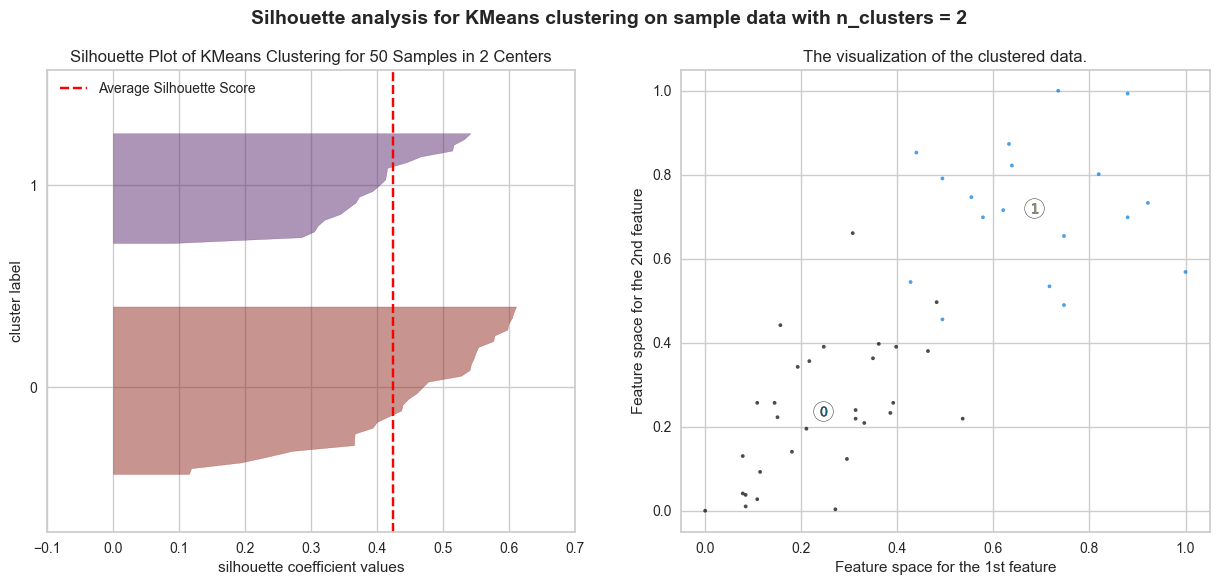

In [87]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(minmax_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 4) # 6 is number of clusters
ax2.scatter(minmax_df[:, 0], minmax_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 2),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

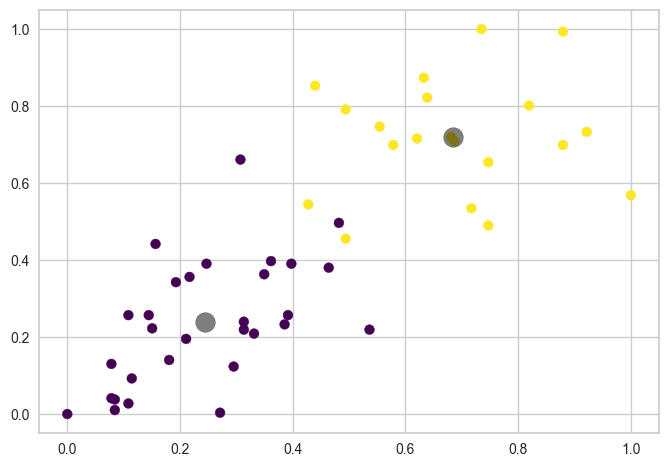

In [88]:
# Let's visualize the data we reduced to 2 sets.

plt.scatter(minmax_df[:,0], minmax_df[:,1], c = model_kmeans.labels_, s = 50, cmap = "viridis")

centers = model_kmeans.cluster_centers_                                 
# We want to create 2 centers and show them on the visual.

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)

In [89]:
df.groupby('kmeans_label').agg(['mean'])

Murder     Assault   UrbanPop       Rape Kmeans_label
                mean        mean       mean       mean         mean
kmeans_label                                                       
0              4.870  114.433333  63.633333  15.943333     1.133333
1             12.165  255.250000  68.400000  29.165000     1.050000

In [90]:
#We can now clearly see the 2 number of clusters formed, which can be described as under
#Cluster0, Safe Zone Defines the group of Urban States with Lowest of Crimes
#Cluster1, Danger Zone Defines the group of Urban States with Highest Rate of Crimes

# Hierarchical Clustering Algorithm¶

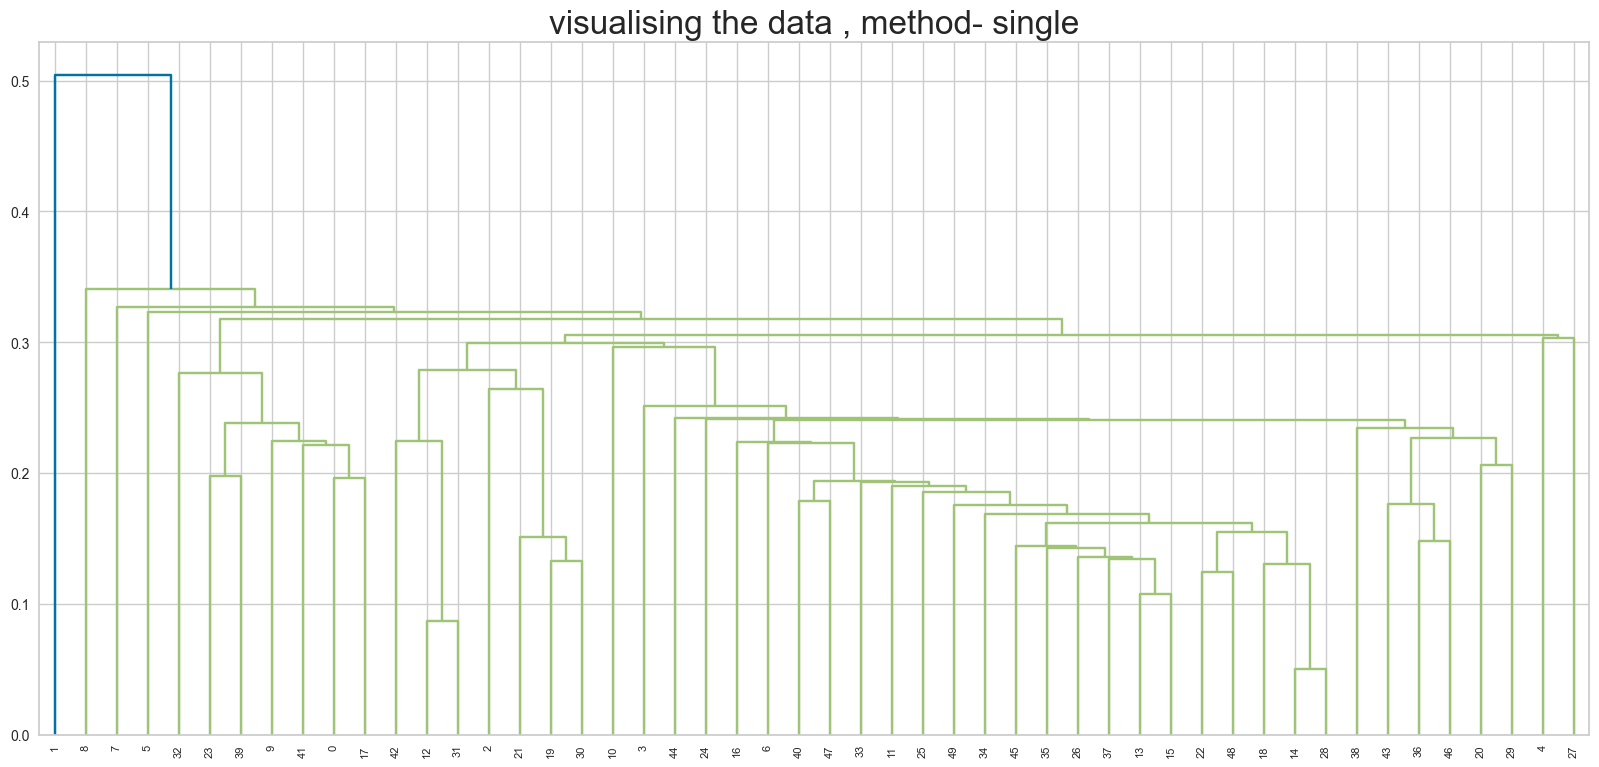

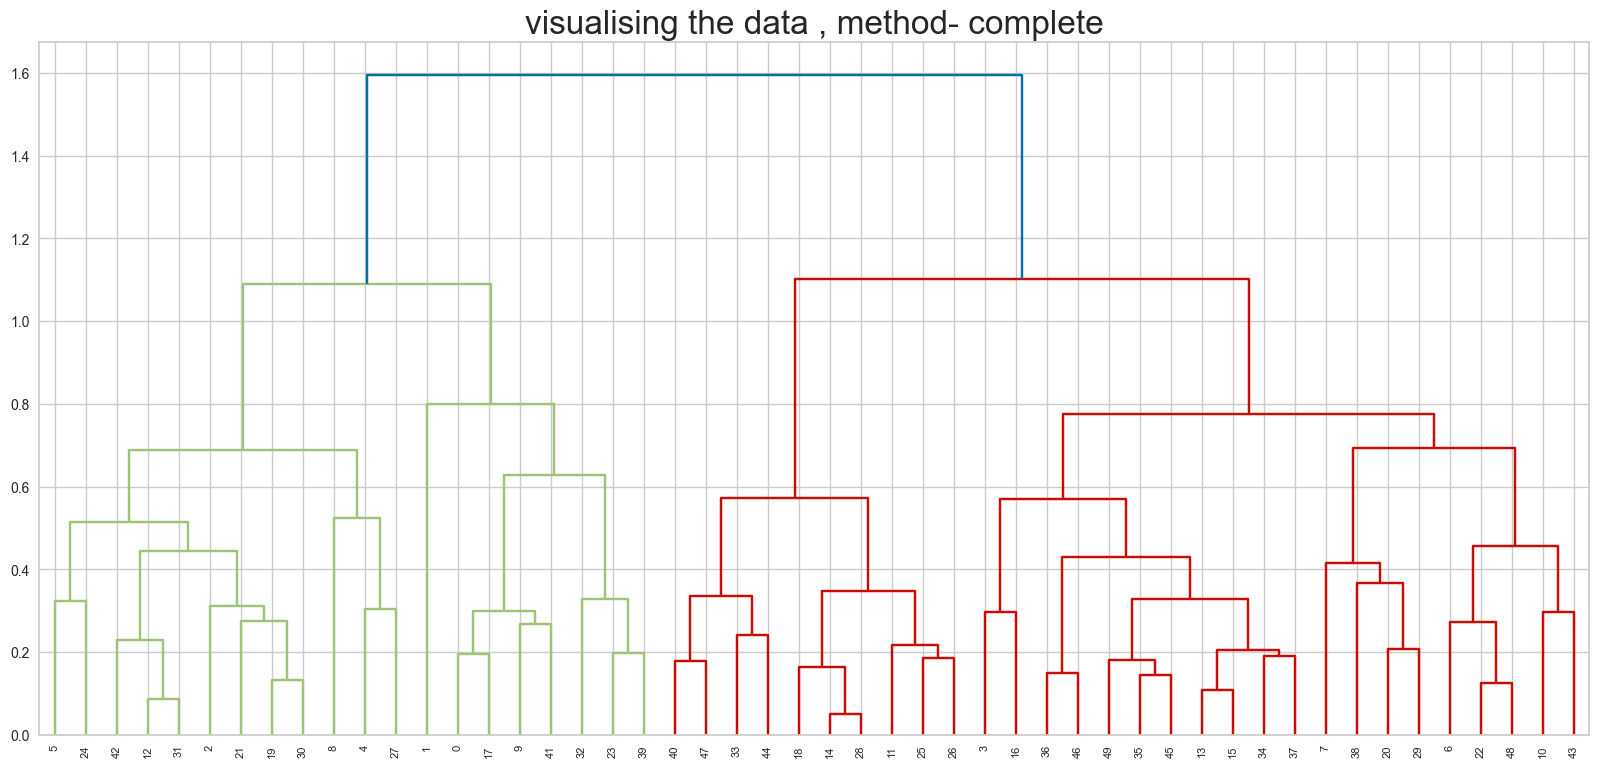

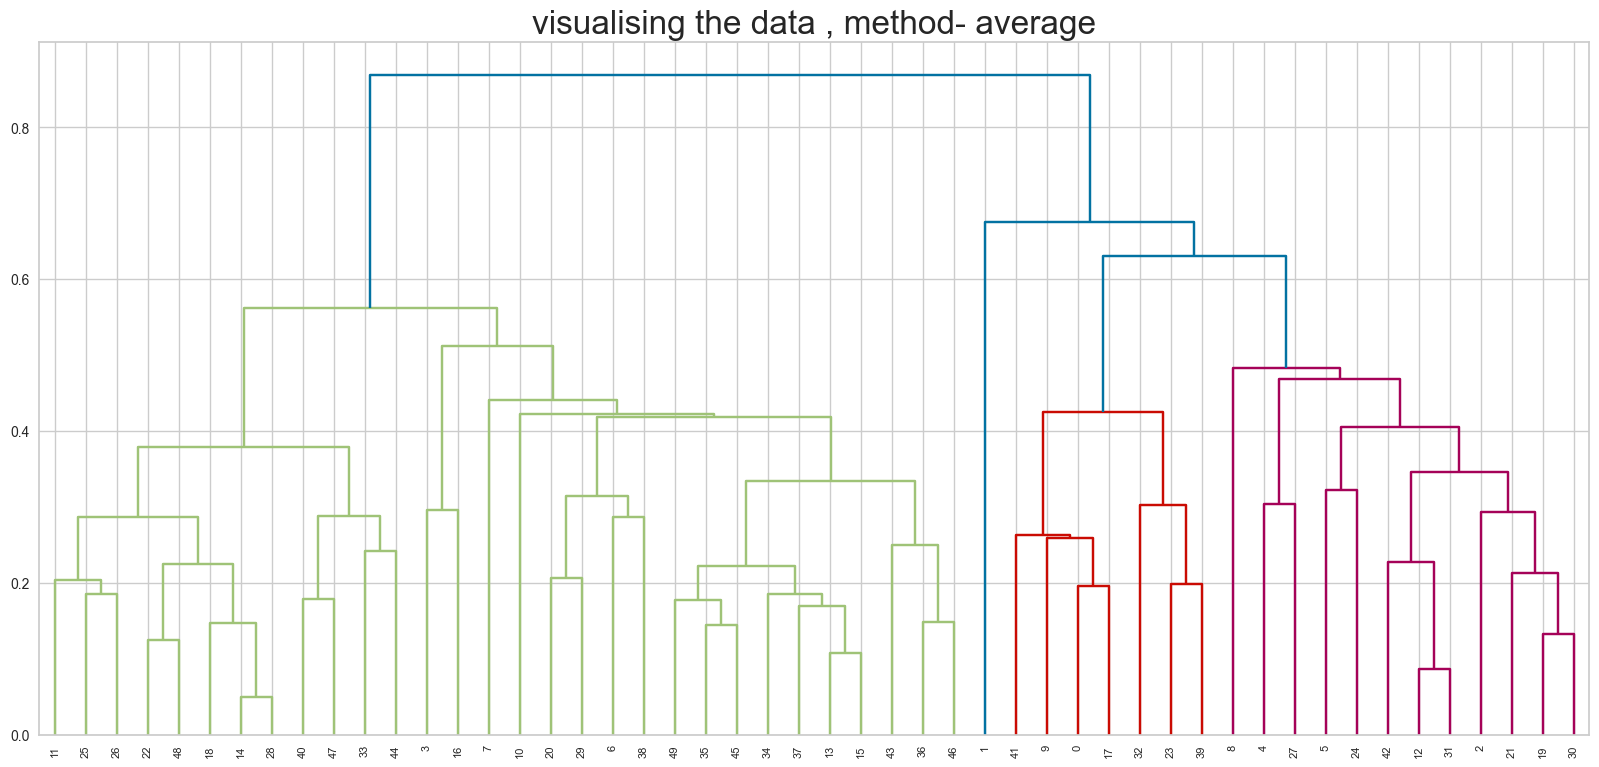

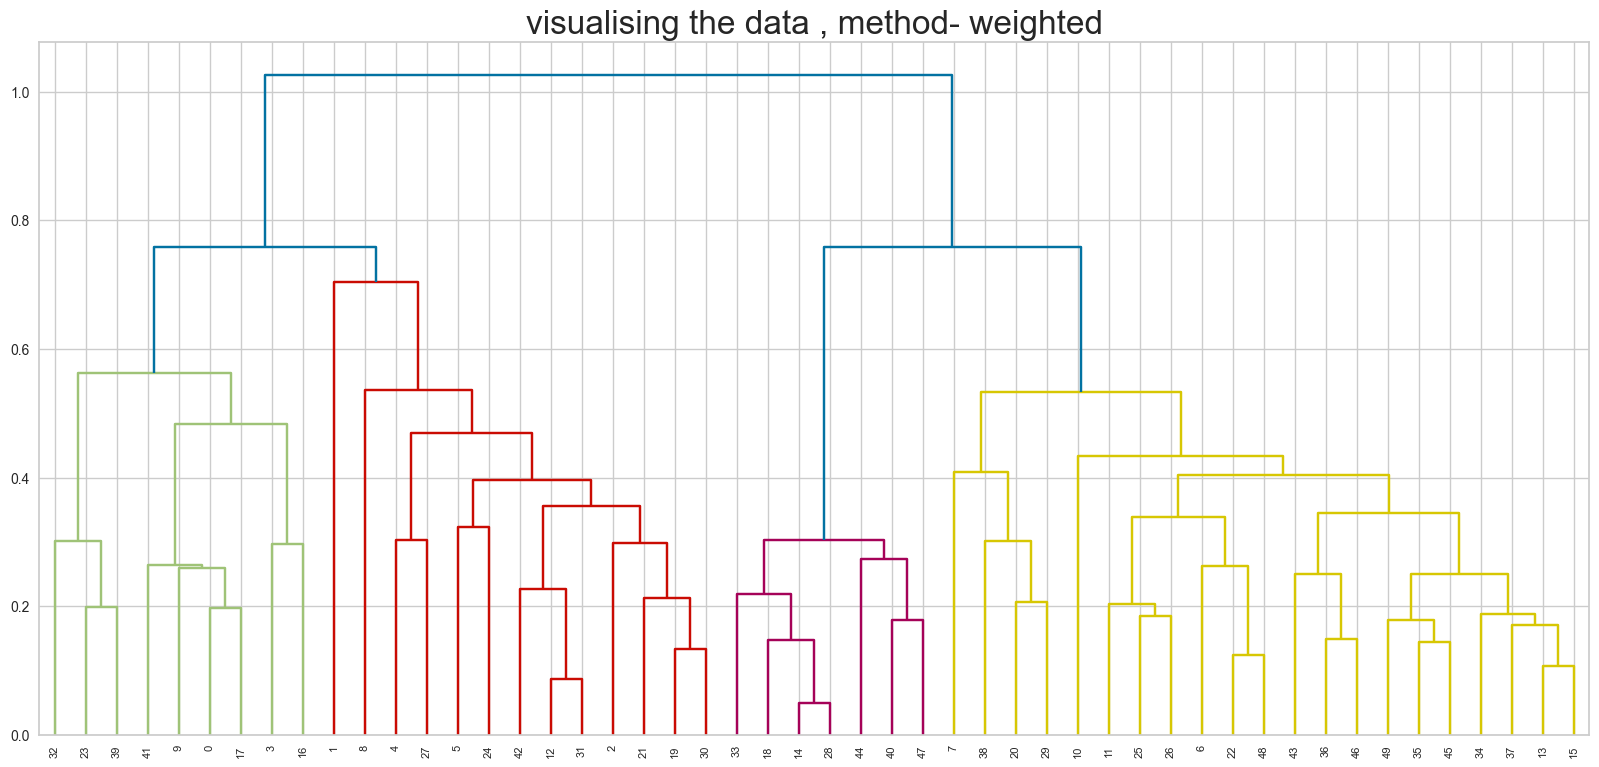

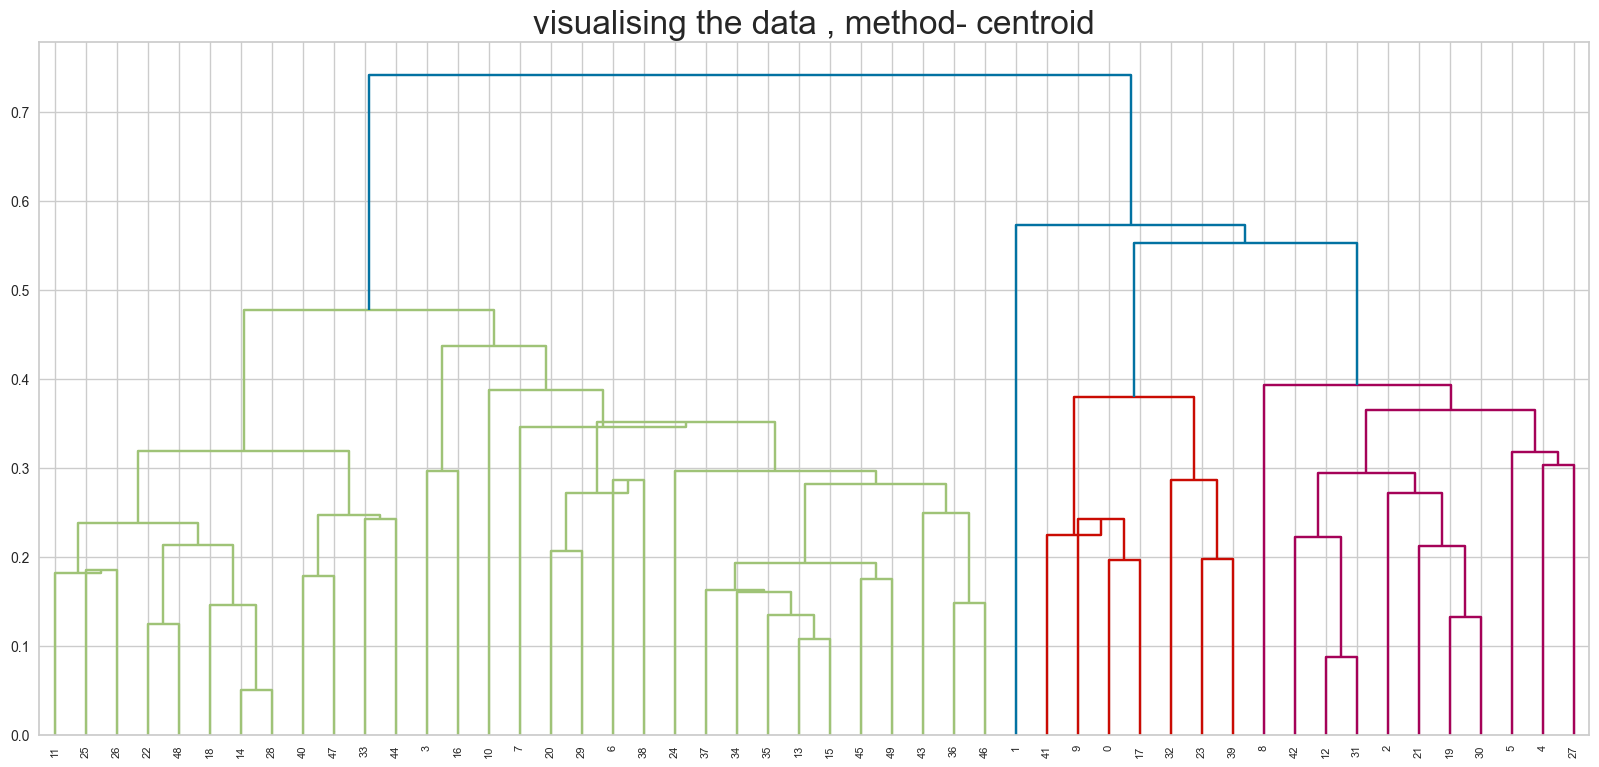

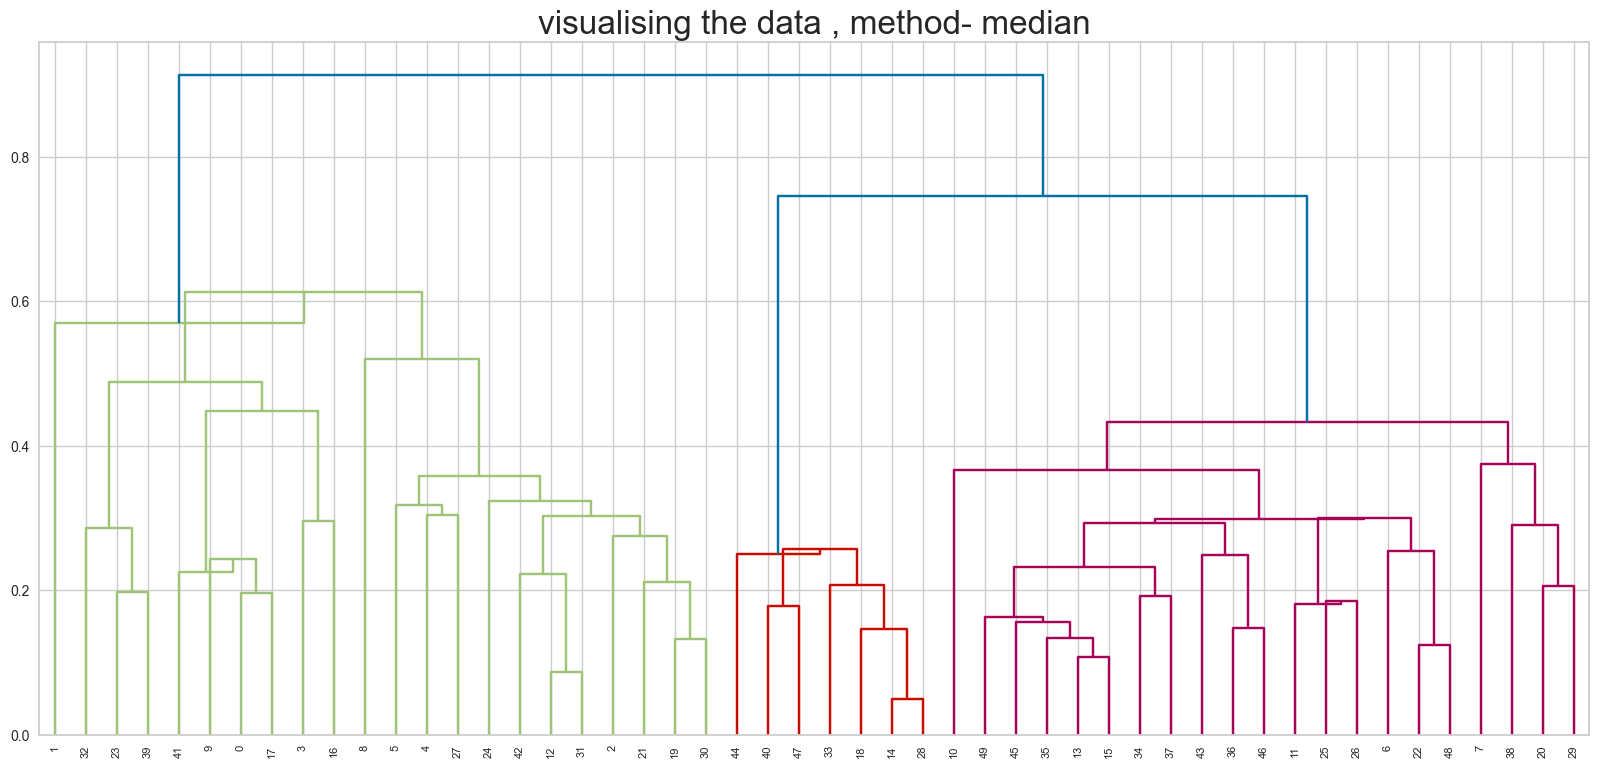

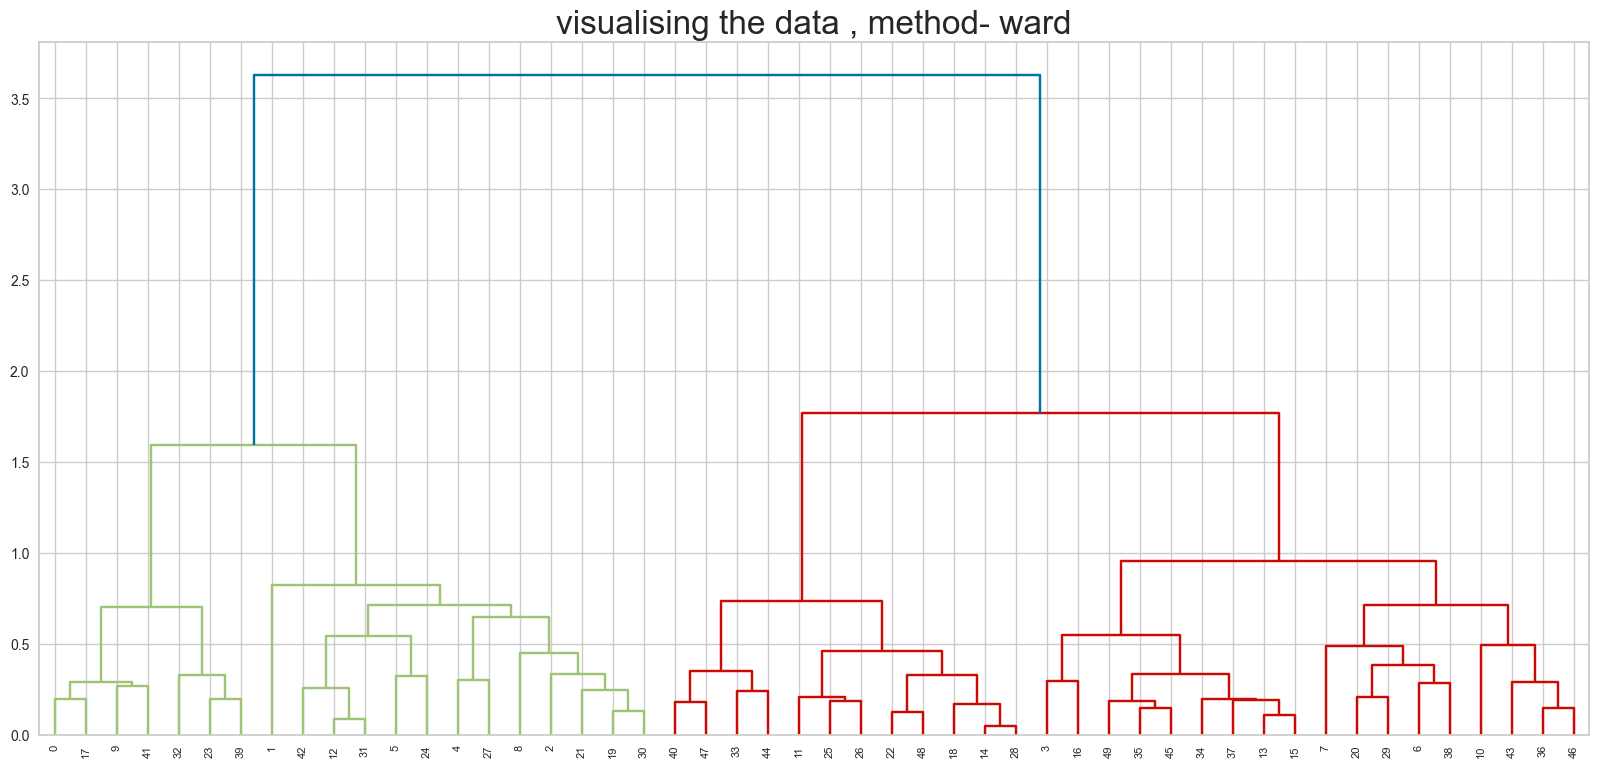

In [103]:
#apply dendogram on data

for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize=(20,9))
    
    dict={'fontsize':24}
    
    plt.title('visualising the data , method- {}'.format(methods),fontdict=dict)
    Dendrogram1=sch.dendrogram(sch.linkage(minmax_df,method=methods,optimal_ordering=False))

In [115]:
n_clusters=range(2,9)
for n_clusters in n_clusters:
    for linkage in ["ward", "complete", "average", "single"]:
        hie_cluster1=AgglomerativeClustering(n_clusters,linkage=linkage)
        hie_labels1=hie_cluster1.fit_predict(minmax_df)
        silhouette_score1=sil(minmax_df,hie_labels1)
        print('n_cluster :',n_clusters,'the avarage silhoueete score for linkage:',linkage, ':',silhouette_score1)
    print()

n_cluster : 2 the avarage silhoueete score for linkage: ward : 0.42364457559625074
n_cluster : 2 the avarage silhoueete score for linkage: complete : 0.42364457559625074
n_cluster : 2 the avarage silhoueete score for linkage: average : 0.42364457559625074
n_cluster : 2 the avarage silhoueete score for linkage: single : 0.21033337025958487

n_cluster : 3 the avarage silhoueete score for linkage: ward : 0.31916915428121284
n_cluster : 3 the avarage silhoueete score for linkage: complete : 0.30877213909512063
n_cluster : 3 the avarage silhoueete score for linkage: average : 0.35149572430421583
n_cluster : 3 the avarage silhoueete score for linkage: single : 0.14223288708185444

n_cluster : 4 the avarage silhoueete score for linkage: ward : 0.3298707379986785
n_cluster : 4 the avarage silhoueete score for linkage: complete : 0.3060729442426308
n_cluster : 4 the avarage silhoueete score for linkage: average : 0.36992391140277175
n_cluster : 4 the avarage silhoueete score for linkage: single

# The seperation in Each Method indicate that 2 as the optimal number for clusters.

# Dendrogram on Standard Scaler Applied on Data

In [116]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = sil(std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4084890326217641
For n_clusters = 2 The average silhouette_score with linkage- single : 0.23455598753159795

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31036358174027895
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.36924314190439733
For n_clusters = 3 The average silhouette_score with linkage- average : 0.34863679190476177
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14582343625170263

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3370187183556962
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.31595507426164543
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3636819420151221

# Run Hierarchical Clustering.(Agglomerative Clustering) 

In [117]:
agg_clustering=AgglomerativeClustering(n_clusters=2,linkage='ward')
y_predict_hie=agg_clustering.fit_predict(minmax_df)
y_predict_hie

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [118]:
agg_clustering.n_clusters

2

In [122]:
(sil(minmax_df,agg_clustering.labels_)*100).round(3)

42.364

#Putting Cluster lables into original dataset And analysis of the same

In [126]:
df['Hierarchical_labels']=agg_clustering.labels_

In [127]:
df.groupby('Hierarchical_labels').agg(['mean'])

Murder     Assault   UrbanPop       Rape Kmeans_label  \
                       mean        mean       mean       mean         mean   
Hierarchical_labels                                                          
0                     4.870  114.433333  63.633333  15.943333     1.133333   
1                    12.165  255.250000  68.400000  29.165000     1.050000   

                    kmeans_label hierarchical_labels  
                            mean                mean  
Hierarchical_labels                                   
0                            0.0                 0.0  
1                            1.0                 1.0

<Axes: xlabel='Hierarchical_labels', ylabel='Murder'>

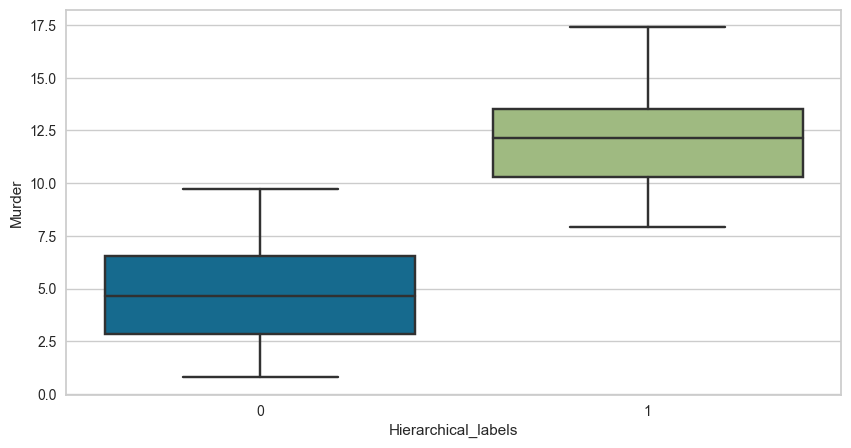

In [129]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_labels', y='Murder', data=df)

<Axes: xlabel='Hierarchical_labels', ylabel='Rape'>

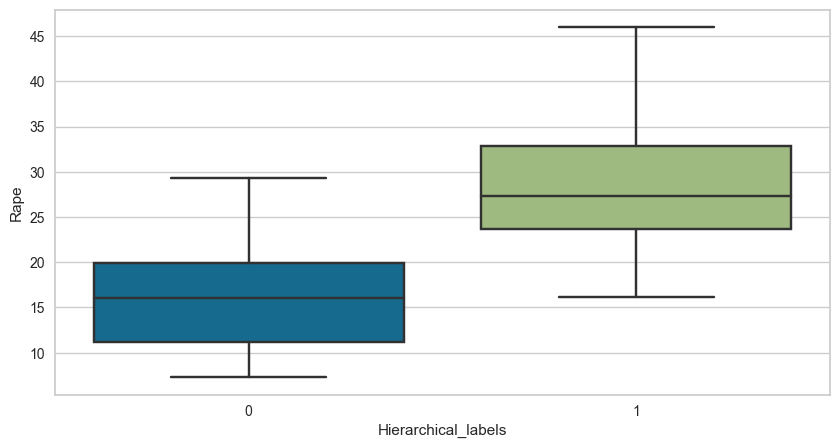

In [130]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_labels', y='Rape', data=df)

<Axes: xlabel='Hierarchical_labels', ylabel='Assault'>

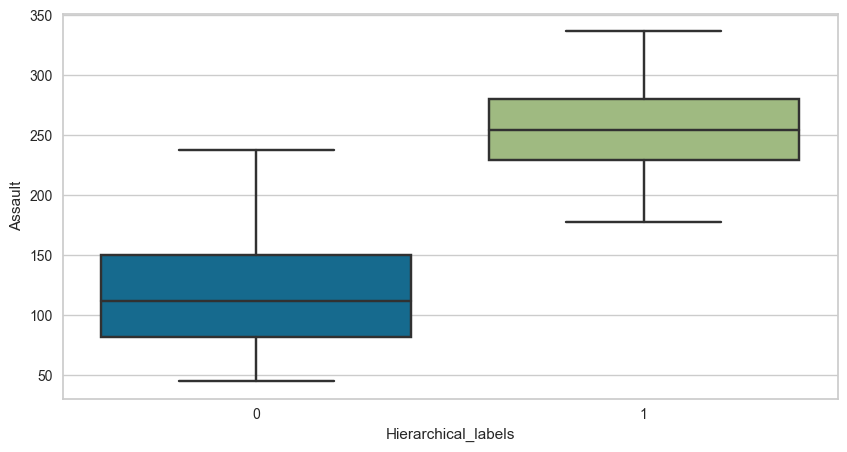

In [131]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_labels', y='Assault', data=df)

# DBSCAN - (Density Based Spatial Clustering of Applications with Noise)

# ![FilterMethod](https://miro.medium.com/max/627/1*yT96veo7Zb5QeswV7Vr7YQ.png)

In [132]:
from itertools import product

eps_values = np.arange(0.25,2,0.25) # eps values to be investigated
min_samples = np.arange(1,3)# min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [133]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(sil(std_df, DBS_clustering.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


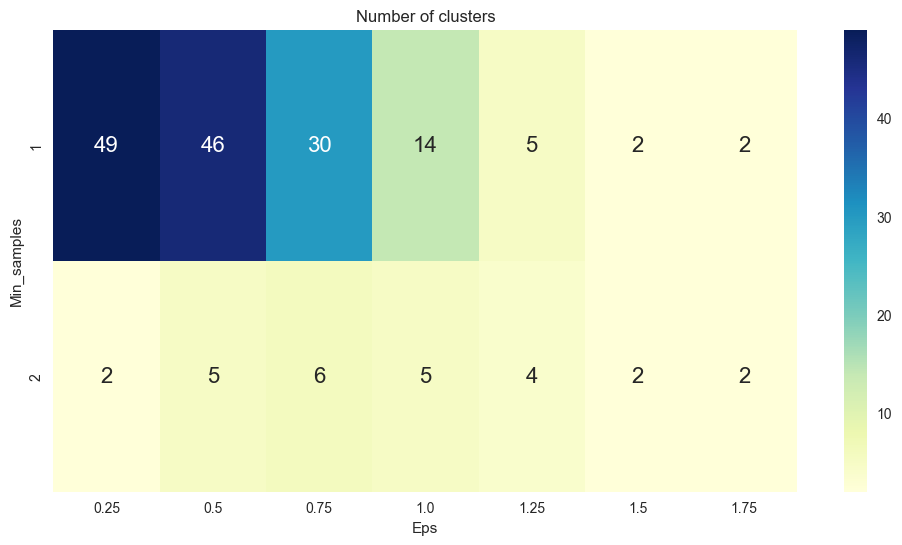

In [134]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

In [135]:
#As the heatplot above shows, the number of clusters vary from 49 to 2.¶

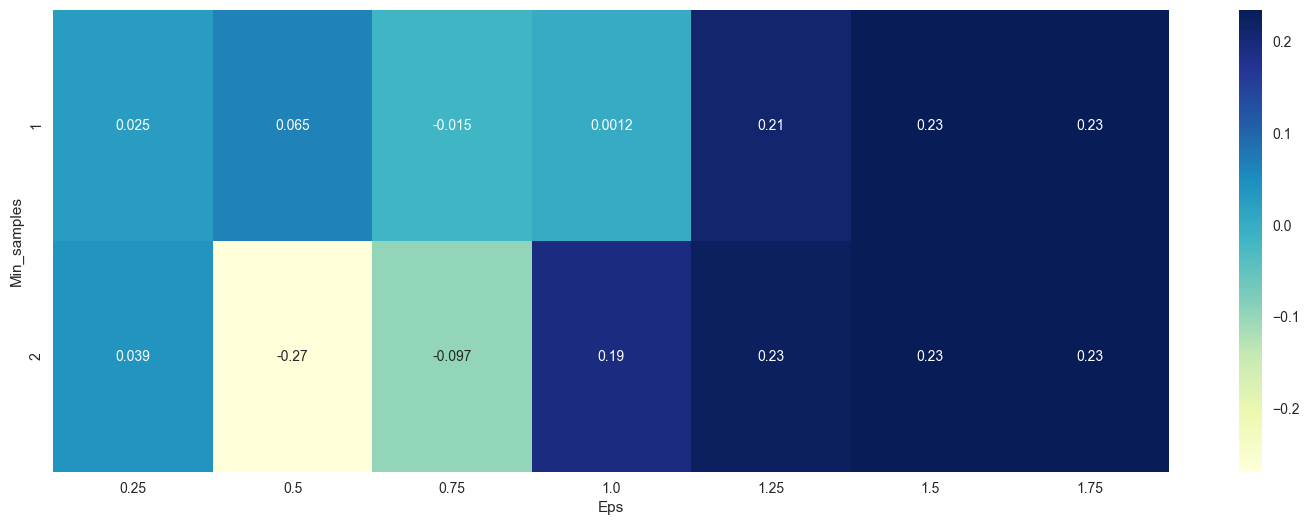

In [136]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [137]:
#Global maximum is 0.23 for eps=1.25 and min_samples=2

In [138]:
epsilon = [0.25,0.50,0.75,1,1.25,1.50,1.75,2]
min_samples = [1,2]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2346


# Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values¶

In [139]:
dbscan = DBSCAN(eps=1.5, min_samples=1) # min_samples = number of columns  or len(dataset.columns)* 3
dbscan.fit(std_df)

DBSCAN(eps=1.5, min_samples=1)

In [140]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [141]:
# -1 are the noise points in our dataset and the rest are the clusters

In [142]:
# Concating Labels with main dataset copy

df['DBSCAN_labels'] = dbscan.labels_
df.head()

Murder  Assault  UrbanPop  Rape  Kmeans_label  kmeans_label  \
States                                                                    
Alabama       13.2      236        58  21.2             1             1   
Alaska        10.0      263        48  44.5             1             1   
Arizona        8.1      294        80  31.0             1             1   
Arkansas       8.8      190        50  19.5             2             0   
California     9.0      276        91  40.6             1             1   

            hierarchical_labels  Hierarchical_labels  DBSCAN_labels  
States                                                               
Alabama                       1                    1              0  
Alaska                        1                    1              1  
Arizona                       1                    1              0  
Arkansas                      0                    0              0  
California                    1                    1              0

In [143]:
df.groupby('DBSCAN_labels').agg(['mean'])


Murder     Assault   UrbanPop       Rape Kmeans_label  \
                    mean        mean       mean       mean         mean   
DBSCAN_labels                                                             
0               7.742857  168.877551  65.897959  20.757143     1.102041   
1              10.000000  263.000000  48.000000  44.500000     1.000000   

              kmeans_label hierarchical_labels Hierarchical_labels  
                      mean                mean                mean  
DBSCAN_labels                                                       
0                 0.387755            0.387755            0.387755  
1                 1.000000            1.000000            1.000000

In [144]:
print("Silhouette Coefficient: %0.3f" % sil(std_df, dbscan.labels_))

Silhouette Coefficient: 0.235


# DBSCAN on MinMax Scaled Data

In [145]:
from itertools import product

eps_values = np.arange(0.25,0.75,0.25) # eps values to be investigated
min_samples = np.arange(1,3)# min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [146]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(minmax_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(sil(minmax_df, DBS_clustering.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


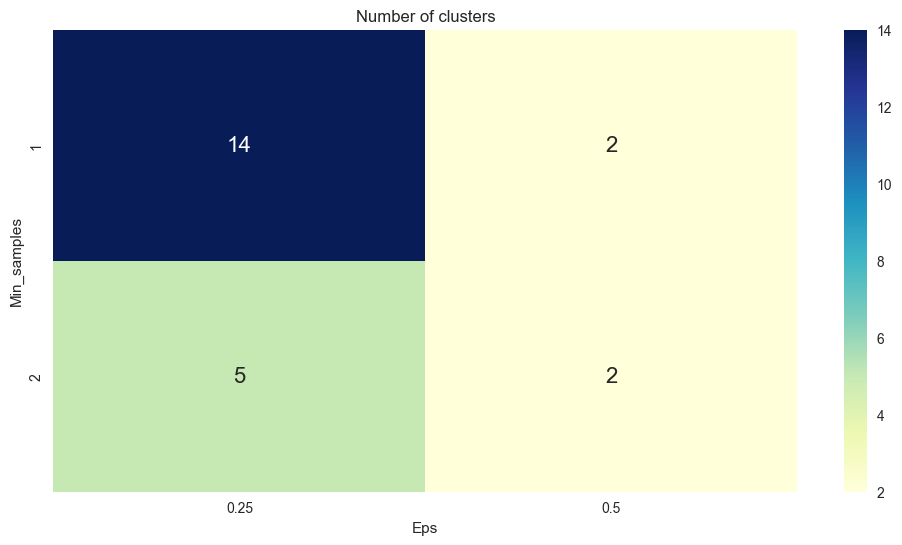

In [147]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

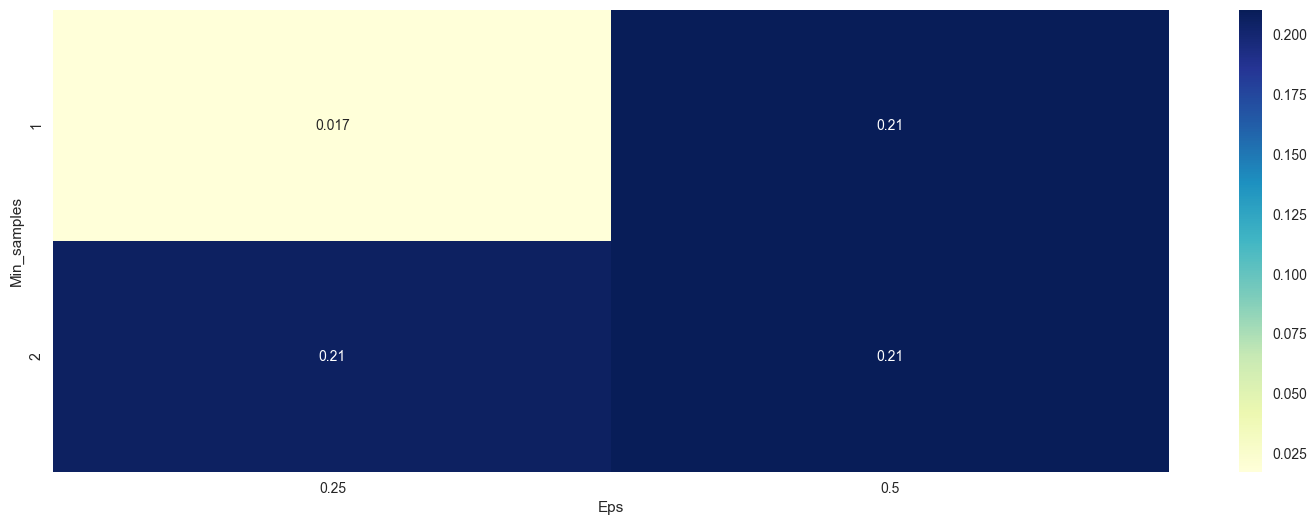

In [148]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [149]:
#Global maximum is 0.21 for eps=0.5 and min_samples=2¶

In [150]:
epsilon = [0.25,0.5]
min_samples = [1,2]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2103


In [151]:
dbscan = DBSCAN(eps=0.5, min_samples=1) # min_samples = number of clumns * 3
dbscan.fit(minmax_df)

DBSCAN(min_samples=1)

In [152]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [153]:
# -1 are the noise points in our dataset and the rest are the clusters

In [154]:
# Concating Labels with main dataset copy

df['DBSCAN_labels'] = dbscan.labels_
df.head()

Murder  Assault  UrbanPop  Rape  Kmeans_label  kmeans_label  \
States                                                                    
Alabama       13.2      236        58  21.2             1             1   
Alaska        10.0      263        48  44.5             1             1   
Arizona        8.1      294        80  31.0             1             1   
Arkansas       8.8      190        50  19.5             2             0   
California     9.0      276        91  40.6             1             1   

            hierarchical_labels  Hierarchical_labels  DBSCAN_labels  
States                                                               
Alabama                       1                    1              0  
Alaska                        1                    1              1  
Arizona                       1                    1              0  
Arkansas                      0                    0              0  
California                    1                    1              0

In [155]:
df.groupby('DBSCAN_labels').agg(['mean'])

Murder     Assault   UrbanPop       Rape Kmeans_label  \
                    mean        mean       mean       mean         mean   
DBSCAN_labels                                                             
0               7.742857  168.877551  65.897959  20.757143     1.102041   
1              10.000000  263.000000  48.000000  44.500000     1.000000   

              kmeans_label hierarchical_labels Hierarchical_labels  
                      mean                mean                mean  
DBSCAN_labels                                                       
0                 0.387755            0.387755            0.387755  
1                 1.000000            1.000000            1.000000

In [156]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(df.loc[df.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df.loc[df.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])

In [157]:
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

Cluster1_avg  Cluster2_avg
Murder                   7.742857          10.0
Assault                168.877551         263.0
UrbanPop                65.897959          48.0
Rape                    20.757143          44.5
Kmeans_label             1.102041           1.0
kmeans_label             0.387755           1.0
hierarchical_labels      0.387755           1.0
Hierarchical_labels      0.387755           1.0
DBSCAN_labels            0.000000           1.0

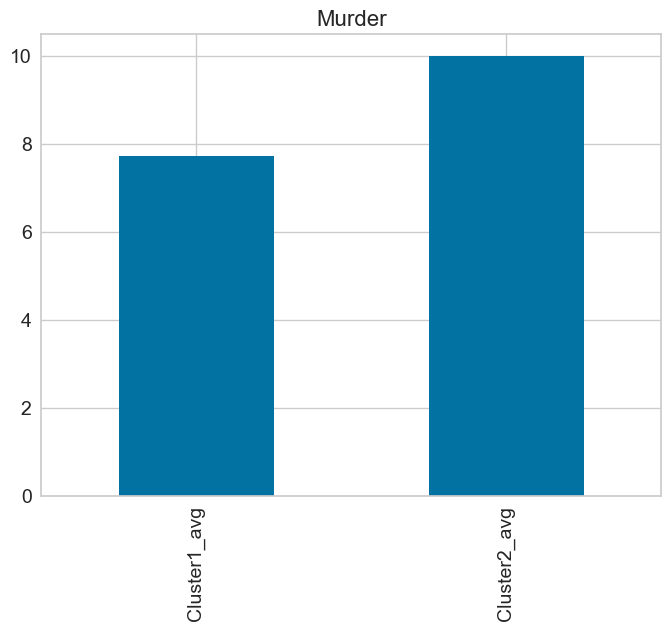

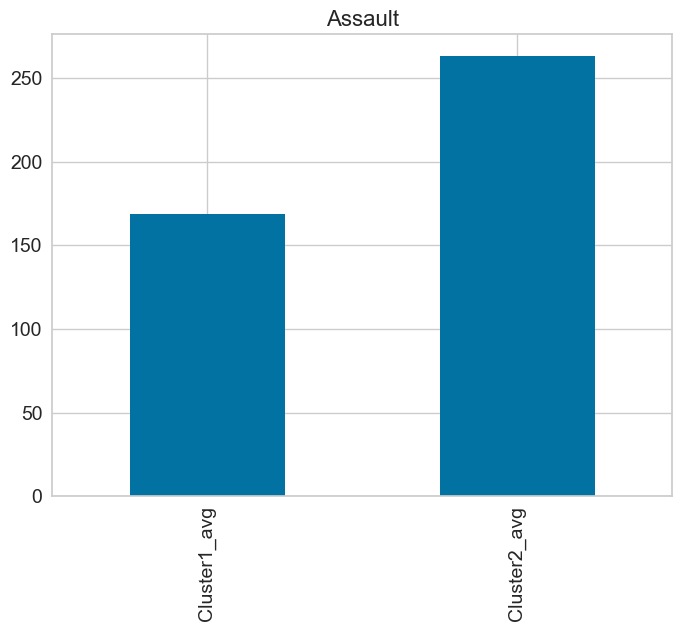

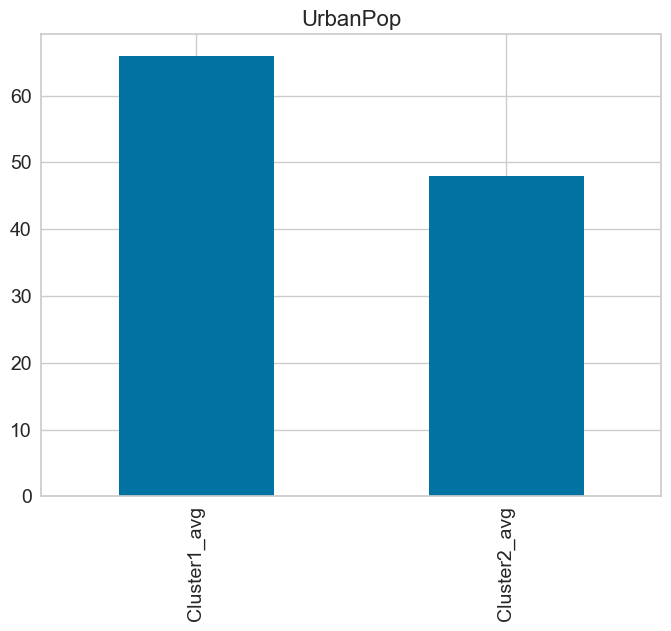

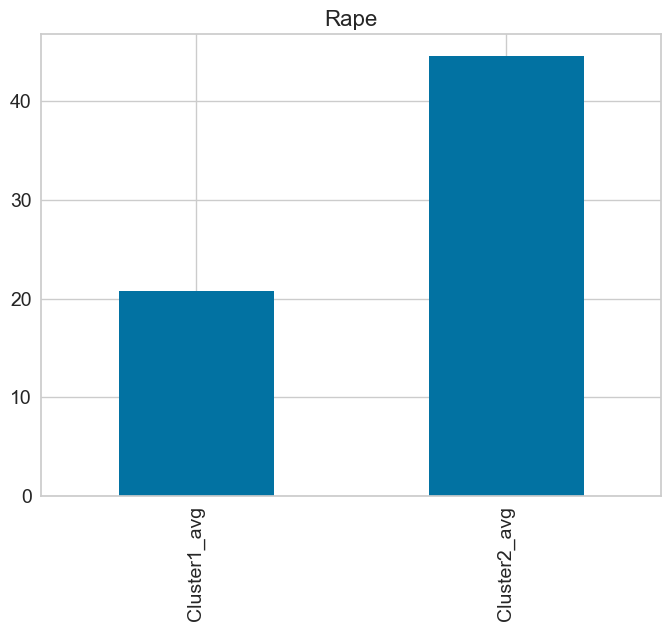

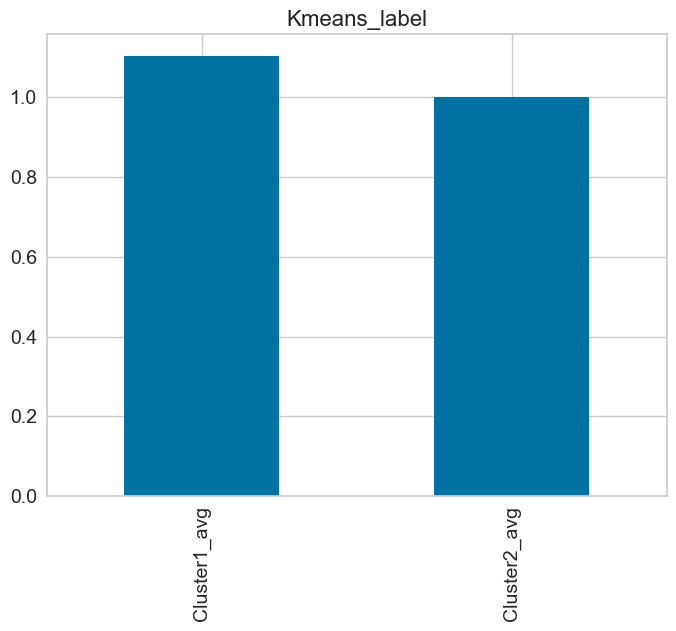

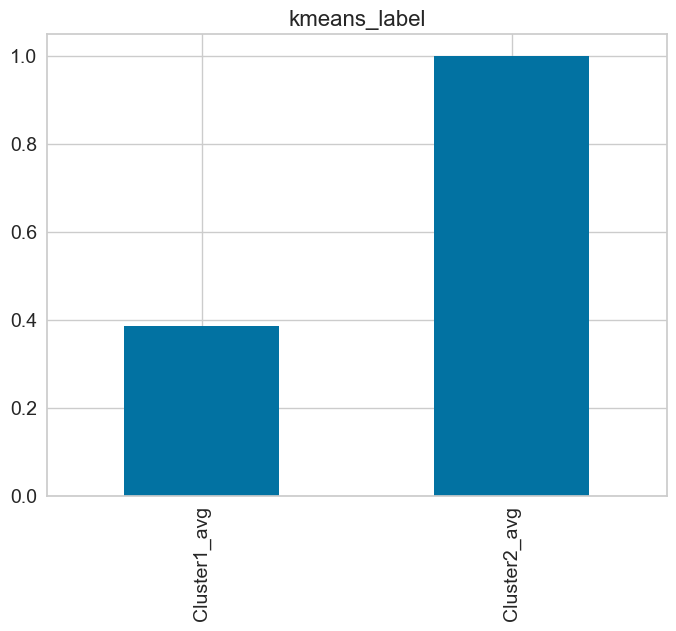

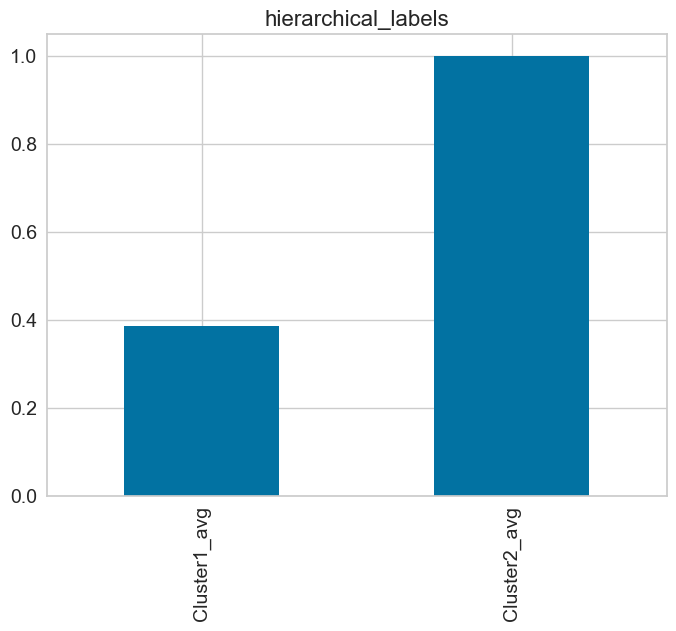

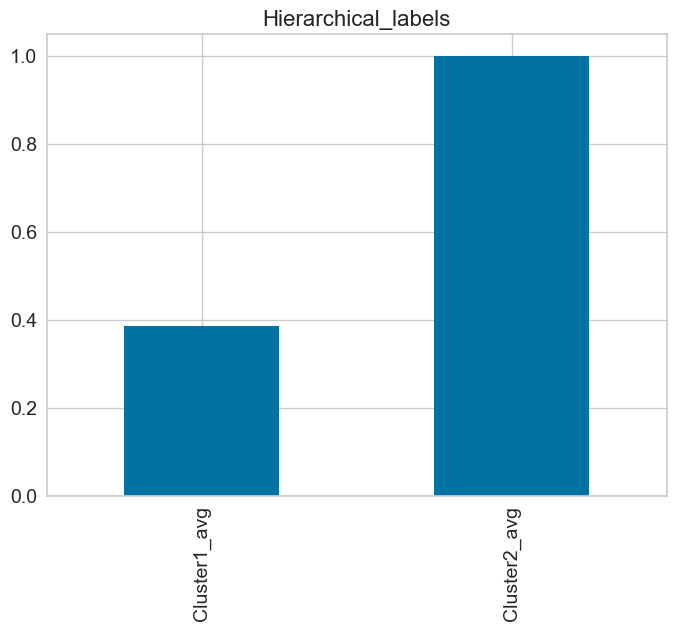

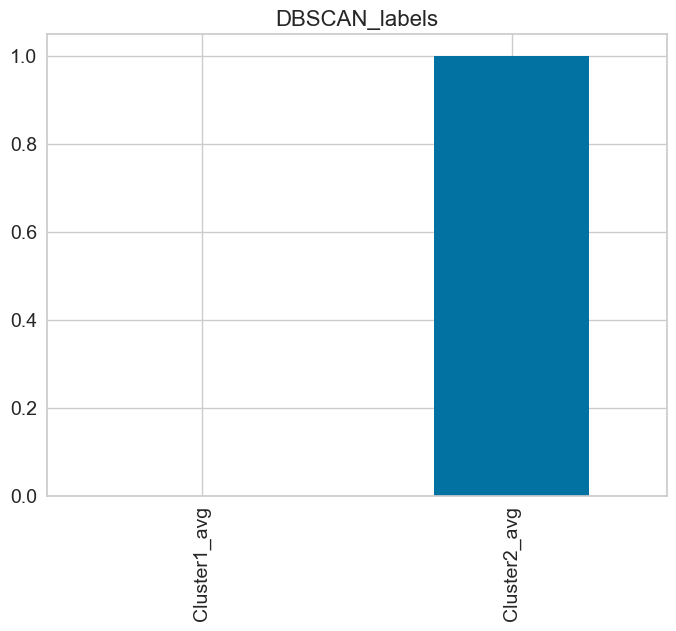

In [158]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()